# Final Project

The final project is designed to let you apply what you have learned so far, and demonstrate that you have mastered it. The submission will be graded on the correctness and performance of the execution of your analysis (50%), the ambitiousness of the problems chosen (30%), and the creativity of your questions and solutions (20%).

Your submission should include all outputs and be *self-contained*, so it can be executed if necessary.

The submission includes two parts:
1. this notebook
2. a 15-min presentation, to be held on May 7


## Submission
The project is due on ***May 06, 23:59 CET*** (counted as the time stamp when it is received). Late submissions will **not** be considered, and graded as 0! 

To submit, please:

1. copy this file and all additional data into a folder with your group ID
3. zip the folder
4. send a copy of the zip file to Dirk Hovy <dirk.hovy@unibocconi.it> and Tommaso Fornaciari <fornaciari@unibocconi.it>

In [1]:
'''importing libraries'''

import numpy as np
import pandas as pd
import spacy
import re
import string
import nltk
import time 
import random
import seaborn as sns
import unidecode
import csv
import contractions
import multiprocessing
from sklearn.manifold import TSNE
from sklearn.decomposition import LatentDirichletAllocation
from collections import defaultdict
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import colors
from gensim.models import Word2Vec
from gensim.models import Doc2Vec
from gensim.models.word2vec import FAST_VERSION
from gensim.models.doc2vec import TaggedDocument
from gensim.models import LdaMulticore, TfidfModel, CoherenceModel
from gensim.models.phrases import Phrases
from gensim.models import AuthorTopicModel
from gensim.corpora import Dictionary
from nltk.corpus import stopwords
from nltk.collocations import BigramCollocationFinder, BigramAssocMeasures
from nltk.collocations import TrigramCollocationFinder, TrigramAssocMeasures
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn.decomposition import TruncatedSVD 
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import silhouette_score
from sklearn import metrics
from ast import literal_eval
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve, ShuffleSplit, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import FunctionTransformer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from itertools import cycle
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model
from keras.layers import Input
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers import GlobalMaxPooling1D, Dropout
from keras.layers.core import Dense, Activation
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from collections import Counter, defaultdict
import gensim.downloader as api
from gensim.corpora import Dictionary
from nltk.corpus import stopwords
from nltk.collocations import BigramCollocationFinder, BigramAssocMeasures
from nltk.collocations import TrigramCollocationFinder, TrigramAssocMeasures
from mpl_toolkits.mplot3d import Axes3D
from gensim.models import TfidfModel
from sklearn.preprocessing import MultiLabelBinarizer
from gensim.corpora import Dictionary
from gensim.similarities import SparseTermSimilarityMatrix
from gensim.similarities import SoftCosineSimilarity
from gensim.models import Word2Vec
from gensim.models.word2vec import FAST_VERSION
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD # this also works with sparse matrices
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
import re
from nltk.corpus import stopwords
from gensim.models import LdaMulticore, TfidfModel, CoherenceModel
from gensim.corpora import Dictionary
from gensim.models.phrases import Phrases
import time # to know how long training took
import multiprocessing # to speed things up by parallelizing
from collections import defaultdict
import spacy
from sklearn.metrics import silhouette_score
from collections import Counter
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn import metrics
from sklearn.preprocessing import label_binarize
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from collections import Counter, defaultdict
from gensim.corpora import Dictionary
from nltk.corpus import stopwords
from nltk.collocations import BigramCollocationFinder, BigramAssocMeasures
from nltk.collocations import TrigramCollocationFinder, TrigramAssocMeasures
from mpl_toolkits.mplot3d import Axes3D
from gensim.models import TfidfModel
from sklearn.preprocessing import MultiLabelBinarizer
from gensim.corpora import Dictionary
#from gensim.similarities import WordEmbeddingSimilarityIndex
from gensim.similarities import SparseTermSimilarityMatrix
from gensim.similarities import SoftCosineSimilarity
from gensim.models import Word2Vec
from gensim.models.word2vec import FAST_VERSION
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD # this also works with sparse matrices
from sklearn.decomposition import NMF
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
from gensim.models import LdaMulticore, TfidfModel, CoherenceModel
from gensim.corpora import Dictionary
from gensim.models.phrases import Phrases
import time # to know how long training took
import multiprocessing # to speed things up by parallelizing
from collections import defaultdict
import spacy
from sklearn.metrics import silhouette_score
from collections import Counter
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn import metrics
from sklearn.preprocessing import label_binarize
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler

%matplotlib inline

sns.set_context('notebook')
sns.set(font_scale = 0.8)

nlp = spacy.load('en_core_web_sm')
random.seed(0)

<a id='home'></a>

Quick links:

[Research Question](#RQ)

[Data cleaning](#data_cleaning)

[The Data and Analysis](#the_data)

[Classification](#classification)

[Structured Predictions](#structured_predictions)

<h1>Table of Contents</h1>
    <h3>Research question</h3>
    <h3>Data, Preprocessing, Annotation and Analysis (Visualizations)</h3>
    <ol>
        <li><strong>Pre-processing of data</strong></li>
        <li><strong>Manual Labelling and MACE score</strong></li>
        <li><strong>Post-processing of data</strong></li>
        <li><strong>Most common VERB, NOUN and ADJ + Visualizations</strong></li>
        <li><strong>Conditional distributions of Verbs|Noun + Visualizations</strong></li>
        <li><strong>Word Embedding (Appetizers, Main course, Dessert and Generic)</strong></li>
        <li><strong>W2V to analyze similarity</strong></li>
        <li><strong>SVD and NMF + Visualizations (2D, 3D)</strong></li>
        <li><strong>Document Embedding + Visualizations</strong></li>
        <li><strong>Topic Modelling (Umass and CV) + Visualizations</strong></li>
        <li><strong>Language Models (2,3,6 grams) and text generation</strong></li>
        <li><strong>Clustering + topic modelling on subsection of our categories</strong></li>
    </ol>
    <h3>Classification Algorithms</h3>
    <ol>
        <li><strong>Further data preprocessing for Classification</strong>
            <ol>
                <li>Train-Dev-Test split</li>
                <li>TF-IDF Vectorization</li>
                <li>Y-Binarizing</li>
            </ol>
        </li>
        <li><strong>Logistic Regression (baseline and tuned)</strong>
            <ol>
                <li>Logistic Regression (untuned)</li>
                <li>Logistic Regression (tuned)</li>
                <li>Visualizations of performance</li>
            </ol>
        </li>
        <li><strong>Dummy Classifier (baseline)</strong></li>
        <li><strong>K-Nearest Neighbors</strong>
            <ol>
                <li>K-Nearest Neighbors (untuned)</li>
                <li>K-Nearest Neighbors (tuned)</li>
                <li>Visualizations of performance</li>
            </ol>
        </li>
        <li><strong>Linear Discriminant Analysis</strong>
            <ol>
                <li>Linear Discriminant Analysis (untuned)</li>
                <li>Linear Discriminant Analysis (tuned)</li>
                <li>Visualizations of performance</li>
            </ol>
        </li>
        <li><strong>Naive Bayes</strong>
            <ol>
                <li>Naive Bayes (untuned)</li>
                <li>Naive Bayes (tuned)</li>
                <li>Visualizations of performance</li>
            </ol>
        </li>
        <li><strong>Support Vector Classifier</strong>
            <ol>
                <li>Support Vector Classifier (untuned)</li>
                <li>Support Vector Classifier (tuned)</li>
                <li>Visualizations of performance</li>
            </ol>
        </li>
        <li><strong>Random Forest</strong>
            <ol>
                <li>Random Forest (untuned)</li>
                <li>Random Forest (tuned)</li>
                <li>Visualizations of performance</li>
            </ol>
        </li>
        <li><strong>XG-Boost</strong>
            <ol>
                <li>XG-Boost (untuned)</li>
                <li>XG-Boost (tuned)</li>
                <li>Visualizations of performance</li>
            </ol>
        </li>
        <li><strong>Convolutional Neural Network</strong>
            <ol>
                <li>Convolutional Neural Network</li>
                <li>Visualizations of performance</li>
            </ol>
        </li>
        <li><strong>Bootstrap comparison</strong></li>
        <li><strong>Accuracy on Test set and comparison of models</strong></li>
    </ol>
    <h3>Structured Prediction</h3>
    <ol>
        <li><strong>Prediction pos using LSTM</strong></li>
        <li><strong>LSTM, BiLSTM, Sequential NN for whole recipe (unigram, bigram)</strong></li>
        <li><strong>LSTM, BiLSTM, Sequential NN for sentence (unigram, bigram)</strong></li>
        <li><strong>Structured Perceptron</strong></li>
        <li><strong>LSTM (character based)</strong></li>
        <li><strong>Google's NN</strong></li>
    </ol>


<a id='RQ'></a>

## 1. Research Question(s) (2 pts)
[back to table of content](#home)


Describe what question you are investigating with the data (max. 100 words)

Our aim is to understand the differences between the different dishes of a dinner, more specifically, apetizer, main dish and dessert. We will use a database provided by RecipeNLG_license. We will focus on trying to understand which attribute contribute to a recipe ingredients, instructions and understanding what differentiates the different meals.


Dataset:
- https://www.kaggle.com/paultimothymooney/recipenlg
- https://recipenlg.cs.put.poznan.pl/

License:
- Please refer to RecipeNLG_license.png

## 2. Data, Preprocessing, Annotation, and Analysis (6 pts)
[back to table of content](#home)

Find a data set for **text classification** and a data set for **structured prediction**. These can be the same.
Kaggle is a good place to start, or the Google data set search. 

The data sets should have **at least 5,000** documents each. **At least 2000 instances** need to be labeled. 

If there is no label available, you can annotate your own and get up to **2 bonus points**, depending on the amount and complexity of the annotation.

Split each data set into dedicated training, development, and test sets (if they do not include these already)!

Briefly (max. 100 words!) describe the content and type of the data set, and what you are planning to look at. 

<a id='data_cleaning'></a>

# All cleaning steps to make database

This is the process of splitting the original database and then putting it back together once classified. 

## Do not run this, we do not provide this data as it is too big and confusing. We simply just get a subset of it... 
[Use this a skip button to go to next interesting part...](#the_data)

[For insight into some of the ingredients cleaning...](#ingredient_cleanup)


In [2]:
'''
df1 = pd.read_csv('Ale_data.csv', sep=';').reset_index().drop(['index', 'Column1'], axis=1)
df2 = pd.read_csv('Louis_data.csv', index_col=0).reset_index().drop(['index'], axis=1)
df3 = pd.read_csv('Nico_data.csv', sep=';')[['label.1', 'title', 'ingredients', 'directions', 'link']].reset_index().drop(['index'], axis=1).rename(columns={'label.1': 'label'})
df4 = pd.read_csv('Steffen_data.csv', index_col=0).reset_index().drop(['index'], axis=1)

df = df1.append(df2, ignore_index=True).append(df3, ignore_index=True).append(df4, ignore_index=True)
df = df[df.label != "O"]
df = df.dropna().reset_index().drop(['index'], axis=1)
df_unlabeled = pd.read_csv('fully_unlabelled.csv')
'''

'\ndf1 = pd.read_csv(\'Ale_data.csv\', sep=\';\').reset_index().drop([\'index\', \'Column1\'], axis=1)\ndf2 = pd.read_csv(\'Louis_data.csv\', index_col=0).reset_index().drop([\'index\'], axis=1)\ndf3 = pd.read_csv(\'Nico_data.csv\', sep=\';\')[[\'label.1\', \'title\', \'ingredients\', \'directions\', \'link\']].reset_index().drop([\'index\'], axis=1).rename(columns={\'label.1\': \'label\'})\ndf4 = pd.read_csv(\'Steffen_data.csv\', index_col=0).reset_index().drop([\'index\'], axis=1)\n\ndf = df1.append(df2, ignore_index=True).append(df3, ignore_index=True).append(df4, ignore_index=True)\ndf = df[df.label != "O"]\ndf = df.dropna().reset_index().drop([\'index\'], axis=1)\ndf_unlabeled = pd.read_csv(\'fully_unlabelled.csv\')\n'

In [3]:
#Drop from df_unlabeled the rows that have title inside the intersection and check afterwards that intersection is empty
'''
stopwords_ = set(stopwords.words('english'))
intersection = np.intersect1d(df['title'],df_unlabeled['title'])
df_unlabeled.drop(df_unlabeled[df_unlabeled['title'].isin(intersection)].index, axis=0, inplace=True)
assert not len(np.intersect1d(df['title'],df_unlabeled['title']))

df_unlabeled.drop(['Unnamed: 0'], axis=1, inplace=True)
df_unlabeled['label'] = np.nan
df.drop(['link'], axis=1, inplace=True)
df_final = df
'''

"\nstopwords_ = set(stopwords.words('english'))\nintersection = np.intersect1d(df['title'],df_unlabeled['title'])\ndf_unlabeled.drop(df_unlabeled[df_unlabeled['title'].isin(intersection)].index, axis=0, inplace=True)\nassert not len(np.intersect1d(df['title'],df_unlabeled['title']))\n\ndf_unlabeled.drop(['Unnamed: 0'], axis=1, inplace=True)\ndf_unlabeled['label'] = np.nan\ndf.drop(['link'], axis=1, inplace=True)\ndf_final = df\n"

In [4]:
# Putting both dataframes back together... one with all the manually labeled variables and one with just more data
'''
final_data = pd.read_csv('final_data.csv')
fully_unlabelled = pd.read_csv('fully_unlabelled.csv')
final_data.drop('Unnamed: 0',inplace=True,axis=1)
fully_unlabelled.drop('Unnamed: 0',inplace=True,axis=1)

intersect = np.intersect1d(final_data['title'],fully_unlabelled['title'])

fully_unlabelled.drop(fully_unlabelled[fully_unlabelled['title'].isin(intersect)].index,inplace=True)

df[df['title'].duplicated()].index

df.drop(index=df[df['title'].duplicated()].index,inplace=True)

df[df['title'].duplicated()].index

intersect = np.intersect1d(final_data['title'],fully_unlabelled['title'])

df = pd.concat((final_data,fully_unlabelled),axis=0)

df['title'].duplicated().sum()

df.drop(index=df[df['title'].duplicated()].index,inplace=True)

df['title'].duplicated().sum()

df.to_csv('basis_dataset.csv')
'''

"\nfinal_data = pd.read_csv('final_data.csv')\nfully_unlabelled = pd.read_csv('fully_unlabelled.csv')\nfinal_data.drop('Unnamed: 0',inplace=True,axis=1)\nfully_unlabelled.drop('Unnamed: 0',inplace=True,axis=1)\n\nintersect = np.intersect1d(final_data['title'],fully_unlabelled['title'])\n\nfully_unlabelled.drop(fully_unlabelled[fully_unlabelled['title'].isin(intersect)].index,inplace=True)\n\ndf[df['title'].duplicated()].index\n\ndf.drop(index=df[df['title'].duplicated()].index,inplace=True)\n\ndf[df['title'].duplicated()].index\n\nintersect = np.intersect1d(final_data['title'],fully_unlabelled['title'])\n\ndf = pd.concat((final_data,fully_unlabelled),axis=0)\n\ndf['title'].duplicated().sum()\n\ndf.drop(index=df[df['title'].duplicated()].index,inplace=True)\n\ndf['title'].duplicated().sum()\n\ndf.to_csv('basis_dataset.csv')\n"

### CLEANING OF THE COLUMNS TITLE & DIRECTIONS

The following takes significant time to run. In order to run the rest of the code import fully cleaned dataset in the end of this section.

### Cleaning of the Title Column

In [5]:
def clean_str(string):  # funct to clean the strings inside the table
    numbers = re.compile('[0-9]')
    sub = re.sub(r'\([^)]*\)', "" , string)
    sub = re.sub(numbers, "", sub)
    
    useless = re.compile('(\\\\|\\|\-|\,|\'|\"|&|\_)')
    sub = re.sub(useless, " " , sub)
    
    temp =[word.lemma_.lower() for word in nlp(sub) if not word.is_punct and not word.lemma_ in stopwords_ and len(word.text)>2]
    fin = " ".join(temp)
    return fin

In [6]:
#Very time consuming line of code!!!
'''
df_final['title_processed'] = df_final.title.apply(clean_str)
'''

"\ndf_final['title_processed'] = df_final.title.apply(clean_str)\n"

### Cleaning of the Directions Column

In [7]:
def clean_directions_n_v(sentence):
    slash_removal = re.compile('\\u00b0')
    sub = re.sub(slash_removal, "D" , sentence)
    links_removal = re.compile('(https?:\/\/)?([\da-z\.-]+)\.([a-z\.]{2,6})([\/\w \.-]*)')
    sub = re.sub(links_removal, '', sub)
    numbers_removal = re.compile('[0-9]')
    sub = re.sub(numbers_removal, '', sub)
    useless = re.compile('(\\\\|\\|\-|\,|\'|\"|&|\_)')
    sub = re.sub(useless, " " , sub)
    lemmatized_clean = [w.lemma_.lower() for w in nlp(sub) if not w.is_punct and not w.text in stopwords_ and w.pos_ in ['NOUN','VERB']]
    fin = " ".join(lemmatized_clean)
    return fin

In [8]:
'''#Use this one later one if you want
def clean_directions_n_v_a(sentence):
    slash_removal = re.compile('\\u00b0')
    sub = re.sub(slash_removal, "D" , sentence)
    links_removal = re.compile('(https?:\/\/)?([\da-z\.-]+)\.([a-z\.]{2,6})([\/\w \.-]*)')
    sub = re.sub(links_removal, '', sub)
    numbers_removal = re.compile('[0-9]')
    sub = re.sub(numbers_removal, '', sub)
    useless = re.compile('(\\\\|\\|\-|\,|\'|\"|&|\_)')
    sub = re.sub(useless, " " , sub)
    lemmatized_clean = [w.lemma_.lower() for w in nlp(sub) if not w.is_punct and not w.text in stopwords_ and w.pos_ in ['NOUN','VERB','ADJ']]
    fin = " ".join(lemmatized_clean)
    return fin'''

'#Use this one later one if you want\ndef clean_directions_n_v_a(sentence):\n    slash_removal = re.compile(\'\\u00b0\')\n    sub = re.sub(slash_removal, "D" , sentence)\n    links_removal = re.compile(\'(https?:\\/\\/)?([\\da-z\\.-]+)\\.([a-z\\.]{2,6})([\\/\\w \\.-]*)\')\n    sub = re.sub(links_removal, \'\', sub)\n    numbers_removal = re.compile(\'[0-9]\')\n    sub = re.sub(numbers_removal, \'\', sub)\n    useless = re.compile(\'(\\\\|\\|\\-|\\,|\'|"|&|\\_)\')\n    sub = re.sub(useless, " " , sub)\n    lemmatized_clean = [w.lemma_.lower() for w in nlp(sub) if not w.is_punct and not w.text in stopwords_ and w.pos_ in [\'NOUN\',\'VERB\',\'ADJ\']]\n    fin = " ".join(lemmatized_clean)\n    return fin'

In [9]:
def clean_directions_n_v_list(sentence):
    sentences = sentence.split('.')
    res = []
    for s in sentences:
        slash_removal = re.compile('\\u00b0')
        sub = re.sub(slash_removal, "D" , s)
        links_removal = re.compile('(https?:\/\/)?([\da-z\.-]+)\.([a-z\.]{2,6})([\/\w \.-]*)')
        sub = re.sub(links_removal, '', sub)
        numbers_removal = re.compile('[0-9]')
        sub = re.sub(numbers_removal, '', sub)
        useless = re.compile('(\\\\|\\|\-|\,|\'|\"|&|\_)')
        sub = re.sub(useless, " " , sub)
        lemmatized_clean = [w.lemma_.lower()+'_'+w.pos_ for w in nlp(sub) if not w.is_punct and not w.text in stopwords_ and w.pos_ in ['NOUN','VERB','ADJ']]
        if lemmatized_clean:
            res.append(lemmatized_clean)
    return res

In [10]:
#Again, very slow bit of code, takes 5/7 mins to run or even more
'''
df_final['directions_processed'] = df_final['directions'].apply(clean_directions_n_v)
'''

"\ndf_final['directions_processed'] = df_final['directions'].apply(clean_directions_n_v)\n"

In [11]:
#Processes the directions keeping every single one in its original list as to identify verbs that go with food
'''
df_final['directions_processed_list'] = df_final['directions'].apply(clean_directions_n_v_list)'''

"\ndf_final['directions_processed_list'] = df_final['directions'].apply(clean_directions_n_v_list)"

In [12]:
'''def flatten_list(row):
    return [item for sublist in row for item in sublist]
df_final['flattened_process'] = df_final['directions_processed_list'].apply(flatten_list)'''

"def flatten_list(row):\n    return [item for sublist in row for item in sublist]\ndf_final['flattened_process'] = df_final['directions_processed_list'].apply(flatten_list)"

In [13]:
#Save all the result as a csv file to be used in further steps not to recompute everything again
'''
df_final.to_csv('processed_titl_direct_NICO.csv')
'''

"\ndf_final.to_csv('processed_titl_direct_NICO.csv')\n"

<a id='ingredient_cleanup'></a>

### Cleaning of the ingredients column

In the cleaning of the ingredients we will use various methods.
The first method will consist of doing some general cleaning (using pos, lemmas, ent...) and putting numbers to X and then using collocations to match the most important words together. Hence, this allows us to find many of the key features such as X_grams...

In the second methods, we will do the exact same but we will add the numbers back to the ingredient list.

Finally, we will have two fully cleaned versions where the aim is to get the most concise description of the ingredients. Hence, we will run the pos and ent in order to get rid of as many possible un-interesting factors as possible.
Here we will again proceed with two different methods, namely one based on stopwords and the other collocations. In the one for the stopwords, once we have cleaned it up, we will add all the the lowest value of the tfidf when ranked by tf. These words will therefore be deleted which allows us to get rid of words such as teaspoon or others...

The second method is based on the collocations and throughout prior cleaning we discussed earlier and only look at collocations that have an X_... to start with and delete all those words. 

[Use this a skip button to go to next interesting part...](#the_data)

In [14]:
## CLEANING OF THE COLUMN INGREDIENTS ##
'''
# importing not processed data
df = pd.read_csv('Not processed Data/basis_dataset.csv', index_col=0).drop(['label','title', 'directions'], axis=1)
df['ingredients_cleaned_weights'] = df['ingredients']
df['ingredients_cleaned_noweights'] = df['ingredients']
'''

"\n# importing not processed data\ndf = pd.read_csv('Not processed Data/basis_dataset.csv', index_col=0).drop(['label','title', 'directions'], axis=1)\ndf['ingredients_cleaned_weights'] = df['ingredients']\ndf['ingredients_cleaned_noweights'] = df['ingredients']\n"

In [15]:
# Some methods that are needed at times to have correct input into functions

nlp = spacy.load('en_core_web_sm')

def getting_specific_text_list(name):
    return data_set_used[data_set_used[column_with_text]==name].tolist()

# Some method I will need at times to have correct input into functions
def text_to_list_list(text):
    all_list = []
    for sentence in text:
        all_list.append(sentence.split(sep=None, maxsplit=-1))
    return all_list

# Some method I will need at times to have correct input into functions
def list_list_to_list(list_1):
    big_list = []
    for x in list_1:
        text_1 = ""
        for y in x:
            text_1 = text_1+" "+y
        text_1.lstrip()
        big_list.append(text_1)
    return big_list


# Function to remove accents
def remove_accented_chars(text):
    """remove accented characters from text, e.g. café"""
    text = unidecode.unidecode(text)
    return text

# Function to remove punctuation
punctuation = re.compile('[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]')
def removing_punctuation(text): #me
    return re.sub(punctuation, "", text)

# Function to remove numbers
numbers = re.compile(('\.\d+|\d+\.\d+|\d+|\d+\,\d+'))
def removing_numbers(text):
    return re.sub(numbers, "", text) 

def removing_numbers(text):
    return re.sub(numbers, "", text) 

def stand_numbers(text):
    return re.sub(numbers, "XX", text) 

x_numbers = re.compile('XX+')
def stand_x_numbers(text):
    return re.sub(x_numbers, "X", text) 

fractions_finder = re.compile('\d+\/\d+')
def frac_converter(text):
    a = re.findall(fractions_finder, text)
    for i in range(len(a)):
        a = re.findall(fractions_finder, text)
        b = re.findall(numbers, str(a))
        c = round(int(b[0])/int(b[1]), 2)
        text = re.sub(fractions_finder, str(c), text, 1) 
    return text

cup = re.compile('c\.')
def c_to_cup(text):
    return re.sub(cup, "cup", text)

lbs = re.compile('lbs')
def lbs_to_pound(text):
    return re.sub(lbs, "pound", text)

# Function to clean words
def cleaning_word(text, remove_numbers='delete'):
    text = text.lower()
    text = c_to_cup(text)
    text = lbs_to_pound(text)
    text = frac_converter(text)
    if remove_numbers=='delete':
        text = removing_numbers(text)
    if remove_numbers=='keep':
        text = text
    if remove_numbers=='standardized':
        text = stand_numbers(text)
        text = stand_x_numbers(text)
    text = removing_punctuation(text)
    text = remove_accented_chars(text)
    text = removing_punctuation(text) #used twice because sometimes they are around numbers...
    text = text.lstrip()
    return text
    
    
def trans_to_list_of_list(ing):
    return ing.split("\",")

def mine_trans_to_list_of_list(ing):
    return ing.split("\',")

In [16]:
# Cleaning of ingredients that keeps number or standardized version
'''
df['ingredients_cleaned_noweights'] = df['ingredients'].apply(trans_to_list_of_list)

all_text = []
num_ingredients = []
for item in df['ingredients_cleaned_noweights'].tolist():
    num_ingredients.append(len(item))
    for item1 in item:
        all_text.append(item1)
'''

"\ndf['ingredients_cleaned_noweights'] = df['ingredients'].apply(trans_to_list_of_list)\n\nall_text = []\nnum_ingredients = []\nfor item in df['ingredients_cleaned_noweights'].tolist():\n    num_ingredients.append(len(item))\n    for item1 in item:\n        all_text.append(item1)\n"

In [17]:
# Here we will proceed to multiple types of cleaning methods
'''
# put predefined stopwords in a set for faster lookup
stopwords_ = set(stopwords.words('english'))
stopwords_.add('lbs')


lemmas = [
    [token.lemma_ for token in nlp(sentence)]
    for sentence in all_text
]

print("Lemmas done") #We do lemmas because I found stemming too strong and lemmatization still keeps most of the understanding of the word

pos = [
    [token.pos_ for token in nlp(sentence)] 
    for sentence in all_text
]

print("pos done") #Looking at which position the word holds because we will have a datasets with different types of words

v2_all_text = []

for i in range(len(lemmas)):
    filtered_list = []
    nlp_sentence = nlp(all_text[i])
    lemmas_sentence = lemmas[i]
    for j in range(len(lemmas_sentence)):    
        word = cleaning_word(lemmas_sentence[j], 'standardized') #we clean according to method previously established
        if ((word not in stopwords_) and ((pos[i][j]=="NOUN") or (pos[i][j]=="NUM"))): #this can be done if we want to keep verbs and adverbs
#             and ((pos[i][j]=="NOUN") or (pos[i][j]=="VERB")) 
#             and (nlp_sentence[j].ent_type_=='')):
            filtered_list.append(word)
    filtered_sentence = (" ").join(filtered_list)
    v2_all_text.append(filtered_sentence)

'''

'\n# put predefined stopwords in a set for faster lookup\nstopwords_ = set(stopwords.words(\'english\'))\nstopwords_.add(\'lbs\')\n\n\nlemmas = [\n    [token.lemma_ for token in nlp(sentence)]\n    for sentence in all_text\n]\n\nprint("Lemmas done") #We do lemmas because I found stemming too strong and lemmatization still keeps most of the understanding of the word\n\npos = [\n    [token.pos_ for token in nlp(sentence)] \n    for sentence in all_text\n]\n\nprint("pos done") #Looking at which position the word holds because we will have a datasets with different types of words\n\nv2_all_text = []\n\nfor i in range(len(lemmas)):\n    filtered_list = []\n    nlp_sentence = nlp(all_text[i])\n    lemmas_sentence = lemmas[i]\n    for j in range(len(lemmas_sentence)):    \n        word = cleaning_word(lemmas_sentence[j], \'standardized\') #we clean according to method previously established\n        if ((word not in stopwords_) and ((pos[i][j]=="NOUN") or (pos[i][j]=="NUM"))): #this can be do

In [18]:
# finding bigrams
'''
words = [word for document in text_to_list_list(v2_all_text) for word in document]

finder = BigramCollocationFinder.from_words(words)
bgm = BigramAssocMeasures()
score = bgm.mi_like
scored = finder.score_ngrams(bgm.mi_like)

for y in scored:
    b1 = y[0][0]
    b2 = y[0][1]
    if ((b1!="X")&(b2=="X")) & ((b1!="teaspoon")):
        scored.remove(y)
    if (b1=="teaspoon"):
        scored.remove(y)

scored[:50]
'''

'\nwords = [word for document in text_to_list_list(v2_all_text) for word in document]\n\nfinder = BigramCollocationFinder.from_words(words)\nbgm = BigramAssocMeasures()\nscore = bgm.mi_like\nscored = finder.score_ngrams(bgm.mi_like)\n\nfor y in scored:\n    b1 = y[0][0]\n    b2 = y[0][1]\n    if ((b1!="X")&(b2=="X")) & ((b1!="teaspoon")):\n        scored.remove(y)\n    if (b1=="teaspoon"):\n        scored.remove(y)\n\nscored[:50]\n'

In [19]:
# connecting bigrams
'''
for i in range(len(v2_all_text)):
    for y in scored[:70]:
        b1 = y[0][0]
        b2 = y[0][1]
        v2_all_text[i] = v2_all_text[i].replace("%s %s" % (b1, b2), "%s_%s" % (b1, b2))
'''

'\nfor i in range(len(v2_all_text)):\n    for y in scored[:70]:\n        b1 = y[0][0]\n        b2 = y[0][1]\n        v2_all_text[i] = v2_all_text[i].replace("%s %s" % (b1, b2), "%s_%s" % (b1, b2))\n'

In [20]:
'''
ing_by_recipe = []
# count_recipe = 0
count_ingredients = 0

for item1 in num_ingredients: 
    specific_recipe = ""
    count = 0
    for i in range(item1):
        if count==0:
            specific_recipe = str(v2_all_text[count_ingredients])
            count = 1
            count_ingredients +=1
        else: 
            specific_recipe = specific_recipe + ", " + str(v2_all_text[count_ingredients])
            count_ingredients +=1
    ing_by_recipe.append(specific_recipe)
'''

'\ning_by_recipe = []\n# count_recipe = 0\ncount_ingredients = 0\n\nfor item1 in num_ingredients: \n    specific_recipe = ""\n    count = 0\n    for i in range(item1):\n        if count==0:\n            specific_recipe = str(v2_all_text[count_ingredients])\n            count = 1\n            count_ingredients +=1\n        else: \n            specific_recipe = specific_recipe + ", " + str(v2_all_text[count_ingredients])\n            count_ingredients +=1\n    ing_by_recipe.append(specific_recipe)\n'

In [21]:
# ing_by_recipe = []
# # count_recipe = 0
# count_ingredients = 0

# for item1 in num_ingredients:
#     specific_recipe = []
#     for i in range(item1):
#         specific_recipe.append(v2_all_text[count_ingredients])
#         count_ingredients +=1
#     ing_by_recipe.append(specific_recipe)

In [22]:
'''
with open('Louis_cleaned_data/ingredients_cleaned_noweights.csv', 'w') as w:
    writer = csv.writer(w)
    for item in ing_by_recipe:
        writer.writerow([str(item)])
    w.close()

df["ingredients_cleaned_noweights"] = pd.read_csv('Louis_cleaned_data/ingredients_cleaned_noweights.csv', header=None).rename(columns={0: "ingredients_cleaned_noweights"})
'''

'\nwith open(\'Louis_cleaned_data/ingredients_cleaned_noweights.csv\', \'w\') as w:\n    writer = csv.writer(w)\n    for item in ing_by_recipe:\n        writer.writerow([str(item)])\n    w.close()\n\ndf["ingredients_cleaned_noweights"] = pd.read_csv(\'Louis_cleaned_data/ingredients_cleaned_noweights.csv\', header=None).rename(columns={0: "ingredients_cleaned_noweights"})\n'

In [23]:
'''
all_text_uncleaned = []
for item in df['ingredients'].apply(trans_to_list_of_list):
    for item1 in item:
        all_text_uncleaned.append(item1)
        
all_text = []
count = 0
for item in df['ingredients_cleaned_noweights']:
    if isinstance(item, str):
        for item1 in item.split(','):
            all_text.append(item1)
    else:
        all_text.append('')
'''

"\nall_text_uncleaned = []\nfor item in df['ingredients'].apply(trans_to_list_of_list):\n    for item1 in item:\n        all_text_uncleaned.append(item1)\n        \nall_text = []\ncount = 0\nfor item in df['ingredients_cleaned_noweights']:\n    if isinstance(item, str):\n        for item1 in item.split(','):\n            all_text.append(item1)\n    else:\n        all_text.append('')\n"

In [24]:
# all_text[:10]

In [25]:
# %time
# # Function to remove numbers
# X_finder = re.compile('X+')
# cleaned_with_number_ing = []
# for item in range(len(all_text_uncleaned)):
#     number_count = re.findall(numbers, str(all_text_uncleaned[item]))
#     text = all_text[item]
#     for i in range(len(number_count)):
#         text = re.sub(X_finder, number_count[i], text, 1) 
#     cleaned_with_number_ing.append(text)

In [26]:
#replacing X with actual numbers
'''
fractions_finder = re.compile('\d+\/\d+')
X_finder = re.compile('X+')
cleaned_with_number_ing = []
for item in range(len(all_text_uncleaned)):
    number_count = re.findall(numbers, str(all_text_uncleaned[item]))
    text = all_text[item]
    for i in range(len(number_count)):
        text = re.sub(X_finder, number_count[i], text, 1) 
    cleaned_with_number_ing.append(text)
'''

"\nfractions_finder = re.compile('\\d+\\/\\d+')\nX_finder = re.compile('X+')\ncleaned_with_number_ing = []\nfor item in range(len(all_text_uncleaned)):\n    number_count = re.findall(numbers, str(all_text_uncleaned[item]))\n    text = all_text[item]\n    for i in range(len(number_count)):\n        text = re.sub(X_finder, number_count[i], text, 1) \n    cleaned_with_number_ing.append(text)\n"

In [27]:
# numbers = re.compile(('\.\d+|\d+\.\d+|\d+'))
# X_finder = re.compile('X+')
# for item in all_text_uncleaned:
#     a = re.findall(numbers, str(item))
#     if len(a)!=0:
#         print(a)

In [28]:
'''
ing_by_recipe = []
# count_recipe = 0
count_ingredients = 0

for item1 in num_ingredients: 
    specific_recipe = ""
    count = 0
    for i in range(item1):
        if count==0:
            specific_recipe = str(cleaned_with_number_ing[count_ingredients])
            count = 1
            count_ingredients +=1
        else: 
            specific_recipe = specific_recipe + ", " + str(cleaned_with_number_ing[count_ingredients])
            count_ingredients +=1
    ing_by_recipe.append(specific_recipe)
'''

'\ning_by_recipe = []\n# count_recipe = 0\ncount_ingredients = 0\n\nfor item1 in num_ingredients: \n    specific_recipe = ""\n    count = 0\n    for i in range(item1):\n        if count==0:\n            specific_recipe = str(cleaned_with_number_ing[count_ingredients])\n            count = 1\n            count_ingredients +=1\n        else: \n            specific_recipe = specific_recipe + ", " + str(cleaned_with_number_ing[count_ingredients])\n            count_ingredients +=1\n    ing_by_recipe.append(specific_recipe)\n'

In [29]:
'''
with open('Louis_cleaned_data/ingredients_cleaned_weights.csv', 'w') as w:
    writer = csv.writer(w)
    for item in ing_by_recipe:
        writer.writerow([str(item)])
    w.close()

df["ingredients_cleaned_weights"] = pd.read_csv('Louis_cleaned_data/ingredients_cleaned_weights.csv', header=None).rename(columns={0: "ingredients_cleaned_weights"})
'''

'\nwith open(\'Louis_cleaned_data/ingredients_cleaned_weights.csv\', \'w\') as w:\n    writer = csv.writer(w)\n    for item in ing_by_recipe:\n        writer.writerow([str(item)])\n    w.close()\n\ndf["ingredients_cleaned_weights"] = pd.read_csv(\'Louis_cleaned_data/ingredients_cleaned_weights.csv\', header=None).rename(columns={0: "ingredients_cleaned_weights"})\n'

In [30]:
# df = pd.read_csv('Data/final_data.csv', index_col=0).drop(['label', 'title', 'directions'], axis=1)
'''
df['ingredients_fully_cleaned_stopwords'] = df['ingredients']
df['ingredients_fully_cleaned_collocations'] = df['ingredients']
'''

"\ndf['ingredients_fully_cleaned_stopwords'] = df['ingredients']\ndf['ingredients_fully_cleaned_collocations'] = df['ingredients']\n"

In [31]:
# ## Version 1, with stop words
'''
df['ingredients_fully_cleaned_stopwords'] = df['ingredients'].apply(trans_to_list_of_list)

all_text = []
for item in df['ingredients_fully_cleaned_stopwords'].tolist():
    for item1 in item:
        all_text.append(item1)
'''

"\ndf['ingredients_fully_cleaned_stopwords'] = df['ingredients'].apply(trans_to_list_of_list)\n\nall_text = []\nfor item in df['ingredients_fully_cleaned_stopwords'].tolist():\n    for item1 in item:\n        all_text.append(item1)\n"

In [32]:
# Here we will proceed to multiple types of cleaning methods

# put predefined stopwords in a set for faster lookup
'''
stopwords_ = set(stopwords.words('english'))

lemmas = [
    [token.lemma_ for token in nlp(sentence)]
    for sentence in all_text
]

print("Lemmas done") #We do lemmas because I found stemming too strong and lemmatization still keeps most of the understanding of the word

pos = [
    [token.pos_ for token in nlp(sentence)] 
    for sentence in all_text
]

print("pos done") #Looking at which position the word holds because we will have a datasets with different types of words

 
entities = [
    [token.label_ for token in nlp(sentence).ents]
    for sentence in all_text
]

print("ent done")

v2_all_text = []

for i in range(len(lemmas)):
    filtered_list = []
    nlp_sentence = nlp(all_text[i])
    lemmas_sentence = lemmas[i]
    for j in range(len(lemmas_sentence)):    
        word = cleaning_word(lemmas_sentence[j]) #we clean according to method previously established
        if ((word not in stopwords_) and (pos[i][j]=="NOUN") and (nlp_sentence[j].ent_type_ not in ['DATE', 'CARDINAL', 'MONEY', 'ORDINAL', 'PERCENT', ' QUANTITY', 'TIME'])):
#         if ((word not in stopwords_) ): #this can be done if we want to keep verbs and adverbs
            filtered_list.append(word)
    filtered_sentence = (" ").join(filtered_list)
    v2_all_text.append(filtered_sentence)
'''

'\nstopwords_ = set(stopwords.words(\'english\'))\n\nlemmas = [\n    [token.lemma_ for token in nlp(sentence)]\n    for sentence in all_text\n]\n\nprint("Lemmas done") #We do lemmas because I found stemming too strong and lemmatization still keeps most of the understanding of the word\n\npos = [\n    [token.pos_ for token in nlp(sentence)] \n    for sentence in all_text\n]\n\nprint("pos done") #Looking at which position the word holds because we will have a datasets with different types of words\n\n \nentities = [\n    [token.label_ for token in nlp(sentence).ents]\n    for sentence in all_text\n]\n\nprint("ent done")\n\nv2_all_text = []\n\nfor i in range(len(lemmas)):\n    filtered_list = []\n    nlp_sentence = nlp(all_text[i])\n    lemmas_sentence = lemmas[i]\n    for j in range(len(lemmas_sentence)):    \n        word = cleaning_word(lemmas_sentence[j]) #we clean according to method previously established\n        if ((word not in stopwords_) and (pos[i][j]=="NOUN") and (nlp_sentenc

In [33]:
'''
tfidf_vectorizer = TfidfVectorizer(analyzer='word', 
                                   min_df=0.001, 
                                   max_df=0.75, 
                                   stop_words='english', 
                                   sublinear_tf=True) #this is to get the raw counts, like just this lines...
X = tfidf_vectorizer.fit_transform(v2_all_text)

vectorizer = CountVectorizer(analyzer='word', 
                             min_df=0.001, 
                             max_df=0.75, 
                             stop_words='english')
X2 = vectorizer.fit_transform(v2_all_text)

df_tfidf = pd.DataFrame(data={'word': vectorizer.get_feature_names(), 
                        'tf': X2.sum(axis=0).A1, 
                        'idf': tfidf_vectorizer.idf_,
                        'tfidf': X.sum(axis=0).A1
                   }).sort_values(['tf','tfidf','idf']).reset_index().drop(['index'], axis=1) # sort by TFIDF, then TF, then IDF


df_tfidf
'''

"\ntfidf_vectorizer = TfidfVectorizer(analyzer='word', \n                                   min_df=0.001, \n                                   max_df=0.75, \n                                   stop_words='english', \n                                   sublinear_tf=True) #this is to get the raw counts, like just this lines...\nX = tfidf_vectorizer.fit_transform(v2_all_text)\n\nvectorizer = CountVectorizer(analyzer='word', \n                             min_df=0.001, \n                             max_df=0.75, \n                             stop_words='english')\nX2 = vectorizer.fit_transform(v2_all_text)\n\ndf_tfidf = pd.DataFrame(data={'word': vectorizer.get_feature_names(), \n                        'tf': X2.sum(axis=0).A1, \n                        'idf': tfidf_vectorizer.idf_,\n                        'tfidf': X.sum(axis=0).A1\n                   }).sort_values(['tf','tfidf','idf']).reset_index().drop(['index'], axis=1) # sort by TFIDF, then TF, then IDF\n\n\ndf_tfidf\n"

In [34]:
'''
x_s = re.compile('X+')
def x_ss(text):
    return re.sub(x_s, "", text) 

extra_stop_words = set(df_tfidf['word'][-8:].tolist())
extra_stop_words.remove('pepper')
extra_stop_words.remove('salt')
extra_stop_words.remove('sugar')
extra_stop_words.add('lb')
extra_stop_words.add('pound')

stopwords_ = set(stopwords.words('english'))
for item in extra_stop_words:
    stopwords_.add(item)

v3_all_text = []

for item in v2_all_text:
    words = cleaning_word(x_ss(item)) #we shouldn't need the x_ss method... check!!!
    filtered_list = []
    for word in words.split():
        if (word not in stopwords_):
            filtered_list.append(word)
    filtered_sentence = (" ").join(filtered_list)
    v3_all_text.append(filtered_sentence)
'''

'\nx_s = re.compile(\'X+\')\ndef x_ss(text):\n    return re.sub(x_s, "", text) \n\nextra_stop_words = set(df_tfidf[\'word\'][-8:].tolist())\nextra_stop_words.remove(\'pepper\')\nextra_stop_words.remove(\'salt\')\nextra_stop_words.remove(\'sugar\')\nextra_stop_words.add(\'lb\')\nextra_stop_words.add(\'pound\')\n\nstopwords_ = set(stopwords.words(\'english\'))\nfor item in extra_stop_words:\n    stopwords_.add(item)\n\nv3_all_text = []\n\nfor item in v2_all_text:\n    words = cleaning_word(x_ss(item)) #we shouldn\'t need the x_ss method... check!!!\n    filtered_list = []\n    for word in words.split():\n        if (word not in stopwords_):\n            filtered_list.append(word)\n    filtered_sentence = (" ").join(filtered_list)\n    v3_all_text.append(filtered_sentence)\n'

In [35]:
'''
ing_by_recipe = []
# count_recipe = 0
count_ingredients = 0

for item1 in num_ingredients: 
    specific_recipe = ""
    count = 0
    for i in range(item1):
        if count==0:
            specific_recipe = str(v3_all_text[count_ingredients])
            count = 1
            count_ingredients +=1
        else: 
            specific_recipe = specific_recipe + ", " + str(v3_all_text[count_ingredients])
            count_ingredients +=1
    ing_by_recipe.append(specific_recipe)
'''

'\ning_by_recipe = []\n# count_recipe = 0\ncount_ingredients = 0\n\nfor item1 in num_ingredients: \n    specific_recipe = ""\n    count = 0\n    for i in range(item1):\n        if count==0:\n            specific_recipe = str(v3_all_text[count_ingredients])\n            count = 1\n            count_ingredients +=1\n        else: \n            specific_recipe = specific_recipe + ", " + str(v3_all_text[count_ingredients])\n            count_ingredients +=1\n    ing_by_recipe.append(specific_recipe)\n'

In [36]:
'''
with open('Louis_cleaned_data/ingredients_fully_cleaned_stopwords.csv', 'w') as w:
    writer = csv.writer(w)
    for item in ing_by_recipe:
        writer.writerow([str(item)])
    w.close()

df["ingredients_fully_cleaned_stopwords"] = pd.read_csv('Louis_cleaned_data/ingredients_fully_cleaned_stopwords.csv', header=None).rename(columns={0: "ingredients_fully_cleaned_stopwords"})
'''

'\nwith open(\'Louis_cleaned_data/ingredients_fully_cleaned_stopwords.csv\', \'w\') as w:\n    writer = csv.writer(w)\n    for item in ing_by_recipe:\n        writer.writerow([str(item)])\n    w.close()\n\ndf["ingredients_fully_cleaned_stopwords"] = pd.read_csv(\'Louis_cleaned_data/ingredients_fully_cleaned_stopwords.csv\', header=None).rename(columns={0: "ingredients_fully_cleaned_stopwords"})\n'

In [37]:
# Cleaning using collocations
'''
df['ingredients_fully_cleaned_collocations'] = df['ingredients'].apply(trans_to_list_of_list)

all_text = []
for item in df['ingredients_fully_cleaned_collocations'].tolist():
    for item1 in item:
        all_text.append(item1)
'''

"\ndf['ingredients_fully_cleaned_collocations'] = df['ingredients'].apply(trans_to_list_of_list)\n\nall_text = []\nfor item in df['ingredients_fully_cleaned_collocations'].tolist():\n    for item1 in item:\n        all_text.append(item1)\n"

In [38]:
# Here we will proceed to multiple types of cleaning methods
'''
# put predefined stopwords in a set for faster lookup
stopwords_ = set(stopwords.words('english'))
stopwords_.add('lbs')


lemmas = [
    [token.lemma_ for token in nlp(sentence)]
    for sentence in all_text
]

print("Lemmas done") #We do lemmas because I found stemming too strong and lemmatization still keeps most of the understanding of the word

pos = [
    [token.pos_ for token in nlp(sentence)] 
    for sentence in all_text
]

print("pos done") #Looking at which position the word holds because we will have a datasets with different types of words

v2_all_text = []

for i in range(len(lemmas)):
    filtered_list = []
    nlp_sentence = nlp(all_text[i])
    lemmas_sentence = lemmas[i]
    for j in range(len(lemmas_sentence)):    
        word = cleaning_word(lemmas_sentence[j], 'standardized') #we clean according to method previously established
        if ((word not in stopwords_) and ((pos[i][j]=="NOUN") or (pos[i][j]=="NUM"))): #this can be done if we want to keep verbs and adverbs
#             and ((pos[i][j]=="NOUN") or (pos[i][j]=="VERB")) 
#             and (nlp_sentence[j].ent_type_=='')):
            filtered_list.append(word)
    filtered_sentence = (" ").join(filtered_list)
    v2_all_text.append(filtered_sentence)
'''

'\n# put predefined stopwords in a set for faster lookup\nstopwords_ = set(stopwords.words(\'english\'))\nstopwords_.add(\'lbs\')\n\n\nlemmas = [\n    [token.lemma_ for token in nlp(sentence)]\n    for sentence in all_text\n]\n\nprint("Lemmas done") #We do lemmas because I found stemming too strong and lemmatization still keeps most of the understanding of the word\n\npos = [\n    [token.pos_ for token in nlp(sentence)] \n    for sentence in all_text\n]\n\nprint("pos done") #Looking at which position the word holds because we will have a datasets with different types of words\n\nv2_all_text = []\n\nfor i in range(len(lemmas)):\n    filtered_list = []\n    nlp_sentence = nlp(all_text[i])\n    lemmas_sentence = lemmas[i]\n    for j in range(len(lemmas_sentence)):    \n        word = cleaning_word(lemmas_sentence[j], \'standardized\') #we clean according to method previously established\n        if ((word not in stopwords_) and ((pos[i][j]=="NOUN") or (pos[i][j]=="NUM"))): #this can be do

In [39]:
'''
words = [word for document in text_to_list_list(v2_all_text) for word in document]

finder = BigramCollocationFinder.from_words(words)
bgm = BigramAssocMeasures()
score = bgm.mi_like
scored = finder.score_ngrams(bgm.mi_like)

for y in scored:
    b1 = y[0][0]
    b2 = y[0][1]
    if ((b1!="X")&(b2=="X")) & ((b1!="teaspoon")):
        scored.remove(y)
    if (b1=="teaspoon"):
        scored.remove(y)

important_scored = scored[:70].copy()
'''

'\nwords = [word for document in text_to_list_list(v2_all_text) for word in document]\n\nfinder = BigramCollocationFinder.from_words(words)\nbgm = BigramAssocMeasures()\nscore = bgm.mi_like\nscored = finder.score_ngrams(bgm.mi_like)\n\nfor y in scored:\n    b1 = y[0][0]\n    b2 = y[0][1]\n    if ((b1!="X")&(b2=="X")) & ((b1!="teaspoon")):\n        scored.remove(y)\n    if (b1=="teaspoon"):\n        scored.remove(y)\n\nimportant_scored = scored[:70].copy()\n'

In [40]:
'''
to_delete = []
for y in important_scored:
    b1 = y[0][0]
    if (b1=="X"):
        to_delete.append(y)
to_delete
'''

'\nto_delete = []\nfor y in important_scored:\n    b1 = y[0][0]\n    if (b1=="X"):\n        to_delete.append(y)\nto_delete\n'

In [41]:
'''
for i in range(len(v2_all_text)):
    for y in to_delete:
        b1 = y[0][0]
        b2 = y[0][1]
        v2_all_text[i] = v2_all_text[i].replace("%s %s" % (b1, b2), "")
'''

'\nfor i in range(len(v2_all_text)):\n    for y in to_delete:\n        b1 = y[0][0]\n        b2 = y[0][1]\n        v2_all_text[i] = v2_all_text[i].replace("%s %s" % (b1, b2), "")\n'

In [42]:
'''
x_s = re.compile('X+')
def x_ss(text):
    return re.sub(x_s, "", text) 

stopwords_ = set(stopwords.words('english'))

v3_all_text = []


for item in v2_all_text:
    words = cleaning_word(x_ss(item)) #we clean according to method previously established
    filtered_list = []
    for word in words.split():
        if (word not in stopwords_):
            filtered_list.append(word)
    filtered_sentence = (" ").join(filtered_list)
    v3_all_text.append(filtered_sentence)

# for item in v2_all_text:
#     word = cleaning_word(x_ss(item)) #we clean according to method previously established
#     if ((word not in stopwords_):
#         v3_all_text.append(word)
'''

'\nx_s = re.compile(\'X+\')\ndef x_ss(text):\n    return re.sub(x_s, "", text) \n\nstopwords_ = set(stopwords.words(\'english\'))\n\nv3_all_text = []\n\n\nfor item in v2_all_text:\n    words = cleaning_word(x_ss(item)) #we clean according to method previously established\n    filtered_list = []\n    for word in words.split():\n        if (word not in stopwords_):\n            filtered_list.append(word)\n    filtered_sentence = (" ").join(filtered_list)\n    v3_all_text.append(filtered_sentence)\n\n# for item in v2_all_text:\n#     word = cleaning_word(x_ss(item)) #we clean according to method previously established\n#     if ((word not in stopwords_):\n#         v3_all_text.append(word)\n'

In [43]:
##### x_s = re.compile('x+')
# def x_ss(text):
#     return re.sub(x_s, "", text) 

# #Here we will proceed to multiple types of cleaning methods

# # put predefined stopwords in a set for faster lookup
# stopwords_ = set(stopwords.words('english'))

# lemmas = [
#     [token.lemma_ for token in nlp(sentence)]
#     for sentence in v2_all_text
# ]

# print("Lemmas done") #We do lemmas because I found stemming too strong and lemmatization still keeps most of the understanding of the word

# pos = [
#     [token.pos_ for token in nlp(sentence)] 
#     for sentence in v2_all_text
# ]

# print("pos done") #Looking at which position the word holds because we will have a datasets with different types of words

# v3_all_text = []

# for i in range(len(lemmas)):
#     filtered_list = []
#     nlp_sentence = nlp(v2_all_text[i])
#     lemmas_sentence = lemmas[i]
#     for j in range(len(lemmas_sentence)):    
#         word = cleaning_word(x_ss(lemmas_sentence[j]), 'standardized') #we clean according to method previously established
#         if ((word not in stopwords_) and (pos[i][j]=="NOUN")): #this can be done if we want to keep verbs and adverbs
# #             and ((pos[i][j]=="NOUN") or (pos[i][j]=="ADJ")) 
# #             and (nlp_sentence[j].ent_type_=='')):
#             filtered_list.append(word)
#     filtered_sentence = (" ").join(filtered_list)
#     v3_all_text.append(filtered_sentence)

In [44]:
'''
ing_by_recipe = []
# count_recipe = 0
count_ingredients = 0

for item1 in num_ingredients: 
    specific_recipe = ""
    count = 0
    for i in range(item1):
        if count==0:
            specific_recipe = str(v3_all_text[count_ingredients])
            count = 1
            count_ingredients +=1
        else: 
            specific_recipe = specific_recipe + ", " + str(v3_all_text[count_ingredients])
            count_ingredients +=1
    ing_by_recipe.append(specific_recipe)
'''

'\ning_by_recipe = []\n# count_recipe = 0\ncount_ingredients = 0\n\nfor item1 in num_ingredients: \n    specific_recipe = ""\n    count = 0\n    for i in range(item1):\n        if count==0:\n            specific_recipe = str(v3_all_text[count_ingredients])\n            count = 1\n            count_ingredients +=1\n        else: \n            specific_recipe = specific_recipe + ", " + str(v3_all_text[count_ingredients])\n            count_ingredients +=1\n    ing_by_recipe.append(specific_recipe)\n'

In [45]:
'''
with open('Louis_cleaned_data/ingredients_fully_cleaned_collocations.csv', 'w') as w:
    writer = csv.writer(w)
    for item in ing_by_recipe:
        writer.writerow([str(item)])
    w.close()

df["ingredients_fully_cleaned_collocations"] = pd.read_csv('Louis_cleaned_data/ingredients_fully_cleaned_collocations.csv', header=None).rename(columns={0: "ingredients_fully_cleaned_collocations"})
'''

'\nwith open(\'Louis_cleaned_data/ingredients_fully_cleaned_collocations.csv\', \'w\') as w:\n    writer = csv.writer(w)\n    for item in ing_by_recipe:\n        writer.writerow([str(item)])\n    w.close()\n\ndf["ingredients_fully_cleaned_collocations"] = pd.read_csv(\'Louis_cleaned_data/ingredients_fully_cleaned_collocations.csv\', header=None).rename(columns={0: "ingredients_fully_cleaned_collocations"})\n'

In [46]:
# save to csv to combine later
'''
df.to_csv('Louis_cleaned_data/all_ingredients.csv')
'''

"\ndf.to_csv('Louis_cleaned_data/all_ingredients.csv')\n"

<a id='the_data'></a>

# The Data and Analysis
[back to table of content](#home)

In [47]:
def get_data():
    df = pd.read_csv('preprocessed_final.csv', index_col=0)

    def clean_l(s):
        res=[]
        if isinstance(s, str):
            for t in s.split():
                t = re.sub(re.compile('\,'),'',t)
                t = t.strip()
                if len(t)>2:
                    res.append(t)
        else:
            res.append(str(s))
        return res

    cols_l = ['ingredients_cleaned_weights','ingredients_cleaned_noweights', 'ingredients_fully_cleaned_stopwords','ingredients_fully_cleaned_collocations']

    for col in cols_l:
        df[col] = df[col].apply(clean_l)


    cols_n = ['ingredients','directions']
    clean_list = re.compile('\[\"|\"\]|\"|\,')

    def clean_n(s):
        res=[]
        if isinstance(s, str):
            for t in s.split('",'):
                t = re.sub(clean_list, '', t)
                res.append(t.strip())

        else:
            res.append(str(s))
        return res

    for col in cols_n:
        df[col] = df[col].apply(clean_n)


    clean_listt = re.compile('\[\'|\'\]|\'')

    def clean_v(s):
        res=[]
        if isinstance(s, str):
            for t in s.split(','):
                t = re.sub(clean_listt, '', t)
                res.append(t.strip())

        else:
            res.append(str(s))
        return res

    df['flattened_process'] = df['flattened_process'].apply(clean_v)

    clean_listtt = re.compile('\[\'|\'\]')
    clean_listttt = re.compile('\,|\'|')

    def clean_h(s):
        res=[]
        if isinstance(s, str):
            t = re.sub(clean_listtt, '£', s)
            for i in t.split('£'):
                if len(i)>5:
                    substring = re.sub(clean_listttt,'',i)
                    res.append(substring.split(' '))
        else:
            res.append(str(s))
        return res
    df['directions_processed_list'] = df['directions_processed_list'].apply(clean_h)

    remove_dots = re.compile('\.|\'|\"')
    space_commas = re.compile('\,|\;')
    def clean_directions(list_of_directions):
        out = []
        for direct in list_of_directions:
            d = direct.lower()
            d = re.sub(remove_dots, '', d)
            d = re.sub(space_commas, ' ,', d)
            out.append(d)
        return out
    df['directions_struct_pred'] = df['directions'].apply(clean_directions)
    return df

In [48]:
df = get_data()

Our dataset contains 2231142 of different recipes. A subset of these recipes was randomly selected and labeled by us as either Appetizer (A), Main Dish (M), Desert (D) or Other (O). Those labeled O were subsequently disregared after which we ended up with 6033 of labeled recipes. 

Additionally all four team members labeled  the same 100 recipes. We then used MACE (Multi-Annotator Competence Estimation) to check how similar we were in choosing a label for a recipe. MACE creates competence estimates for each annotator and computing the most likely answer based on those competences. Our competence scores were 0.794656622, 0.894041868, 0.82502489 and 0.77571794 meaning we were fairly similar in choosing each label.
Our final dataset contains the recipe's ID, title, ingredients, and directions. Finally, we decided to add some unlabelled recipes to have more data if and when needed. In total, we then had 20960 recipes.

<AxesSubplot:title={'center':'Number of recipes per category'}, xlabel='label'>

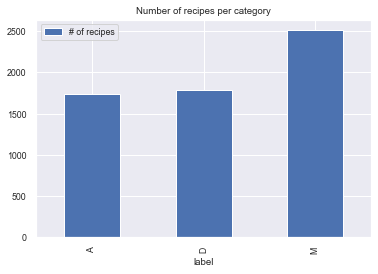

In [49]:
df_labelled = df[~df['label'].isna()].reset_index(drop=True)
df_labelled.groupby('label').size().reset_index().rename(columns={0: "# of recipes"}).plot.bar(x='label', y='# of recipes', title="Number of recipes per category")

Preprocess the data and explain (max. 200 words) which preprocessing steps you chose and why, and give statistics of the number of documents, types, and tokens, before and after preprocessing.

In our final database, we still have the cleaned and uncleaned versions of all the data we use, hence we will analyze those different columns.

In [50]:
df['directions'][0]

['Rub the chicken with salt half the ginger the garlic and 1 tablespoon of the ghee; set aside.',
 'Heat the remaining oil in a large saucepan or Dutch oven.',
 'Add the bay leaves cardamom and cloves and sizzle for a few seconds.',
 'Add the chicken and brown all over.',
 'Add the onion and stir-fry for 2 to 3 minutes.',
 'Add the remaining ginger chili powder and rice stirring gently.',
 'Add the salt tomato sauce and water and mix well.',
 'Bring to a boil reduce heat to low or simmer and cover the pan.',
 'Cook for 10 to 12 minutes or until rice is tender.',
 'Remove the lid fluff the rice with a fork and let stand 5 minutes.']

In [51]:
df.head()

label                                   title  \
0     M                   Chicken & Tomato Rice   
1     D                  Apple Lavender Muffins   
2     D  French Toast Apple-Maple Brunch Strata   
3     M          Kofta Burger With Brie & Swiss   
4     M               Boiling Pot Shrimp Recipe   

                                         ingredients  \
0  [1 12 lbs boneless chicken cut into chunks, sa...   
1  [1 1/2 cups all-purpose flour, 1/2 cup sugar, ...   
2  [3 tablespoons butter, 2 medium apples peeled ...   
3  [2 pounds Ground Beef (85/15), 1 cup Onion (fi...   
4  [2 lbs. fresh shrimp, 1 bag shrimp and crab bo...   

                                          directions  \
0  [Rub the chicken with salt half the ginger the...   
1  [Preheat oven to 375 degrees., Coat 12 muffin ...   
2  [Butter a 9-inch baking dish., Melt butter in ...   
3  [You MUST chop the onions and parsley by hand....   
4  [Peel potatoes only around middle., Bring pot ...   

                          title_processed  \
0                     chicken tomato rice   
1                   apple lavender muffin   
2  french toast apple maple brunch strata   
3                 kofta burger brie swiss   
4               boiling pot shrimp recipe   

                                directions_processed  \
0  rub chicken salt ginger garlic tablespoon ghee...   
1  preheat degree muffin tin cooking spray line m...   
2  butter -inch bake dish butter skillet heat add...   
3  chop onion parsley hand put food processor jui...   
4  peel potato middle bring pot water boil add pi...   

                           directions_processed_list  \
0  [[rub_VERB, chicken_NOUN, salt_NOUN, ginger_NO...   
1  [[preheat_NOUN, degree_NOUN], [muffin_VERB, ti...   
2  [[butter_NOUN, -inch_NOUN, bake_VERB, dish_NOU...   
3  [[chop_VERB, onion_NOUN, parsley_NOUN, hand_NO...   
4  [[peel_NOUN, potato_NOUN, middle_NOUN], [bring...   

                                   flattened_process  \
0  [rub_VERB, chicken_NOUN, salt_NOUN, ginger_NOU...   
1  [preheat_NOUN, degree_NOUN, muffin_VERB, tin_N...   
2  [butter_NOUN, -inch_NOUN, bake_VERB, dish_NOUN...   
3  [chop_VERB, onion_NOUN, parsley_NOUN, hand_NOU...   
4  [peel_NOUN, potato_NOUN, middle_NOUN, bring_VE...   

                         ingredients_cleaned_weights  \
0  [1_12_pound, boneless, chicken, chunk, salt, 1...   
1  [1_1_cup_purpose_flour, 1_cup_sugar, 2_teaspoo...   
2  [3_tablespoon_butter, medium, apple, 3_cup, ra...   
3  [2_pound, 1_cup, onion, 1_cup, salt, cheese, b...   
4  [2_lb, shrimp, bag, shrimp, crab, boil, dozen,...   

                       ingredients_cleaned_noweights  \
0  [X_X_pound, boneless, chicken, chunk, salt, X_...   
1  [X_X_cup_purpose_flour, X_cup_sugar, X_teaspoo...   
2  [X_tablespoon_butter, medium, apple, X_cup, ra...   
3  [X_pound, X_cup, onion, X_cup, salt, cheese, b...   
4  [X_lb, shrimp, bag, shrimp, crab, boil, dozen,...   

                 ingredients_fully_cleaned_stopwords  \
0  [boneless, chicken, chunk, salt, ginger, garli...   
1  [purpose, flour, sugar, powder, salt, milk, la...   
2  [butter, medium, apple, raisin, walnut, sugar,...   
3               [onion, salt, cheese, brie, arugula]   
4  [shrimp, bag, shrimp, crab, boil, potato, ear,...   

              ingredients_fully_cleaned_collocations  \
0  [pound, boneless, chicken, chunk, salt, ginger...   
1  [purpose, flour, sugar, powder, salt, milk, la...   
2  [butter, medium, apple, raisin, walnut, sugar,...   
3               [onion, salt, cheese, brie, arugula]   
4  [shrimp, bag, shrimp, crab, boil, dozen, potat...   

                              directions_struct_pred  
0  [rub the chicken with salt half the ginger the...  
1  [preheat oven to 375 degrees, coat 12 muffin t...  
2  [butter a 9-inch baking dish, melt butter in a...  
3  [you must chop the onions and parsley by hand ...  
4  [peel potatoes only around middle, bring pot o...

In [52]:
def changes_for_string(s):
    s = str(s)
    s = re.sub('(\.\d+|\d+\.\d+|\d+|\d+\,\d+)', r' \1 ', s)
    s = re.sub('\s{2,}', ' ', s)
    s = re.sub('([.,!?]+)', r'\1 ', s)
    s = re.sub('\s{2,}', ' ', s)
    return s

In [53]:
name_columns_list = ['title', 'title_processed', 'directions_processed']
name_columns_list_list = ['ingredients', 'directions', 'ingredients_cleaned_weights','ingredients_cleaned_noweights','ingredients_fully_cleaned_stopwords',
       'ingredients_fully_cleaned_collocations', 'directions_struct_pred']

for item in name_columns_list:
    all_text = ""
    for item1 in df[item]:
        all_text = all_text + changes_for_string(item1)
    print(str(item) + " " + str(len(all_text)))
        
        
for item in name_columns_list_list:
    all_text = ""
    for item1 in df[item]:
        for item2 in item1:
            all_text = all_text + changes_for_string(item2)
    print(str(item) + " " + str(len(all_text)))

title 606603
title_processed 525602
directions_processed 6059562
ingredients 5537055
directions 11967138
ingredients_cleaned_weights 3012001
ingredients_cleaned_noweights 2697522
ingredients_fully_cleaned_stopwords 1680048
ingredients_fully_cleaned_collocations 1651664
directions_struct_pred 11634422


As we can see in the directions processed or ingredient cleaned, we cut off about half of the words. In fully cleaned ingredients we cut off about 70% of the words. Regarding the titles, we can see that not many words were cut off, only about 14%.

Provide some basic analysis of the training data with any of the following analysis methods (justify your choices):

1. Topic modeling with LDA. Justify your choice of number of topics!
2. Word embeddings 
3. Document embeddings: visualize these and show a clustering

In [54]:
df = get_data()

In [55]:
df['ingredients_str'] = df.ingredients_fully_cleaned_stopwords.astype(str)

In [56]:
''' TFIDF for all ingredients'''

# initialize tfidf vectorizer
tfidf_vectorizer = TfidfVectorizer(analyzer='word',
                                        min_df=0.001, 
                                        max_df=0.5, 
                                        #tokenizer = None, 
                                        stop_words='english', 
                                        sublinear_tf=True)

# fit all lyrics
tfidf_X = tfidf_vectorizer.fit_transform(df.ingredients_str)

# initialize count vectorizer
vectorizer = CountVectorizer(analyzer='word', 
                             min_df=0.001, 
                             max_df=0.5, 
                             stop_words='english')

# fit all lyrics
count_X = vectorizer.fit_transform(df.ingredients_str)

# check shapes of results are similar
assert count_X.shape == tfidf_X.shape

# create dataframe form results and sort by TFIDF, TF, IDF
tfidf_df = pd.DataFrame(data={'word': vectorizer.get_feature_names(), 
                        'tf': count_X.sum(axis=0).A1, 
                        'idf': tfidf_vectorizer.idf_,
                        'tfidf': tfidf_X.sum(axis=0).A1
                   }).sort_values(['tfidf', 'tf', 'idf'], ascending = False).reset_index()
tfidf_df.head(10)

index    word     tf       idf        tfidf
0    571    salt  11393  1.721944  1284.839976
1    657   sugar   8537  2.154231  1208.982746
2    469  pepper  10498  1.982150  1194.137752
3    227     egg   6154  2.318291  1026.563813
4    435     oil   7897  2.120315  1017.064830
5     82  butter   6465  2.299219  1007.581982
6    439   onion   7322  2.138916   989.121159
7    677    tbsp   5753  2.841796   937.848192
8    256   flour   5514  2.455062   932.671625
9    117  cheese   6066  2.488950   925.216622

/Users/louislacombe/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


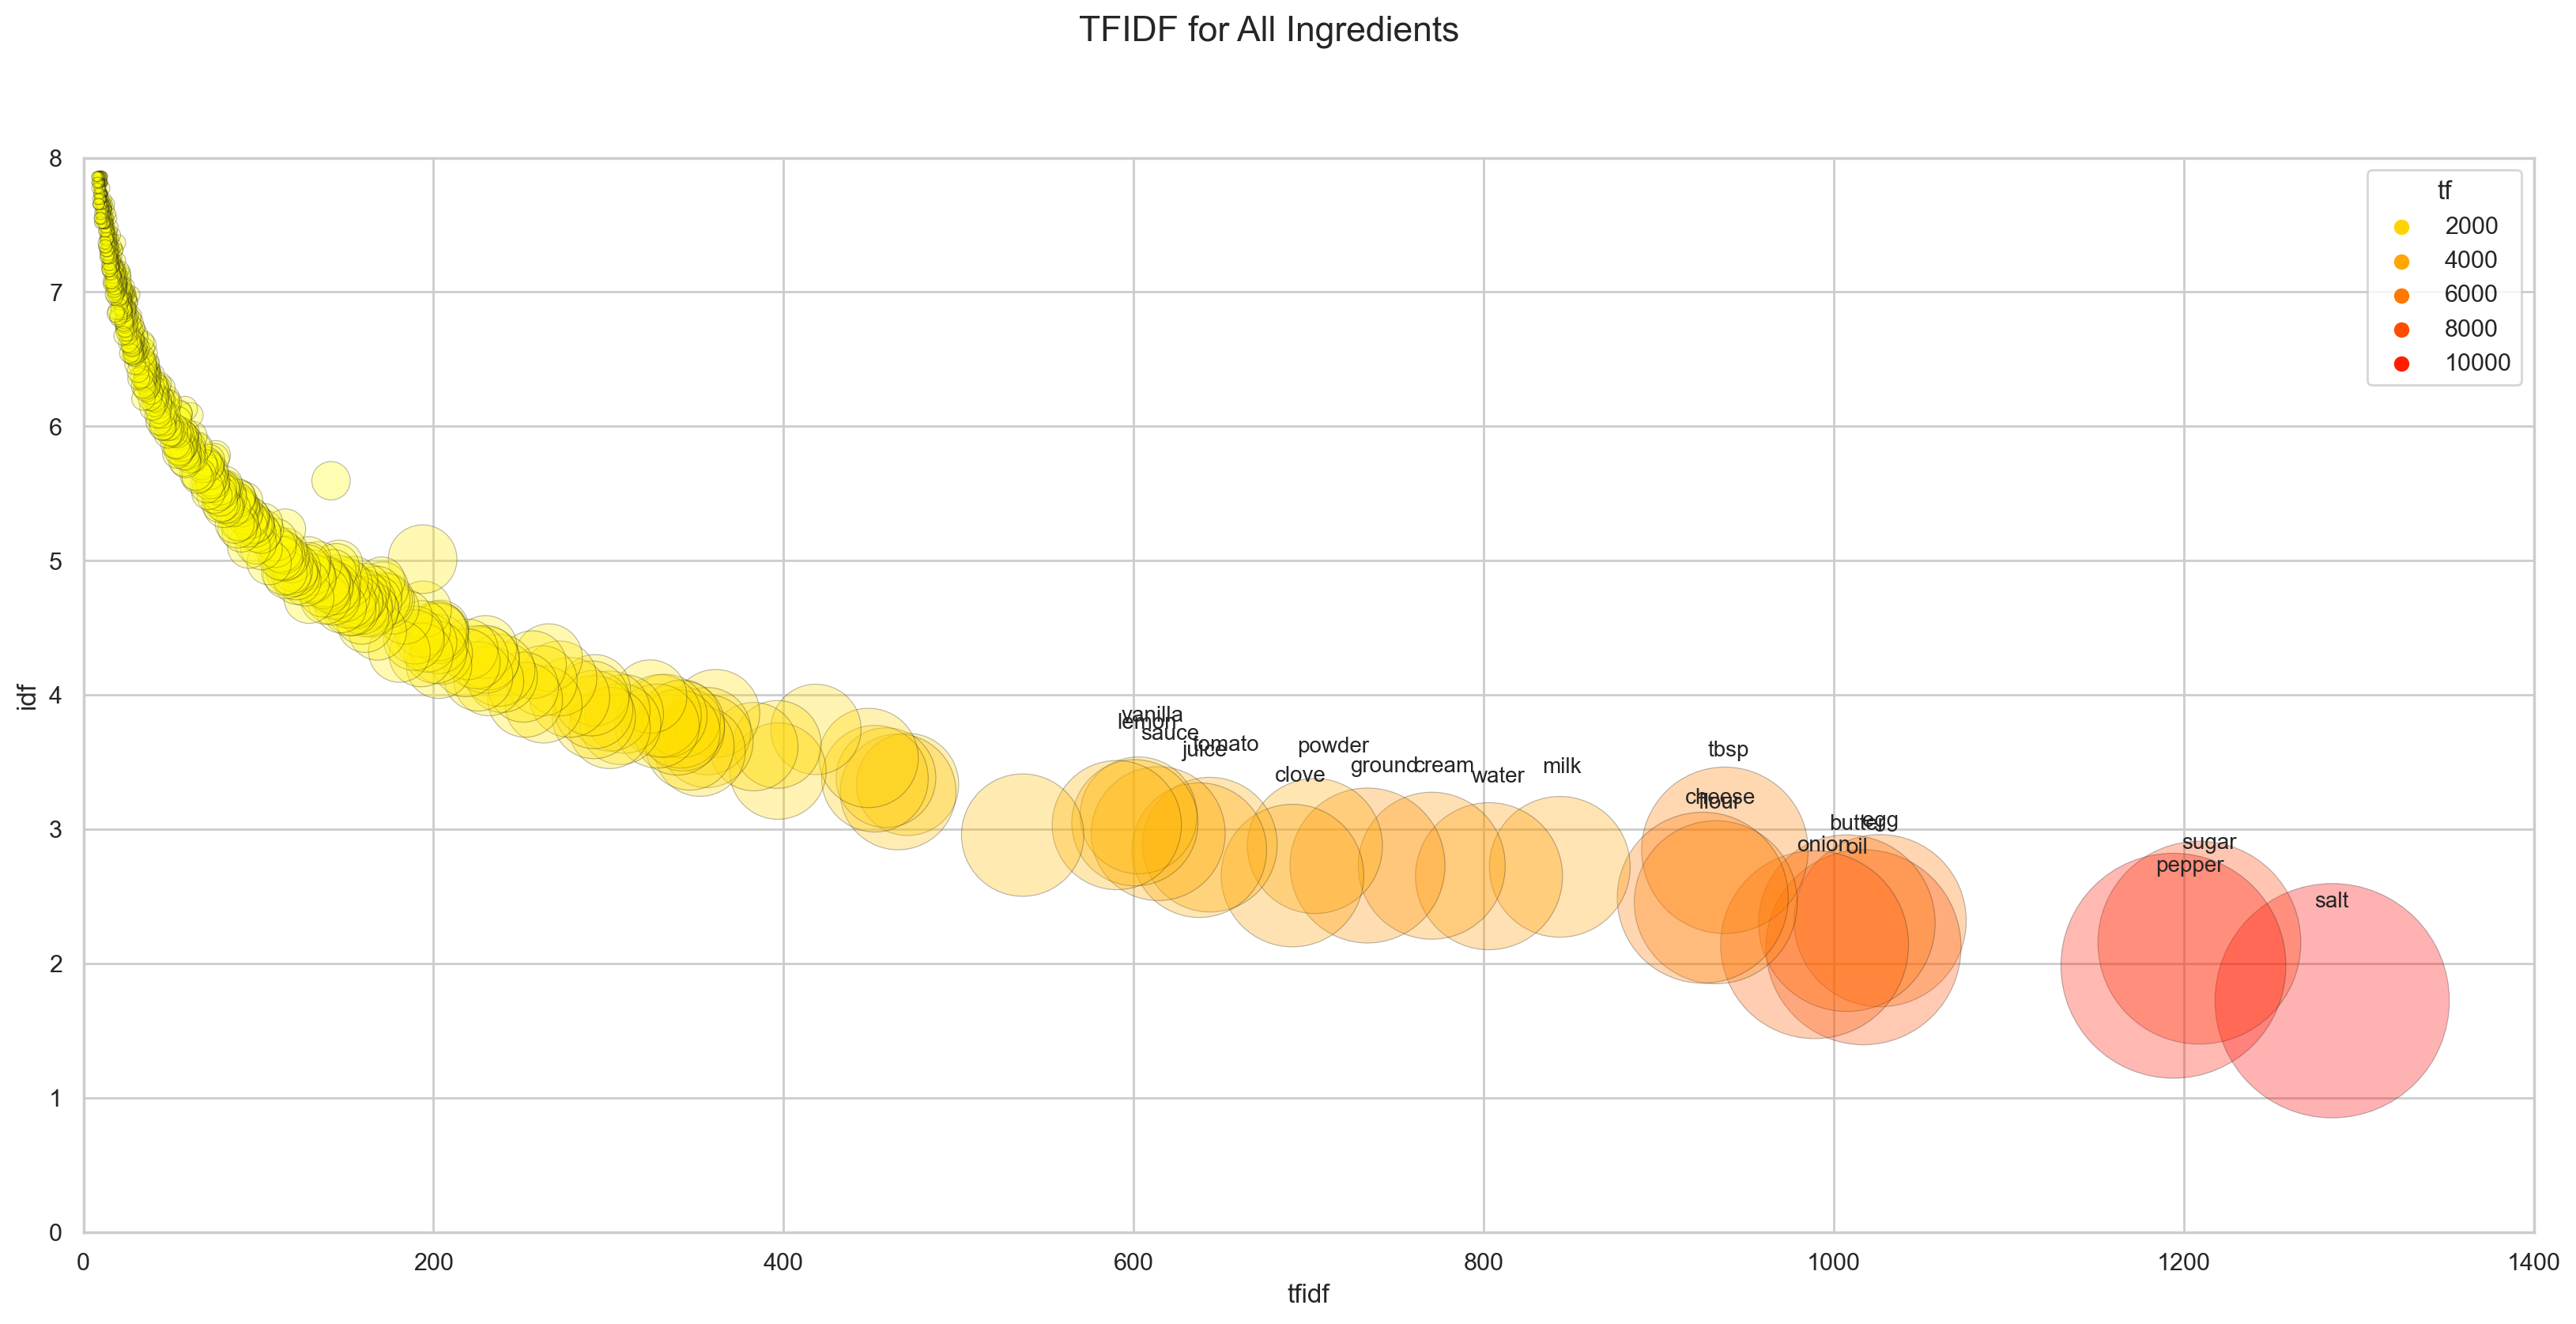

In [57]:
''' TFIDF plot for all ingredients combined'''

sns.set_theme('notebook')
sns.set_style("whitegrid")


fig, ax = plt.subplots(1,1, figsize = (20, 9), dpi = 200)
plt.ylim(0,8)
plt.xlim(0,1400)
fig.suptitle('TFIDF for All Ingredients', fontsize=16)

sns.scatterplot(tfidf_df.tfidf, tfidf_df.idf, alpha = 0.3, linewidths = 1.2, edgecolor = 'k', s = tfidf_df.tf, palette = 'autumn_r', hue = tfidf_df.tf);

for i, txt in enumerate(tfidf_df.word.loc[:20]):
    ax.annotate(txt, (tfidf_df.tfidf[i]-10, tfidf_df.idf[i]+0.7), fontsize=10)

In [58]:
''' tfidf vectorizer for every dish type'''

#start Appetizers (A)
A_tfidf_vectorizer = TfidfVectorizer(analyzer='word', 
                                        #lowercase = False,
                                        min_df=0.001, 
                                        max_df=0.5, 
                                        #tokenizer = None,
                                        stop_words='english', 
                                        sublinear_tf=True)

A_tfidf_X = A_tfidf_vectorizer.fit_transform(df[df['label'] == 'A'].ingredients_str)

A_vectorizer = CountVectorizer(analyzer='word', 
                             min_df=0.001, 
                             max_df=0.5, 
                             stop_words='english')

A_count_X = A_vectorizer.fit_transform(df[df['label'] == 'A'].ingredients_str)

assert A_count_X.shape == A_tfidf_X.shape
A_tfidf_df = pd.DataFrame(data={'word': A_vectorizer.get_feature_names(), 
                        'tf': A_count_X.sum(axis=0).A1, 
                        'idf': A_tfidf_vectorizer.idf_,
                        'tfidf': A_tfidf_X.sum(axis=0).A1
                   }).sort_values(['tfidf', 'tf', 'idf'], ascending = False).reset_index() # sort by TFIDF, then TF, then IDF

#start Main Dishes (M)
M_tfidf_vectorizer = TfidfVectorizer(analyzer='word', 
                                        #lowercase = False,
                                        min_df=0.001, 
                                        max_df=0.5, 
                                        #tokenizer = None,
                                        stop_words='english', 
                                        sublinear_tf=True)

M_tfidf_X = M_tfidf_vectorizer.fit_transform(df[df['label'] == 'M'].ingredients_str)

M_vectorizer = CountVectorizer(analyzer='word', 
                             min_df=0.001, 
                             max_df=0.5, 
                             stop_words='english')

M_count_X = M_vectorizer.fit_transform(df[df['label'] == 'M'].ingredients_str)

assert M_count_X.shape == M_tfidf_X.shape
M_tfidf_df = pd.DataFrame(data={'word': M_vectorizer.get_feature_names(), 
                        'tf': M_count_X.sum(axis=0).A1, 
                        'idf': M_tfidf_vectorizer.idf_,
                        'tfidf': M_tfidf_X.sum(axis=0).A1
                   }).sort_values(['tfidf', 'tf', 'idf'], ascending = False).reset_index() # sort by TFIDF, then TF, then IDF

#start Deserts (D)
D_tfidf_vectorizer = TfidfVectorizer(analyzer='word', 
                                        #lowercase = False,
                                        min_df=0.001, 
                                        max_df=0.5, 
                                        #tokenizer = None,
                                        stop_words='english', 
                                        sublinear_tf=True)

D_tfidf_X = D_tfidf_vectorizer.fit_transform(df[df['label'] == 'D'].ingredients_str)

D_vectorizer = CountVectorizer(analyzer='word', 
                             min_df=0.001, 
                             max_df=0.5, 
                             stop_words='english')

D_count_X = D_vectorizer.fit_transform(df[df['label'] == 'D'].ingredients_str)

assert D_count_X.shape == D_tfidf_X.shape
D_tfidf_df = pd.DataFrame(data={'word': D_vectorizer.get_feature_names(), 
                        'tf': D_count_X.sum(axis=0).A1, 
                        'idf': D_tfidf_vectorizer.idf_,
                        'tfidf': D_tfidf_X.sum(axis=0).A1
                   }).sort_values(['tfidf', 'tf', 'idf'], ascending = False).reset_index() # sort by TFIDF, then TF, then IDF

/Users/louislacombe/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/louislacombe/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/louislacombe/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or m

<Figure size 432x288 with 0 Axes>

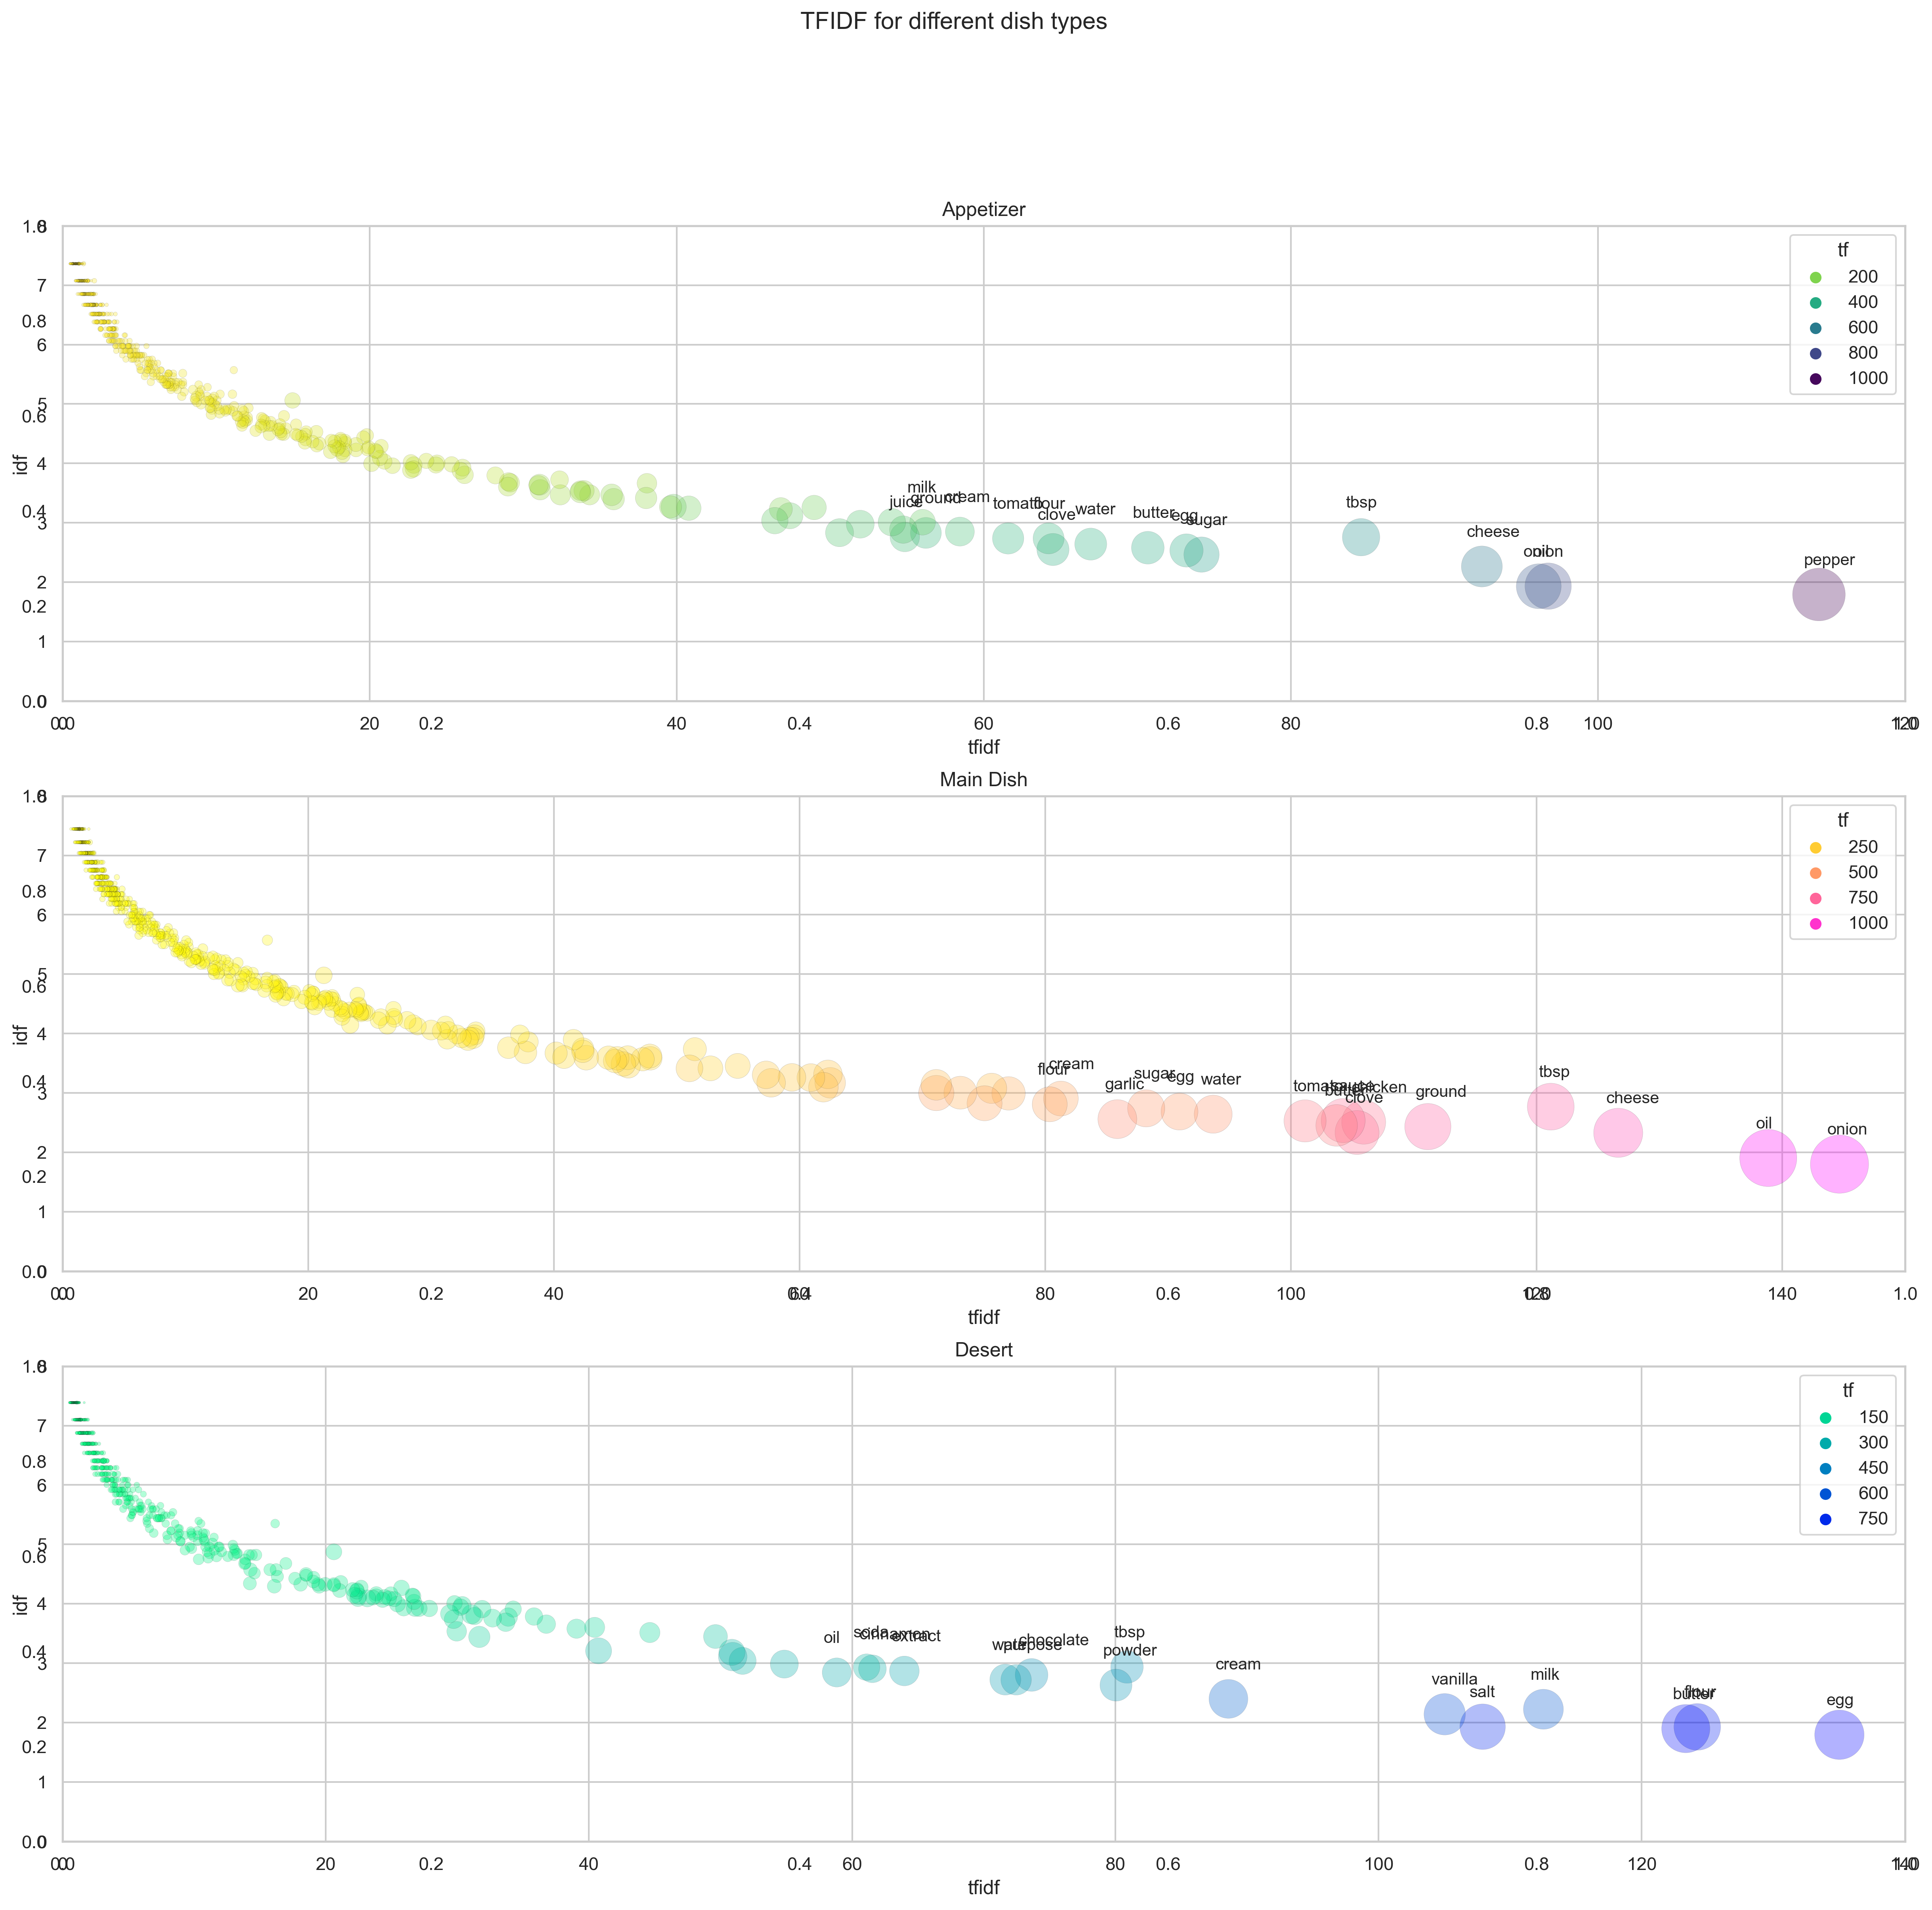

In [59]:
''' TFIDF plot for different dish types'''

sns.set_theme('notebook')
sns.set_style("whitegrid")

fig = plt.figure()
fig, ax = plt.subplots(3,1, figsize = (20, 18), dpi = 300)
fig.suptitle('TFIDF for different dish types')

ax = fig.add_subplot(3, 1, 1)
plt.ylim(0,8)
plt.xlim(0,120)


sns.scatterplot(A_tfidf_df.tfidf, A_tfidf_df.idf, alpha = 0.3, linewidths = 1.2, edgecolor = 'k', s = A_tfidf_df.tf, palette = 'viridis_r', hue = A_tfidf_df.tf).set_title('Appetizer');

for i, txt in enumerate(A_tfidf_df.word.loc[:15]):
    ax.annotate(txt, (A_tfidf_df.tfidf[i]-1, A_tfidf_df.idf[i]+0.5), fontsize=10)

ax = fig.add_subplot(3, 1, 2)
plt.ylim(0,8)
plt.xlim(0,150)

sns.scatterplot(M_tfidf_df.tfidf, M_tfidf_df.idf, alpha = 0.3, linewidths = 1.2, edgecolor = 'k', s = M_tfidf_df.tf, palette = 'spring_r', hue = M_tfidf_df.tf).set_title('Main Dish');

for i, txt in enumerate(M_tfidf_df.word.loc[:15]):
    ax.annotate(txt, (M_tfidf_df.tfidf[i]-1, M_tfidf_df.idf[i]+0.5), fontsize=10)

ax = fig.add_subplot(3, 1, 3)
plt.ylim(0,8)
plt.xlim(0,140)

sns.scatterplot(D_tfidf_df.tfidf, D_tfidf_df.idf, alpha = 0.3, linewidths = 1.2, edgecolor = 'k', s = D_tfidf_df.tf, palette = 'winter_r', hue = D_tfidf_df.tf).set_title('Desert');

for i, txt in enumerate(D_tfidf_df.word.loc[:15]):
    ax.annotate(txt, (D_tfidf_df.tfidf[i]-1, D_tfidf_df.idf[i]+0.5), fontsize=10)
    
plt.show()

In [60]:
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

## 1) word embedding

In [61]:
final = df
final_all_label = final.dropna(subset=("label","ingredients_fully_cleaned_stopwords"))
final_all_label.label.unique() #check the unique values

array(['M', 'D', 'A'], dtype=object)

In [62]:
#final_all_label

We selected only the rows without the __Nan__.

In [63]:
only_label_ingedients = final_all_label.loc[:,("label","ingredients_fully_cleaned_stopwords")] #only the label and ingredients without stopwords

We now spit the dataset for different label, plus the general 

In [64]:
A_word_em = final_all_label[final_all_label["label"]=="A"].loc[:,"ingredients_fully_cleaned_stopwords"].reset_index(drop=True)
M_word_em = final_all_label[final_all_label["label"]=="M"].loc[:,"ingredients_fully_cleaned_stopwords"].reset_index(drop=True)
D_word_em = final_all_label[final_all_label["label"]=="D"].loc[:,"ingredients_fully_cleaned_stopwords"].reset_index(drop=True)
gen_word_em = only_label_ingedients.loc[:,"ingredients_fully_cleaned_stopwords"]

In [65]:
A_word_em # check

0                         [loaf, tbsp, tbsp, flake, tbsp]
1       [egg, medium, tomato, slice, cheese, milk, egg...
2                                            [apple, pkg]
3       [tomato, orange, pepper, pepper, onion, clove,...
4              [pasta, bean, lettuce, dressing, dressing]
                              ...                        
1732    [onion, cream, tbsp, mayonnaise, tbsp, lemon, ...
1733    [butter, cubed, potato, onion, parsley, salt, ...
1734    [slice, bread, sugar, butter, cinnamon, tbsp, ...
1735    [corn, kernel, ear, oil, lemon, juice, honey, ...
1736    [sugar, corn, syrup, water, peanut, butter, va...
Name: ingredients_fully_cleaned_stopwords, Length: 1737, dtype: object

In [66]:
# Give the already list we recall the name
A_word_em_li = A_word_em  
M_word_em_li = M_word_em 
D_word_em_li = D_word_em 
gen_word_em_li = gen_word_em 

The followed function __clean_space__ help to remove all the spaces,commas and drop the empty list and remove some word which aren't usefull for us

In [67]:
def clean_space (list_):
    adjus = []
    space= re.compile(" ")
    comma = re.compile(",")
    for sentence in list_:
        temp = []
        for word in sentence:
            if word == " " or word =="" or word=="," or word in ["tbsp","pkg","inch"]: 
                pass
            else:
                adjusted = re.sub(space,"",word)
                adjusted = re.sub(comma,"",adjusted)
                temp.append(adjusted)
        if temp == []:
            pass
        else:
            adjus.append(temp)
    return adjus

In [68]:
A_word_em_li = clean_space(A_word_em_li)
M_word_em_li = clean_space(M_word_em_li)
D_word_em_li = clean_space(D_word_em_li)
gen_word_em_li = clean_space(gen_word_em_li)

### A 

In [69]:
corpus_A = A_word_em_li 

# initialize model
w2v_model_A = Word2Vec(size = 200, # vector size 200 is good choice in order to avoid the overfitting 
                     window = 15, # window for sampling
                     sample = 0.0001, # subsampling rate
                     iter = 300, # iterations
                     negative = 5, # negative samples
                     min_count = 100, # minimum threshold
                     workers = -1, # parallelize to all cores
                     hs = 0 # no hierarchical softmax
)

# build the vocabulary
w2v_model_A.build_vocab(corpus_A)

# train the model
w2v_model_A.train(corpus_A, 
                total_examples = w2v_model_A.corpus_count, 
                epochs = w2v_model_A.epochs)

(0, 0)

In [70]:
print(w2v_model_A.corpus_count)
print(w2v_model_A.epochs)

1731
300


In [71]:
w2c_A = dict()
for item in w2v_model_A.wv.vocab:
    w2c_A[item]=w2v_model_A.wv.vocab[item].count

In [72]:
w2v_model_A.wv.vocab #find the words in the vocabulary

{'egg': <gensim.models.keyedvectors.Vocab at 0x7fea9443b1f0>,
 'medium': <gensim.models.keyedvectors.Vocab at 0x7fea9443b040>,
 'tomato': <gensim.models.keyedvectors.Vocab at 0x7fea9443e8b0>,
 'slice': <gensim.models.keyedvectors.Vocab at 0x7fea6bc92d00>,
 'cheese': <gensim.models.keyedvectors.Vocab at 0x7fea6bc92f70>,
 'milk': <gensim.models.keyedvectors.Vocab at 0x7fea6bc92e20>,
 'salt': <gensim.models.keyedvectors.Vocab at 0x7fea6bc921f0>,
 'pepper': <gensim.models.keyedvectors.Vocab at 0x7fea6bc92d90>,
 'onion': <gensim.models.keyedvectors.Vocab at 0x7fea6bc92dc0>,
 'clove': <gensim.models.keyedvectors.Vocab at 0x7fea6bc92fd0>,
 'garlic': <gensim.models.keyedvectors.Vocab at 0x7fea6bc92160>,
 'oil': <gensim.models.keyedvectors.Vocab at 0x7fea6bc92ac0>,
 'bean': <gensim.models.keyedvectors.Vocab at 0x7fea6bc920a0>,
 'package': <gensim.models.keyedvectors.Vocab at 0x7fea6bc92d30>,
 'vinegar': <gensim.models.keyedvectors.Vocab at 0x7fea6bc92a30>,
 'potato': <gensim.models.keyedvectors

### M

In [73]:
corpus_M = M_word_em_li 

# initialize model
w2v_model_M = Word2Vec(size = 200, # vector size 200 is good choice in order to avoid the overfitting 
                     window = 15, # window for sampling
                     sample = 0.0001, # subsampling rate
                     iter = 300, # iterations
                     negative = 5, # negative samples
                     min_count = 100, # minimum threshold
                     workers = -1, # parallelize to all cores
                     hs = 0 # no hierarchical softmax
)

# build the vocabulary
w2v_model_M.build_vocab(corpus_M)

# train the model
w2v_model_M.train(corpus_M, 
                total_examples = w2v_model_M.corpus_count, 
                epochs = w2v_model_M.epochs)

(0, 0)

In [74]:
w2v_model_M.corpus_count

2508

In [75]:
w2v_model_M.epochs

300

In [76]:
w2c_M = dict()
for item in w2v_model_M.wv.vocab:
    w2c_M[item]=w2v_model_M.wv.vocab[item].count

In [77]:
w2v_model_M.wv.vocab #find the words in the vocabulary 

{'chicken': <gensim.models.keyedvectors.Vocab at 0x7fea9443e190>,
 'salt': <gensim.models.keyedvectors.Vocab at 0x7fea9443e1f0>,
 'ginger': <gensim.models.keyedvectors.Vocab at 0x7fea9443e550>,
 'garlic': <gensim.models.keyedvectors.Vocab at 0x7fea9443e0a0>,
 'vegetable': <gensim.models.keyedvectors.Vocab at 0x7fea9443eee0>,
 'oil': <gensim.models.keyedvectors.Vocab at 0x7fea9443eac0>,
 'seed': <gensim.models.keyedvectors.Vocab at 0x7fea9443e940>,
 'clove': <gensim.models.keyedvectors.Vocab at 0x7fea9443e430>,
 'onion': <gensim.models.keyedvectors.Vocab at 0x7fea5e894490>,
 'chili': <gensim.models.keyedvectors.Vocab at 0x7fea5e8940d0>,
 'powder': <gensim.models.keyedvectors.Vocab at 0x7fea5e894100>,
 'pepper': <gensim.models.keyedvectors.Vocab at 0x7fea5e894130>,
 'flake': <gensim.models.keyedvectors.Vocab at 0x7fea5e8943d0>,
 'rice': <gensim.models.keyedvectors.Vocab at 0x7fea5e8941f0>,
 'tomato': <gensim.models.keyedvectors.Vocab at 0x7fea5e894310>,
 'sauce': <gensim.models.keyedvect

### D


In [78]:
corpus_D = D_word_em_li 

# initialize model
w2v_model_D = Word2Vec(size = 200, # vector size 200 is good choice in order to avoid the overfitting 
                     window = 15, # window for sampling
                     sample = 0.0001, # subsampling rate
                     iter = 300, # iterations
                     negative = 5, # negative samples
                     min_count = 100, # minimum threshold
                     workers = -1, # parallelize to all cores
                     hs = 0 # no hierarchical softmax
)

# build the vocabulary
w2v_model_D.build_vocab(corpus_D)

# train the model
w2v_model_D.train(corpus_D, 
                total_examples = w2v_model_D.corpus_count, 
                epochs = w2v_model_D.epochs)

(0, 0)

In [79]:
w2v_model_D.corpus_count

1776

In [80]:
w2v_model_D.epochs

300

In [81]:
w2c_D = dict()
for item in w2v_model_D.wv.vocab:
    w2c_D[item]=w2v_model_D.wv.vocab[item].count

In [82]:
w2v_model_D.wv.vocab #find the word in the vocabulary

{'purpose': <gensim.models.keyedvectors.Vocab at 0x7fea5e8aaa60>,
 'flour': <gensim.models.keyedvectors.Vocab at 0x7fea5e8aadf0>,
 'sugar': <gensim.models.keyedvectors.Vocab at 0x7fea5e8aaee0>,
 'powder': <gensim.models.keyedvectors.Vocab at 0x7fea5e8aae80>,
 'salt': <gensim.models.keyedvectors.Vocab at 0x7fea5e8b9040>,
 'milk': <gensim.models.keyedvectors.Vocab at 0x7fea5e8b90a0>,
 'butter': <gensim.models.keyedvectors.Vocab at 0x7fea5e8b9100>,
 'egg': <gensim.models.keyedvectors.Vocab at 0x7fea5e8b9160>,
 'apple': <gensim.models.keyedvectors.Vocab at 0x7fea5e8b91c0>,
 'medium': <gensim.models.keyedvectors.Vocab at 0x7fea5e8b9220>,
 'cinnamon': <gensim.models.keyedvectors.Vocab at 0x7fea5e8b9280>,
 'cream': <gensim.models.keyedvectors.Vocab at 0x7fea5e8b92e0>,
 'syrup': <gensim.models.keyedvectors.Vocab at 0x7fea5e8b9340>,
 'water': <gensim.models.keyedvectors.Vocab at 0x7fea5e8b93a0>,
 'oil': <gensim.models.keyedvectors.Vocab at 0x7fea5e8b9400>,
 'soda': <gensim.models.keyedvectors.V

### Generic

Now We want to analyse the generic corpus of the several recepit in the mixed labels (A,M,D).

In [83]:
corpus_gen = gen_word_em_li

# initialize model
w2v_model_gen = Word2Vec(size = 200, # vector size 200 is good choice in order to avoid the overfitting 
                     window = 15, # window for sampling
                     sample = 0.0001, # subsampling rate
                     iter = 300, # iterations
                     negative = 5, # negative samples
                     min_count = 100, # minimum threshold
                     workers = -1, # parallelize to all cores
                     hs = 0 # no hierarchical softmax
)

# build the vocabulary
w2v_model_gen.build_vocab(corpus_gen)

# train the model
w2v_model_gen.train(corpus_gen, 
                total_examples = w2v_model_gen.corpus_count, 
                epochs = w2v_model_gen.epochs)

(0, 0)

In [84]:
w2v_model_gen.corpus_count

6015

In [85]:
w2v_model_gen.epochs

300

In [86]:
w2c_gen = dict()
for item in w2v_model_gen.wv.vocab:
    w2c_gen[item]=w2v_model_gen.wv.vocab[item].count

In [87]:
w2v_model_gen.wv.vocab #trova le parole nel vocabolario

{'chicken': <gensim.models.keyedvectors.Vocab at 0x7fea5e8bb610>,
 'salt': <gensim.models.keyedvectors.Vocab at 0x7fea5e8bb7f0>,
 'ginger': <gensim.models.keyedvectors.Vocab at 0x7fea5e8bb850>,
 'garlic': <gensim.models.keyedvectors.Vocab at 0x7fea5e8bb940>,
 'vegetable': <gensim.models.keyedvectors.Vocab at 0x7fea5e8bb9d0>,
 'oil': <gensim.models.keyedvectors.Vocab at 0x7fea5e8bba30>,
 'bay': <gensim.models.keyedvectors.Vocab at 0x7fea5e8bba90>,
 'seed': <gensim.models.keyedvectors.Vocab at 0x7fea5e8bbaf0>,
 'clove': <gensim.models.keyedvectors.Vocab at 0x7fea5e8bbb50>,
 'onion': <gensim.models.keyedvectors.Vocab at 0x7fea5e8bbbb0>,
 'chili': <gensim.models.keyedvectors.Vocab at 0x7fea5e8bbc10>,
 'powder': <gensim.models.keyedvectors.Vocab at 0x7fea5e8bb5e0>,
 'pepper': <gensim.models.keyedvectors.Vocab at 0x7fea5e8bbca0>,
 'flake': <gensim.models.keyedvectors.Vocab at 0x7fea5e8bbd00>,
 'rice': <gensim.models.keyedvectors.Vocab at 0x7fea5e8bbd60>,
 'tomato': <gensim.models.keyedvector

#### Working with the above data

We create 3 different sets with all the ingridients we used for the different labels. 

In [88]:
words_A =set(w2c_A.keys())
words_M =set(w2c_M.keys())
words_D =set(w2c_D.keys())

In [89]:
"""
Showing the interseption between the three. We can observe the main ingredients we have to use in the most of the cases
"""
words_A.intersection(words_M,words_D)

{'butter',
 'cheese',
 'clove',
 'cream',
 'egg',
 'flour',
 'ground',
 'juice',
 'lemon',
 'medium',
 'milk',
 'oil',
 'onion',
 'package',
 'pepper',
 'piece',
 'powder',
 'purpose',
 'salt',
 'sauce',
 'sugar',
 'water'}

In [90]:
words_A.intersection(words_M) # between the 2 most similar in a broad sense

{'bacon',
 'basil',
 'bean',
 'bread',
 'broth',
 'butter',
 'carrot',
 'celery',
 'cheese',
 'chicken',
 'clove',
 'corn',
 'cream',
 'cumin',
 'egg',
 'flour',
 'garlic',
 'ground',
 'juice',
 'leave',
 'lemon',
 'lime',
 'medium',
 'milk',
 'mushroom',
 'mustard',
 'oil',
 'olive',
 'onion',
 'package',
 'parsley',
 'pepper',
 'piece',
 'potato',
 'powder',
 'purpose',
 'rice',
 'salt',
 'sauce',
 'seed',
 'slice',
 'sugar',
 'tomato',
 'vegetable',
 'vinegar',
 'water',
 'wine'}

### Using W2V as tool to search the similarity

#### A

In [91]:
w2v_model_A.wv.most_similar(["bread"])

[('pepper', 0.15875589847564697),
 ('potato', 0.138401597738266),
 ('leave', 0.12889264523983002),
 ('broth', 0.1146448403596878),
 ('celery', 0.08490031212568283),
 ('lemon', 0.0842343345284462),
 ('seed', 0.07742819935083389),
 ('piece', 0.06964372098445892),
 ('wine', 0.05799861624836922),
 ('egg', 0.052246056497097015)]

For the Aperitif the most similar word associated to __BREAD__ is __MILK__.

#### M

In [92]:
w2v_model_M.wv.most_similar(["salt"])

[('cheese', 0.1383003294467926),
 ('tomato', 0.11057452112436295),
 ('powder', 0.10600753128528595),
 ('noodle', 0.10583733767271042),
 ('cumin', 0.10390616953372955),
 ('skinless', 0.09706932306289673),
 ('mix', 0.09623228013515472),
 ('egg', 0.09607986360788345),
 ('milk', 0.08616501837968826),
 ('soy', 0.07842862606048584)]

For the Main Dish the most similar word associated to __SALT__ is __BEEF__.

#### D

In [93]:
w2v_model_D.wv.most_similar(["chocolate"])

[('strawberry', 0.13531053066253662),
 ('piece', 0.08920332044363022),
 ('cheese', 0.060580745339393616),
 ('mix', 0.060181718319654465),
 ('stick', 0.0574006661772728),
 ('water', 0.050702210515737534),
 ('pecan', 0.04892633110284805),
 ('purpose', 0.04696991294622421),
 ('shortening', 0.0398140586912632),
 ('room', 0.03932004049420357)]

For the Dessert the most similar word associated to __CHOCOLATE__ is __COCONUT__.

#### General

In [94]:
w2v_model_gen.wv.most_similar(["oil"])

[('chicken', 0.16173669695854187),
 ('mushroom', 0.1559213250875473),
 ('chili', 0.14897452294826508),
 ('soy', 0.145404651761055),
 ('steak', 0.12306232005357742),
 ('baby', 0.11541984230279922),
 ('pork', 0.11150174587965012),
 ('sugar', 0.10881142318248749),
 ('box', 0.10712634027004242),
 ('mayonnaise', 0.10585575550794601)]

In general the most similar word associated to __OIL__ is __RISE__.

In [95]:
w2v_model_gen.wv.most_similar(positive=["bread","salt"],negative=["sugar"]) 

[('jar', 0.16523677110671997),
 ('leave', 0.1633598506450653),
 ('rice', 0.15851359069347382),
 ('sausage', 0.13392099738121033),
 ('zucchini', 0.12300533056259155),
 ('whipping', 0.11623603105545044),
 ('crust', 0.11393183469772339),
 ('mix', 0.10911549627780914),
 ('egg', 0.10338956117630005),
 ('celery', 0.09968021512031555)]

## Graphic representation

Now we use a TFIDF in order to put inside a matrix the different sentence which are represented by the recepites

In [96]:
tfidf_vectorizer_gen = TfidfVectorizer(ngram_range=(1,2),  
                                   analyzer='word', 
                                   min_df=0.001, 
                                   max_df=0.7, 
                                   sublinear_tf=True, 
                                   use_idf=True
                                      )

In [97]:
"""
definition the charateristics of the TfidfVectorizer
"""
tfidf_vectorizer_A = TfidfVectorizer(ngram_range=(1,2),  
                                   analyzer='word', 
                                   min_df=0.001, 
                                   max_df=0.7, 
                                   sublinear_tf=True, 
                                   use_idf=True
                                    )
tfidf_vectorizer_M = TfidfVectorizer(ngram_range=(1,2),  
                                   analyzer='word', 
                                   min_df=0.001, 
                                   max_df=0.7, 
                                   sublinear_tf=True, 
                                   use_idf=True
                                    )
tfidf_vectorizer_D = TfidfVectorizer(ngram_range=(1,2),  
                                   analyzer='word', 
                                   min_df=0.001, 
                                   max_df=0.7, 
                                   sublinear_tf=True, 
                                   use_idf=True
                                    )

In [98]:
"""
this function is useful to reconvert the element of one list into 1 string. The reason is for tfidf_vectorizer
"""
def reconvert(li_li):
    rec = []
    for list_ in li_li:
        temp = " ".join(list_)
        rec.append(temp)
    return pd.Series(rec)

In [99]:
"""
We transform all the list 
"""
A_word_em_c = reconvert(A_word_em_li)
M_word_em_c = reconvert(M_word_em_li)
D_word_em_c = reconvert(D_word_em_li)
gen_word_em_c = reconvert(gen_word_em_li)

In [100]:
"""
We vectorize and fit the ingredients
"""
X_A = tfidf_vectorizer_A.fit_transform(A_word_em_c)
X_M = tfidf_vectorizer_M.fit_transform(M_word_em_c)
X_D = tfidf_vectorizer_D.fit_transform(D_word_em_c)
X_gen =  tfidf_vectorizer_D.fit_transform(gen_word_em_c)

## SVD

SVD decomposes the data into three components: the document view `U`, the singular values `S`, and the term view `V`.
SVD **(SINGULAR VALUE DECOMPOSITION)**

Now we apply the SVD for each label (A, M, D)

In [101]:
""" 
Set number of latent components
"""
k = 3 #we assign 3 in order to plot the result in 2 and 3 Dimension on the scatter plot

In [102]:
svd_A = TruncatedSVD(n_components = k) #k latent concepts
U_A = svd_A.fit_transform(X_A) #lower dimension
S_A = svd_A.singular_values_ #k*k digonal matrix
V_A = svd_A.components_ #latent concepts

In [103]:
svd_M = TruncatedSVD(n_components = k) #k latent concepts
U_M = svd_M.fit_transform(X_M) #lower dimension
S_M = svd_M.singular_values_ #k*k digonal matrix
V_M = svd_M.components_ #latent concepts

In [104]:
svd_D = TruncatedSVD(n_components = k) #k latent concepts
U_D = svd_D.fit_transform(X_D) #lower dimension
S_D = svd_D.singular_values_ #k*k digonal matrix
V_D = svd_D.components_ #latent concepts

In [105]:
svd_gen = TruncatedSVD(n_components = k) #k latent concepts
U_gen = svd_gen.fit_transform(X_gen) #lower dimension
S_gen = svd_gen.singular_values_ #k*k digonal matrix
V_gen = svd_gen.components_ #latent concepts

In [106]:
print("   Shape_A","\t Shape_M","\tShape_D")
print("  ___________________________________________")
print("U|",U_A.shape, "|\t", U_M.shape, "|\t", U_D.shape, "<----------|")
print("S|",S_A.shape, "     |\t", S_M.shape, "\t   |\t", S_D.shape)
print("V|",V_A.shape, "|\t", V_M.shape, "|\t", V_D.shape)

   Shape_A 	 Shape_M 	Shape_D
  ___________________________________________
U| (1731, 3) |	 (2508, 3) |	 (1776, 3) <----------|
S| (3,)      |	 (3,) 	   |	 (3,)
V| (3, 3593) |	 (3, 3146) |	 (3, 2998)


## NMF

NMF provides only two components: the document view `W`, and the term view `H`.
NMF **(NON NEGATIVE MATRIX FACTORIZATION)**

In [107]:
nmf_A = NMF(n_components = k, init='nndsvd', random_state=0)
W_A = nmf_A.fit_transform(X_A)
H_A = nmf_A.components_

In [108]:
nmf_M = NMF(n_components = k, init='nndsvd', random_state=0)
W_M = nmf_M.fit_transform(X_D)
H_M = nmf_M.components_

In [109]:
nmf_D = NMF(n_components = k, init='nndsvd', random_state=0)
# nndsvd = non negative double singular value decomposition  
W_D = nmf_D.fit_transform(X_M)
H_D = nmf_D.components_

In [110]:
nmf_gen = NMF(n_components = k, init='nndsvd', random_state=0)
W_gen = nmf_gen.fit_transform(X_gen)
H_gen = nmf_gen.components_

Again, the matrices have the respective sizes of the initial matrix and the latent dimensions

In [111]:
print("   Shape_A","\t Shape_M","\tShape_D")
print("  ___________________________________________")
print("W|",W_A.shape, "|\t", W_M.shape, "|\t", W_D.shape,"<-----------|")
print("H|",H_A.shape, "|\t", H_M.shape, "|\t", H_D.shape)


   Shape_A 	 Shape_M 	Shape_D
  ___________________________________________
W| (1731, 3) |	 (1776, 3) |	 (2508, 3) <-----------|
H| (3, 3593) |	 (3, 2998) |	 (3, 3146)


# Plot the Matrix

In [112]:
def plot_vectors(vectors, title='VIZ', labels=None, dimensions=3, text= False):
    sns.set_context('poster')
    """
    plot the vectors in 2 or 3 dimensions. 
    If labels are supplied, use them to color the data accordingly
    """
    # set up graph
    fig = plt.figure(figsize=(10,10))

    # create data frame
    df = pd.DataFrame(data={'x':vectors[:,0], 'y': vectors[:,1]})
    # add labels, if supplied
    if labels is not None:
        df['label'] = labels
    else:
        df['label'] = [''] * len(df)

    # assign colors to labels
    cm = plt.get_cmap('Spectral') # choose the color palette
    n_labels = len(df.label.unique())
    label_colors = [cm(1.2 * i/n_labels) for i in range(n_labels)]
    cMap = colors.ListedColormap(label_colors)
        
    # plot in 3 dimensions
    if dimensions == 3:
        # add z-axis information
        df['z'] = vectors[:,2]
        # define plot
        ax = fig.add_subplot(111, projection='3d')
        frame1 = plt.gca() 
        # remove axis ticks
        frame1.axes.xaxis.set_ticklabels([])
        frame1.axes.yaxis.set_ticklabels([])
        frame1.axes.zaxis.set_ticklabels([])

        # plot each label as scatter plot in its own color
        for l, label in enumerate(df.label.unique()):
            df2 = df[df.label == label]
            color_values = [label_colors[l]] * len(df2)
            ax.scatter(df2['x'], df2['y'], df2['z'], 
                       c=color_values, 
                       cmap=cMap, 
                       edgecolor='black', 
                       label=label, 
                       alpha=0.80, 
                       s=100)
        if text == True:
            for i, txt in enumerate(df.label.unique()):
                ax.text(df["x"][i], df["y"][i],df["z"][i], txt) 
      
    # plot in 2 dimensions
    elif dimensions == 2:
        ax = fig.add_subplot(111)
        frame1 = plt.gca() 
        frame1.axes.xaxis.set_ticklabels([])
        frame1.axes.yaxis.set_ticklabels([])

        for l, label in enumerate(df.label.unique()):
            df2 = df[df.label == label]
            color_values = [label_colors[l]] * len(df2)
            ax.scatter(df2['x'], df2['y'], 
                       c=color_values, 
                       cmap=cMap, 
                       edgecolor='black', 
                       label=label, 
                       alpha=0.80, 
                       s=100)
        if text == True:
            for i, txt in enumerate(df.label.unique()):
                ax.annotate(txt, (df["x"][i], df["y"][i]))
        
    else:
        raise NotImplementedError()
    
    plt.title(title)
    plt.legend()
    plt.show()

In [113]:
#We define all the labels to plot the graph
label = only_label_ingedients.label

### SVD

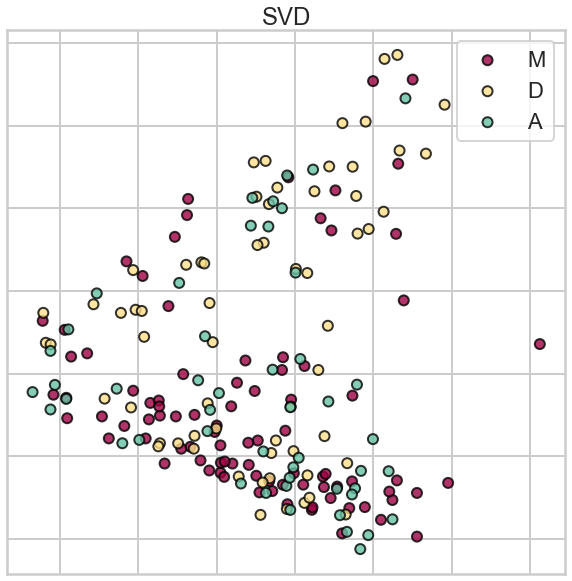

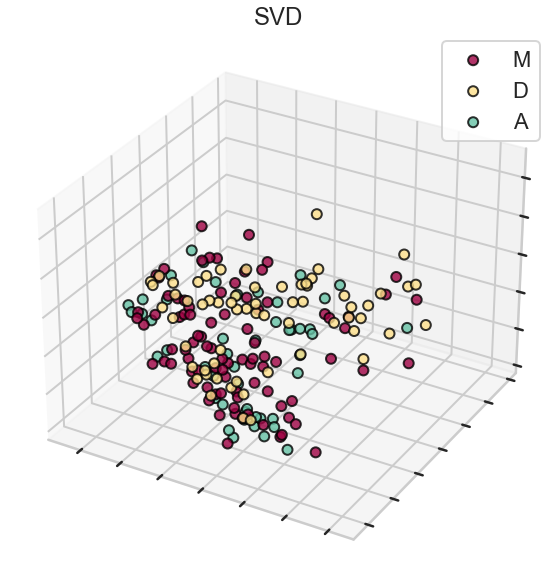

In [114]:
# We chose 200 observation to make more readable the graphs
plot_vectors(vectors = U_gen[:200], title= "SVD",labels=label, dimensions=2, text=False ) 
plot_vectors(vectors = U_gen[:200], title= "SVD",labels=label, dimensions=3, text=False )

### NMF

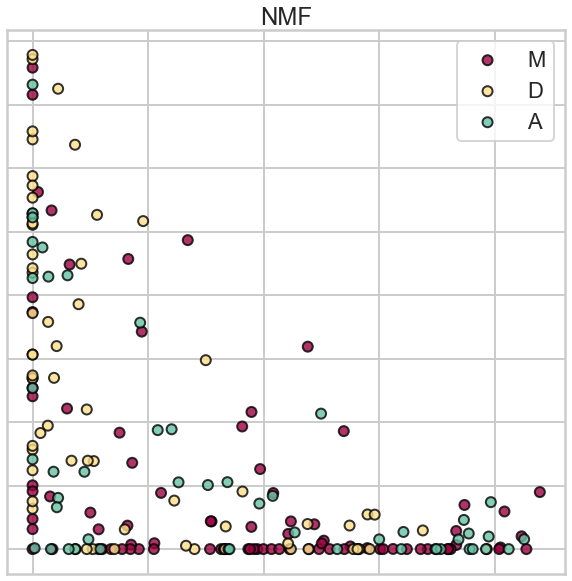

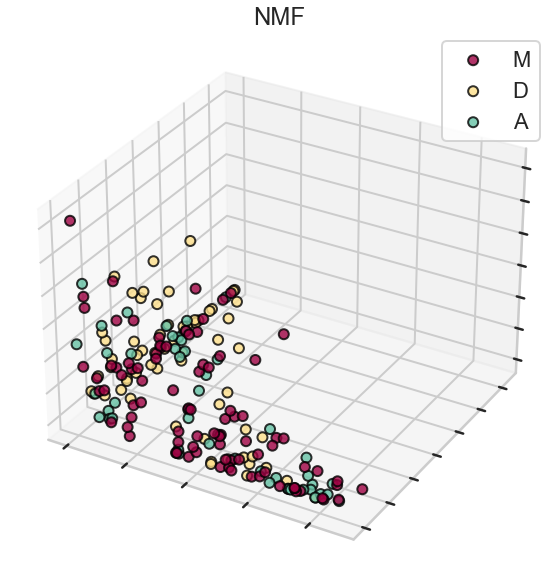

In [115]:
# We chose 200 observation to make more readable the graphs
plot_vectors(vectors = W_gen[:200], title= "NMF",labels=label, dimensions=2, text=False )
plot_vectors(vectors = W_gen[:200], title= "NMF",labels=label, dimensions=3, text=False )

The important difference we can observe above is that the yellow balls (__Dessert__) are a bit different compared to the red and green ones. This is reasonable because the __Aperitives__ and the __Main dishes__ have much in common. 

This is valid both SVD and NMF. 

### Singular Graph (A,M,D)

##### 2D

In [116]:
# plot_vectors(W_A[:200], "NMF", "A", 2, False)
# plot_vectors(U_A[:200], "SVD", "A", 2, False)
# plot_vectors(W_M[:200], "NMF", "A", 2, False)
# plot_vectors(U_M[:200], "SVD", "A", 2, False)
# plot_vectors(W_D[:200], "NMF", "A", 2, False)
# plot_vectors(U_D[:200], "SVD", "A", 2, False)

##### 3D

In [117]:
#plot_vectors(W_A[:200], "NMF", "A", 3, False)
#plot_vectors(U_A[:200], "SVD", "A", 3, False)
#plot_vectors(W_M[:200], "NMF", "A", 3, False)
#plot_vectors(U_M[:200], "SVD", "A", 3, False)
#plot_vectors(W_D[:200], "NMF", "A", 3, False)
#plot_vectors(U_D[:200], "SVD", "A", 3, False)

# Document embedding

In [118]:
# create a list of TaggedDocument objects

corpusd2v = []

for row in final_all_label.iterrows(): #iterating the row I am interested in the second element of row and in particular (Rating and Review Text)
    label = row[1].label
    text = row[1]["ingredients_fully_cleaned_stopwords"]
    corpusd2v.append(TaggedDocument(words=text, #.split(), 
                                 tags=[str(label)]))

print('done')
# initialize model

"""
My choices are:
    a size of 300 could be enough in order to avoid the overfitting problem
    windows = 15 
    sample = 0.001
    epochs = 1000 it's enough
    min_count = 100 

"""
d2v_model = Doc2Vec(vector_size=300,  
                    window=15,
                    hs=0, #no softmax
                    sample=0.001,
                    negative=5,
                    min_count=100,
                    workers=-1,
                    epochs=1000,
                    dm=0, 
                    dbow_words=1)

# build the vocabulary
d2v_model.build_vocab(corpusd2v)

# train the model
d2v_model.train(corpusd2v, total_examples=d2v_model.corpus_count, epochs=d2v_model.epochs)

done


In [119]:
d2v_model.docvecs.doctags

{'M': Doctag(offset=0, word_count=40532, doc_count=2515),
 'D': Doctag(offset=1, word_count=23335, doc_count=1781),
 'A': Doctag(offset=2, word_count=25236, doc_count=1737)}

In [120]:
target_doc = 'A'

similar_docs = d2v_model.docvecs.most_similar(target_doc, topn=2)
print(similar_docs)

[('M', -0.03444349393248558), ('D', -0.07768354564905167)]


In [121]:
target_doc = 'M'

similar_docs = d2v_model.docvecs.most_similar(target_doc, topn=2)
print(similar_docs)

[('D', -0.03268249332904816), ('A', -0.03444349393248558)]


In [122]:
target_doc = 'D'

similar_docs = d2v_model.docvecs.most_similar(target_doc, topn=2)
print(similar_docs)

[('M', -0.03268249332904816), ('A', -0.07768355309963226)]


In [123]:
tags = list(d2v_model.docvecs.doctags.keys())
Model_tags = d2v_model[tags]
Tsne = TSNE(n_components=3)
x_axis_tsne = Tsne.fit_transform(Model_tags)
TSNE_df = pd.DataFrame(x_axis_tsne,index = tags, columns=["x","y","z"])
#useful to represent on a graphial way and understand the dimensionality

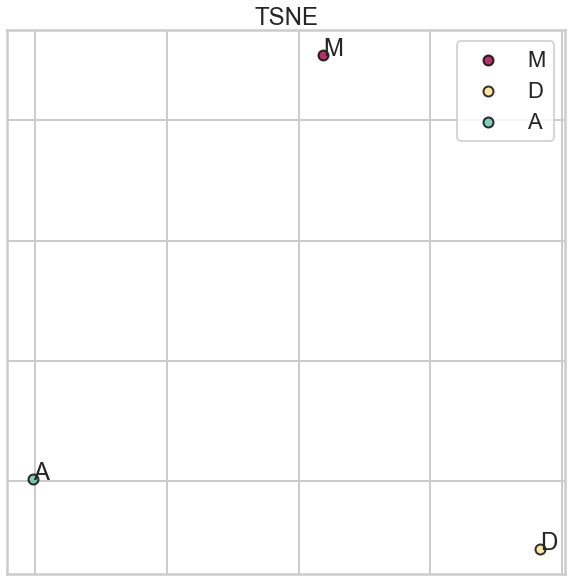

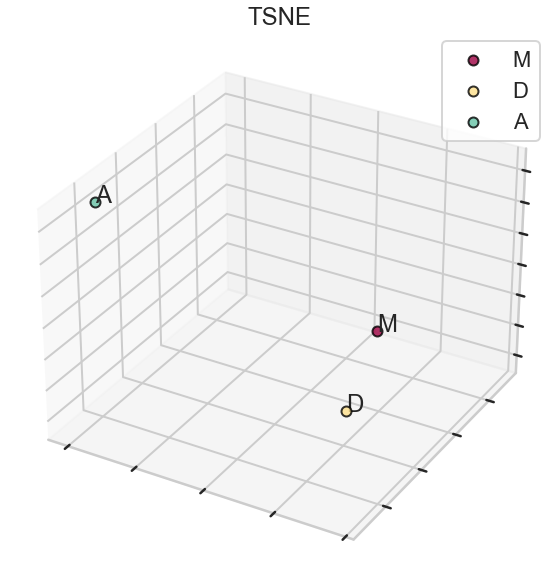

In [124]:
plot_vectors(TSNE_df.to_numpy(), title = "TSNE",labels = TSNE_df.index ,dimensions=2, text=True)
plot_vectors(TSNE_df.to_numpy(), title = "TSNE",labels = TSNE_df.index ,dimensions=3, text=True)

The above Graph represent the 3 different type of recepite based on a label (A,M,D). We can observe that are pretty much different among them following an Document aspect.

Just A and M are closer among them. This is resonable given the same ingredients ofter used in both.

# Topic modelling

We now analyse the topic inside 

### Topic model

In [125]:
instances = gen_word_em_li #recall in a different object
print("creating dictionary", flush=True)

phrases = Phrases(instances, min_count=10, threshold=1) #min count 10, The recepites aren't a lot 
instances_colloc = phrases[instances]

dictionary = Dictionary(instances_colloc)
# get rid of words that are too rare or too frequent
dictionary.filter_extremes(no_below=5, no_above=0.3)
print(dictionary, flush=True)

creating dictionary
Dictionary(1210 unique tokens: ['bay', 'boneless', 'cardamom', 'chicken', 'chili_powder']...)


In [126]:
#replace words by their numerical IDs and their frequency
print("translating corpus to IDs", flush=True)
ldacorpus = [dictionary.doc2bow(text) for text in instances]
# learn TFIDF values from corpus
print("tf-idf transformation", flush=True)
tfidfmodel = TfidfModel(ldacorpus)
# transform raw frequencies into TFIDF
model_corpus = tfidfmodel[ldacorpus]

translating corpus to IDs
tf-idf transformation


In [127]:
coherence_values = []

for num_topics in range(5 ,16): #from min 5 to max 15 in order to be compact
    model = LdaMulticore(corpus=model_corpus, # we use all the data
                         id2word=dictionary, 
                         num_topics=num_topics)

    coherencemodel_umass = CoherenceModel(model=model, 
                                          texts=instances, 
                                          dictionary=dictionary, 
                                          coherence='u_mass') #Umass score

    coherencemodel_cv = CoherenceModel(model=model, 
                                       texts=instances, 
                                       dictionary=dictionary, 
                                       coherence='c_v') #CV score

    umass_score = coherencemodel_umass.get_coherence()
    cv_score = coherencemodel_cv.get_coherence()
    
    print(num_topics, umass_score, cv_score)
    coherence_values.append((num_topics, umass_score, cv_score))

5 -1.8749654504865618 0.3072890132463355
6 -1.8870828888247797 0.29405462607294114
7 -2.1184909043885796 0.28202965339656444
8 -1.8818539503918512 0.3162984643649308
9 -2.0573264200771715 0.27660729816131946
10 -1.991489406389411 0.29077892789803633
11 -1.970524789886969 0.2862493845792915
12 -1.9162788723742006 0.29065339068950524
13 -1.9373941041372096 0.311808650329619
14 -1.9038897108567172 0.3267127667463659
15 -1.9571344871919196 0.2893061217189258


In [128]:
coherence = pd.DataFrame(np.array(coherence_values).reshape(len(coherence_values),3), columns=["Num_topics","Umass","Cv"])
coherence.Num_topics = coherence.Num_topics.astype("int16")
coherence = coherence.set_index("Num_topics")

In [129]:
#used to identified the max and min values
max_value = coherence.idxmax()
min_value = coherence.idxmin()
min_Umass = coherence.min()[0]
max_CV = coherence.max()[1]

In [130]:
print ("The max value for"+ color.BOLD+' CV '+color.END+f"score is:\t\t{max_value[1]}")
print ("The min value for"+ color.BOLD+' Umass '+color.END+f"score is:\t{min_value[0]}")

The max value for CV score is:		14
The min value for Umass score is:	7


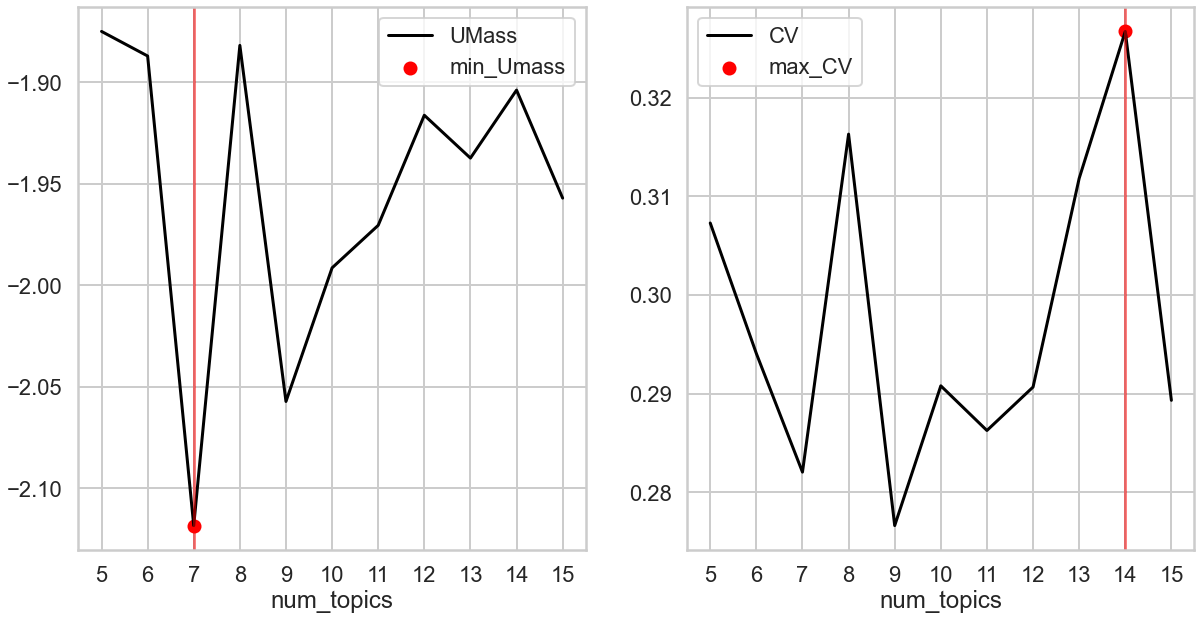

In [131]:
scores = pd.DataFrame(coherence_values, columns=['num_topics', 'UMass', 'CV'])
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
scores.plot.line(x='num_topics', y='UMass', ax=ax[0], xticks=range(4,20), color = "black" );
ax[0].scatter(min_value[0], min_Umass, color = "red", label= "min_Umass")
ax[0].axvline(min_value[0], color= "red", alpha= 0.5)
ax[0].legend()
scores.plot.line(x='num_topics', y='CV', ax=ax[1], xticks=range(4,20), color = "black");
ax[1].scatter(max_value[1], max_CV, color = "red", label= "max_CV")
ax[1].axvline(max_value[1], color= "red", alpha= 0.5)
ax[1].legend();

Usually the number of optimal topics fall between 5 and 8.

But we chose 6 in order to be compact and direct.

In [132]:
scores.corr()

num_topics     UMass        CV
num_topics    1.000000  0.032493  0.169238
UMass         0.032493  1.000000  0.700053
CV            0.169238  0.700053  1.000000

In [133]:
num_topics = 6 #based n the previous scores

# find chunksize to make about 200 updates
num_passes = 10
chunk_size = len(model_corpus) * num_passes/200
print(chunk_size)

start = time.time()
print("fitting model", flush=True)
model = LdaMulticore(num_topics=num_topics, # number of topics
                     corpus=model_corpus, # what to train on 
                     id2word=dictionary, # mapping from IDs to words
                     workers=min(10, multiprocessing.cpu_count()-1), # choose 10 cores, or whatever computer has
                     passes=num_passes, # make this many passes over data
                     chunksize=chunk_size, # update after this many instances
                     alpha=0.5
                    )
    
print("done in {}".format(time.time()-start), flush=True)

300.75
fitting model
done in 6.84937596321106


In [134]:
topic_corpus = model[model_corpus]

In [135]:
# get the topic descriptions
topic_sep = re.compile("0\.[0-9]{3}\*") # getting rid of useless formatting
# extract a list of tuples with topic number and descriptors from the model
model_topics = [(topic_no, re.sub(topic_sep, '', model_topic).split(' + ')) 
                for topic_no, model_topic in
                model.print_topics(num_topics=num_topics, num_words=4)]

descriptors = []
for i, m in model_topics:
    print(i+1, ", ".join(m[:4]))
    descriptors.append(", ".join(m[:2]).replace('"', ''))

1 "clove", "oil", "pepper", "garlic"
2 "cream", "soup", "mix", "box"
3 "cheese", "onion", "pepper", "sausage"
4 "none", "water", "lemon", "cracker"
5 "sugar", "flour", "vanilla", "egg"
6 "ground", "beef", "onion", "sauce"


In [136]:
descriptors

['clove, oil',
 'cream, soup',
 'cheese, onion',
 'none, water',
 'sugar, flour',
 'ground, beef']

In [137]:
limit = 30 #in order to be compact. In fact the incresing 
target_category = 'label'

# get a list with the topic scores for each document
scores = [[t[1] for t in topic_corpus[entry]] for entry in range(limit)]

# turn that into a data frame with N rows and K columns, 
# each with the score of the corresponding topic
topic_distros = pd.DataFrame(data=scores, columns=descriptors)

# add the review category of each document as column (so we can aggregate)
topic_distros['category'] = df[target_category][:limit]

In [138]:
topic_distros.head()

clove, oil  cream, soup  cheese, onion  none, water  sugar, flour  \
0    0.443692     0.075798       0.084779     0.077082      0.074340   
1    0.089488     0.192667       0.314983     0.094814      0.217367   
2    0.085418     0.100847       0.103133     0.098149      0.513293   
3    0.128417     0.111842       0.129525     0.401734      0.108632   
4    0.353048     0.097322       0.218283     0.139671      0.092876   

   ground, beef category  
0      0.244308        M  
1      0.090681        D  
2      0.099160        D  
3      0.119850        M  
4      0.098799        M

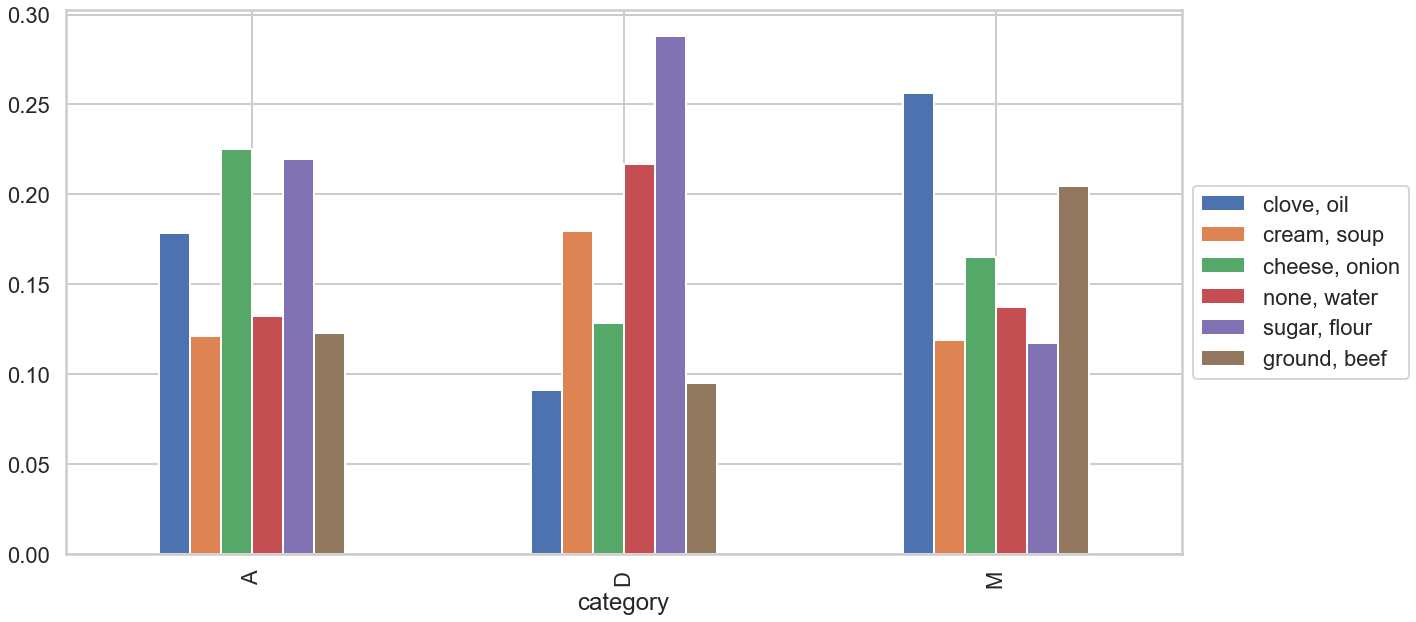

In [139]:
sns.set_context('poster') # use large font
fig, ax = plt.subplots(figsize=(20, 10)) # set graph size

# aggregate topics by categories
aggregate_by_category = topic_distros[topic_distros.category.isin(list(set(only_label_ingedients["label"])))]
aggregate_by_category = aggregate_by_category.groupby(aggregate_by_category.category).mean()

# plot the graph
aggregate_by_category[descriptors].plot.bar(ax=ax);

# move the legend out
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));

The above results seem to be very coherent with the different labels (A,M,D). 

# Language Model 

With Language Model We want to generate entire recepites calculating the probability of one word based on:
* 2 previous words
* 3 previous words
* 6 previous words

In [140]:
#function used to trasform into strings
def string_comma (li):
    a = ". ".join(li)
    return a

In [141]:
#the different datasets for each label based on the directions
A_dir = df[df["label"]=="A"].loc[:,("directions_struct_pred")].reset_index(drop=True).apply(string_comma)
M_dir = df[df["label"]=="M"].loc[:,("directions_struct_pred")].reset_index(drop=True).apply(string_comma)
D_dir = df[df["label"]=="D"].loc[:,("directions_struct_pred")].reset_index(drop=True).apply(string_comma)
gen_dir = df.loc[:,("directions_struct_pred")].apply(string_comma)

In [142]:
#in order to measure the value with the function __sentence_logP__
Sentence_trial = "cut the meat. put the salt on the meat. cook the meat with oil.".split()

### Probability given 2 words A,M,D

In [143]:
"""
We are now building a sort of chain.  
"""
# define smoothing and special tokens
smoothing = 0.0001 #essential to smooth and avoiding that a sentence obtain 0 given a word which have 0 probability
START = '_***_'
STOP = '_STOP_'

# P(w|u,v): map from (u, v) to w to allow marginalizing
counts3_A = defaultdict(lambda: defaultdict(lambda: smoothing)) 
counts3_M = defaultdict(lambda: defaultdict(lambda: smoothing)) 
counts3_D = defaultdict(lambda: defaultdict(lambda: smoothing)) 

corpus3_A = [line.split() for line in A_dir] 
corpus3_M = [line.split() for line in M_dir]
corpus3_D = [line.split() for line in D_dir]

"""
A
"""
for sentence in corpus3_A:
    # include special tokens for start and the end of sentence
    tokens = [START, START] + sentence + [STOP]
    
    for u, v, w in nltk.ngrams(tokens, 3): #3 words
        counts3_A[(u, v)][w] += 1 
        
"""
M
"""
for sentence in corpus3_M:
    # include special tokens for start and the end of sentence
    tokens = [START, START] + sentence + [STOP]
    
    for u, v, w in nltk.ngrams(tokens, 3): #3 words
        counts3_M[(u, v)][w] += 1 
        
"""
D
"""
for sentence in corpus3_D:
    # include special tokens for start and the end of sentence
    tokens = [START, START] + sentence + [STOP]
    
    for u, v, w in nltk.ngrams(tokens, 3): #3 words
        counts3_D[(u, v)][w] += 1
        

#______________________________________________________________________________#


def logP3(u, v, w, count_type):
    """
    compute the log probability of a trigram
    (u,v,w) => P(w|u,v) = c(u,v,w) / SUM(c(u,v,*))
    """
    return np.log(count_type[(u, v)][w]) - np.log(sum(count_type[(u, v)].values()))

def sentence_logP3(S, count_type):
    """
    score a sentence in log likelihood with chain rule
    """
    tokens = [START, START] + S + [STOP]
    return sum([logP3(u, v, w, count_type) for u, v, w in nltk.ngrams(tokens, 3)])

In [144]:
sentence_logP3(Sentence_trial,counts3_A)

-106.52902040620666

In [145]:
sentence_logP3(Sentence_trial,counts3_M)

-82.11617396158475

In [146]:
sentence_logP3(Sentence_trial,counts3_D)

-92.23612615549834

### Generation given 2 words

In [147]:
def sample_next_word_2(u, v, count_type):
    """
    sample a word w based on the history (u, v)
    """
    # separate word and their counts into separate variables
    keys, values = zip(*count_type[(u, v)].items())
    
    # normalize the counts into a probability distribution
    values = np.array(values)
    values /= values.sum() # create probability distro
    
    # this is the meat of the function
    sample = np.random.multinomial(1, values) # pick one position
    
    return keys[np.argmax(sample)]


def generate_2(count_type):
    """
    generate a new sentence
    """
    
    # start with special tokens
    result = [START, START]
    # sample the first word
    next_word = sample_next_word_2(result[-2], result[-1], count_type )
    result.append(next_word)
    # repeat until you draw a stop token
    while next_word != STOP:
        next_word = sample_next_word_2(result[-2], result[-1], count_type)
        result.append(next_word)
    
    return ' '.join(result[2:-1])


In [148]:
generate_2(counts3_A) #The generation for A

'chop spam onion and potato chips. bake 50 minutes or until noodles are heated through. gently stir to combine. roast for 25 minutes at 350\\u00b0 for 35 to 45 seconds. drain and top with the remaining dumplings serve immediately'

In [149]:
generate_2(counts3_M)#The generation for M

'simmer for about 5 minutes before serving will allow the steaks and serve with side of the fish into the pot (and any accumulated juices over medium heat. add cumin seeds or any very thinly sliced meat back into oven discard all but 1 tablespoon of oil. cook on low heat 10 to 15 minutes to 1 month'

In [150]:
generate_2(counts3_D)#The generation for D

'combine sugar flour and fat together until smooth. pour yogurt mixture layer on a platter and serve with sliced almonds and combine until no dry flour remains. grease 5 3x6 loaf pans whisk 1 min. or until toothpick inserted into the bottom and half for an additional 5 to 7 minutes more. *cooks note: do not stir!. heat to medium , boil until the flavors develop at least 4 hours or until the sauce thickens and coats the back of the tannic skin. repeat with the parchment and coat real well. press mixture onto pork chops. cover and refrigerate until somewhat firm. spread each biscuit into quarters. arrange 2 crepes on a floured mixing bowl beat egg whites are stiff. beat egg yolks until they are non-stick i dont think youre supposed tobut i do this sparingly or it will be very thick. bake cakes divide batter into pan. bake for 8 to 10 servings. make crust and rim of pan with pam. in either a double boiler melt chocolate and stir until combined beat in the flour baking powder soda salt and

### Probability given 3 words

In [151]:

"""
We are now building a sort of chain.  
"""
# define smoothing and special tokens
smoothing = 0.0001 #essential to smooth and avoiding that a sentence obtain 0 given a word which have 0 probability but we fix
                   # a small value in order to not influence much the entire sentence
START = '_***_'
STOP = '_STOP_'

# P(z|u,v,w): map from (u, v, w) to z to allow marginalizing
counts4_A = defaultdict(lambda: defaultdict(lambda: smoothing)) 
counts4_M = defaultdict(lambda: defaultdict(lambda: smoothing)) 
counts4_D = defaultdict(lambda: defaultdict(lambda: smoothing)) 

# fit data on corpus
corpus4_A = [line.split() for line in A_dir] 
corpus4_M = [line.split() for line in M_dir]
corpus4_D = [line.split() for line in D_dir]

# collect counts for MLE as measure
     
"""
A
"""
for sentence in corpus4_A:
    
    tokens = [START, START,START] + sentence + [STOP]
    
    for u, v, w, z in nltk.ngrams(tokens, 4): 
        counts4_A[(u, v, w)][z] += 1 
        
"""
M
"""
for sentence in corpus4_M:
    
    tokens = [START, START,START] + sentence + [STOP]
    
    for u, v, w, z in nltk.ngrams(tokens, 4): 
        counts4_M[(u, v, w)][z] += 1
        
"""
D
"""
for sentence in corpus4_D:
    
    tokens = [START, START,START] + sentence + [STOP]
    
    for u, v, w, z in nltk.ngrams(tokens, 4): 
        counts4_D[(u, v, w)][z] += 1 

        
#_______________________________________________________________________#

def logP4(u, v, w, z, count_type):
    """
    (u,v,w,z) => P(z|u,v,w) = c(u,v,w,z) / SUM(c(u,v,w,*))
    """
    return np.log(count_type[(u, v, w)][z]) - np.log(sum(count_type[(u, v, w)].values()))

def sentence_logP4(S,count_type):
    """
    score a sentence in log likelihood with chain rule
    S: list(str)
    """
    tokens = [START, START, START] + S + [STOP]
    return sum([logP4(u, v, w, z, count_type) for u, v, w, z in nltk.ngrams(tokens, 4)])


In [152]:
sentence_logP4(Sentence_trial,counts4_A)

-25.880934481887927

In [153]:
sentence_logP4(Sentence_trial,counts4_M)

-85.99137587806977

In [154]:
sentence_logP4(Sentence_trial,counts4_D)

-16.695446305899686

### Generation given 3 words

In [155]:
def sample_next_word_3(u, v, w, count_type):
    """
    sample a word z based on the history (u, v, w)
    """
    # separate word and their counts into separate variables
    keys, values = zip(*count_type[(u, v, w)].items())
    
    # normalize the counts into a probability distribution
    values = np.array(values)
    values /= values.sum() # create probability distro
    
    # this is the meat of the function
    sample = np.random.multinomial(1, values) # pick one position
    
    return keys[np.argmax(sample)]


def generate_3(count_type):
    """
    generate a new sentence
    """
    # start with special tokens
    result = [START, START, START]
    # sample the first word
    next_word = sample_next_word_3(result[-3], result[-2], result[-1], count_type)
    result.append(next_word)
    # repeat until you draw a stop token
    while next_word != STOP:
        next_word = sample_next_word_3(result[-3], result[-2], result[-1], count_type)
        result.append(next_word)
    
    return ' '.join(result[3:-1])


In [156]:
generate_3(counts4_A) #The generation for A

'cut cheese into 3/4 inch cubes this is easy if the cheese is melted and begins to thicken about 3 minutes remove and let cool. serve warm or cool'

In [157]:
generate_3(counts4_M) #The generation for M

'saute onion in butter till tender. add in rice and stir until well combined'

In [158]:
generate_3(counts4_D) #The generation for D

'mix together the butter 1/2 cup of puree) set aside until you see it begin to foam your yeast is alive so proceed. add the remaining 2 tablespoons sugar and continue cooking for 1-2 minutes place a small square of milk chocolate bar on each. remove cookies from cookie sheets , press pecan half into each shortcake'

### Probability given 6 words

In [159]:

"""
We are now building a sort of chain.  
"""
# define smoothing and special tokens
smoothing = 0.0001 #essential to smooth and avoiding that a sentence obtain 0 given a word which have 0 probability but we fix
                   # a small value in order to not influence much the entire sentence
START = '_***_'
STOP = '_STOP_'

# P(z|u,v,w,a,b,c): map from (u, v, w, a, b ,c) to z to allow marginalizing
counts7_A = defaultdict(lambda: defaultdict(lambda: smoothing)) 
counts7_M = defaultdict(lambda: defaultdict(lambda: smoothing)) 
counts7_D = defaultdict(lambda: defaultdict(lambda: smoothing)) 

# fit data on corpus
corpus7_A = [line.split() for line in A_dir] 
corpus7_M = [line.split() for line in M_dir]
corpus7_D = [line.split() for line in D_dir]

# collect counts for MLE as measure
"""
A
"""
for sentence in corpus7_A:
    
    tokens = [START, START,START,START, START,START] + sentence + [STOP]
    
    for u, v, w, a, b, c, z in nltk.ngrams(tokens, 7): 
        counts7_A[(u, v, w, a, b, c)][z] += 1 
        
"""
M
"""
for sentence in corpus7_M:
    
    tokens = [START, START,START,START, START,START] + sentence + [STOP]
    
    for u, v, w, a, b, c, z in nltk.ngrams(tokens, 7): 
        counts7_M[(u, v, w, a, b, c)][z] += 1 
        
"""
D
"""
for sentence in corpus7_D:
    
    tokens = [START, START,START,START, START,START] + sentence + [STOP]
    
    for u, v, w, a, b, c, z in nltk.ngrams(tokens, 7): 
        counts7_D[(u, v, w, a, b, c)][z] += 1 
#_____________________________________________________________________________

def logP7(u, v, w, a, b, c, z, count_type):
    """
    (u,v,w,z) => P(z|u, v, w, a, b, c) = c(u, v, w, a, b, c, z) / SUM(c(u, v, w, a, b, c, *))
    """
    return np.log(count_type[(u, v, w, a, b, c)][z]) - np.log(sum(count_type[(u, v, w, a, b, c)].values()))

def sentence_logP7(S,count_type):
    """
    score a sentence in log likelihood with chain rule
    S: list(str)
    """
    tokens = [START, START,START,START, START,START] + S + [STOP]
    return sum([logP7(u, v, w, a, b, c, z,count_type) for u, v, w, a, b, c, z in nltk.ngrams(tokens, 7)])


In [160]:
sentence_logP7(Sentence_trial,counts7_A)

-16.670394129909077

In [161]:
sentence_logP7(Sentence_trial,counts7_M)

-17.04050201827837

In [162]:
sentence_logP7(Sentence_trial,counts7_D)

-16.695446305899686

#### Generation given 6 words

In [163]:
def sample_next_word_6(u, v, w, a, b, c, count_type):
    """
    sample a word z based on the history (u, v, w, a, b, c)
    """
    # separate word and their counts into separate variables
    keys, values = zip(*count_type[(u, v, w, a, b, c)].items())
    
    # normalize the counts into a probability distribution
    values = np.array(values)
    values /= values.sum() # create probability distro
    
    # this is the meat of the function
    sample = np.random.multinomial(1, values) # pick one position
    
    return keys[np.argmax(sample)]


def generate_6(count_type):
    """
    generate a new sentence
    """
    # start with special tokens
    result = [START, START, START,START, START, START]
    # sample the first word
    next_word = sample_next_word_6(result[-6], result[-5], result[-4],result[-3], result[-2], result[-1], count_type)
    result.append(next_word)
    # repeat until you draw a stop token
    while next_word != STOP:
        next_word = sample_next_word_6(result[-6], result[-5], result[-4],result[-3], result[-2], result[-1], count_type)
        result.append(next_word)
    
    return ' '.join(result[6:-1])


In [164]:
generate_6(counts7_A) #The generation for A

'toast the fennel seeds in a small saute pan over medium heat shaking a few times for even toasting until they become aromatic and start to brown slightly. be careful that they dont burn. let cool slightly then pulse a couple of times in a spice grinder or clean coffee grinder just until the fennel is broken up a bit. transfer to a small bowl and let cool once cool add remaining oil and mix to combine add remaining ingredients and toss to combine. serve eggplants topped with tomato mixture season'

In [165]:
generate_6(counts7_M) #The generation for M

'wash the rice and keep it aside. in a vessel add 2cups of water and bring it to a boil. put your fish on a heat safe plate that fits inside of the wok or saucepan. carefully place your plate with the fish on the rack. cover and steam for about 10 minutes. you can check it for done-ness by using a butter knife. if it easily cuts through to the bottom of the plate your fish is done!. turn off the heat. carefully remove the plate from the pot and drain any remaining water off. at this point you can also transfer the fish to a nice serving plate. spread the cilantro and about one third of the scallion (use the green portions) directly onto the steamed fish. heat a small saucepan to medium to high heat and add the canola oil. add the ginger and let it brown lightly about a minute. then add the rest of the scallions. the mixture should be giving a good sizzle right about now. next add your soy mixture to the saucepan and keep the heat on high to keep everything sizzling. cook until the scal

In [166]:
generate_6(counts7_D) #The generation for D

'cook pasta according to package directions. dont forget to salt the water. drain well. while pasta is cooking place olive oil and garlic in a small fry pan. bring to moderate heat stirring garlic frequently to prevent browning. add pinenuts and saute stirring frequently until nuts are firm but tender. toss cooked pasta with pinenut/garlic mixture. gently stir in basil pesto until pasta is lightly coated. add tomatoes grated parmesan and feta cheese. toss lightly and serve warm or at room temperature. there are no measurements for these ingredients because it is all a matter of individual taste'

## Clustering and Topic

The object in this part is to firstly implement a generic laten topic for each label __(A,M,D)__. Then We try to cluster inside each label and create a topic for each cluster inside. 

In [167]:
import numpy as np
def show_topics(A, vocabulary, topn=5):
    """
    find the top N words for each of the latent dimensions (=rows) in a matrix
    """
    topic_words = ([[vocabulary[i] for i in np.argsort(t)[:-topn-1:-1]]
                    for t in A])
    return [', '.join(t) for t in topic_words]


In [168]:
def merge_list (li_li):
    original = []
    for li in li_li:
        a= " ".join(li)
        
        original.append(a)
    
    return original

In [169]:
A_topic = merge_list(clean_space(A_word_em_li))
M_topic = merge_list(clean_space(M_word_em_li))
D_topic = merge_list(clean_space(D_word_em_li))
gen_topic = merge_list(clean_space(gen_word_em_li))

### A

### General topic A

In [170]:
tfidf_vectorizer_A = TfidfVectorizer(ngram_range=(1,2), # unigram and biagram  
                                   analyzer='word', 
                                   min_df=0.001, 
                                   max_df=0.7, 
                                   sublinear_tf=True, 
                                   use_idf=True)

X_A = tfidf_vectorizer_A.fit_transform(A_topic) #only for A

In [171]:
# set number of latent components for the general of A
k = 6

svd_A = TruncatedSVD(n_components = k) #k latent concepts
U_A = svd_A.fit_transform(X_A) #lower dimension
S_A = svd_A.singular_values_ #k*k digonal matrix
V_A = svd_A.components_ #latent concepts

In [172]:
nmf_A = NMF(n_components = k, init='nndsvd', random_state=0)
# nndsvd = non negative double singular value decomposition  

W_A = nmf_A.fit_transform(X_A)
H_A = nmf_A.components_

In [173]:
terms_A = tfidf_vectorizer_A.get_feature_names()
show_topics(V_A, terms_A)
#Laten Topics for A_type with SVD

['pepper, salt, oil, onion, cheese',
 'flour, egg, sugar, milk, butter',
 'cheese, cream, cream cheese, slice, cheddar',
 'lemon, juice, lemon juice, cream, cream cheese',
 'slice, vinegar, sugar, cheese, wine vinegar',
 'chicken, sauce, cream, celery, onion']

In [174]:
show_topics(H_A, terms_A)
#Latent topics for A_type with NMF

['clove, garlic, oil, ground, tomato',
 'flour, sugar, egg, purpose, water',
 'cheese, cream, cream cheese, slice, cheddar',
 'lemon, juice, lemon juice, juice salt, oil lemon',
 'vinegar, oil, wine, wine vinegar, sauce',
 'pepper, salt pepper, onion, potato, chicken']

We choose 6 latent topics to show in order to be compact

### Cluster and topic together A

In [175]:
tfidf_vectorizer_A = TfidfVectorizer(ngram_range=(1,1), # only 1 word 
                                   analyzer='word', 
                                   min_df=0.001, 
                                   max_df=0.7, 
                                   sublinear_tf=True, 
                                   use_idf=True)

X_A = tfidf_vectorizer_A.fit_transform(A_topic) #only for A

In [176]:
from sklearn.cluster import KMeans, AgglomerativeClustering

k = 5 #reasonable number of cluster

# reduce the dimensionality of the input, to speed up clustering
X2_A = TruncatedSVD(n_components=300).fit_transform(X_A)

agg = AgglomerativeClustering(n_clusters = k) #create the clustering

In [177]:
sample = np.random.choice(len(X2_A), replace=False, size=600) #chose 600 of random choices 
agg_sample_ids = agg.fit_predict(X2_A[sample]) #prediction 

In [178]:
"""
Centroids are based on the mean of the value given we know the cluster
And help to fit the Kmeans function.
"""
centroids_A = np.array([X2_A[sample][agg_sample_ids == c].mean(axis=0) for c in range(k)]) #centroid are useful to inizialize for Kmean
print(centroids_A.shape)

(5, 300)


In [179]:
km_A = KMeans(n_clusters=k, 
            n_jobs=-1, 
            init=centroids_A) #Kmean function
km_A.fit(X2_A) #fit 

<ipython-input-179-dedaece4d52c>:4: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  km_A.fit(X2_A) #fit


KMeans(algorithm='auto', copy_x=True,
       init=array([[ 2.94051438e-01, -1.37477150e-02,  1.14478230e-01, ...,
        -4.20719221e-03,  1.09634734e-03,  1.26119345e-03],
       [ 2.00913616e-01, -2.54541004e-02,  6.15801312e-02, ...,
        -3.09241167e-03, -2.64890192e-03, -3.69264394e-03],
       [ 2.59552583e-01, -9.70431131e-02, -7.14170989e-02, ...,
         2.22779403e-03, -6.17392500e-04, -1.40614726e-04],
       [ 2.26028955e-01,  2.01465742e-01, -3.81594749e-02, ...,
        -1.82145748e-03,  1.02027343e-03,  2.23998349e-04],
       [ 2.71478002e-01,  3.16798709e-01, -1.60429356e-01, ...,
        -3.81051655e-04,  2.46198956e-03,  6.90701076e-03]]),
       max_iter=300, n_clusters=5, n_init=10, n_jobs=-1,
       precompute_distances='auto', random_state=None, tol=0.0001, verbose=0)

In [180]:
label_A = km_A.labels_.reshape(len(X2_A),1) #label 
final_A = pd.DataFrame(np.hstack((X_A.toarray(),label_A))) #entire Df
final_A.columns = tfidf_vectorizer_A.get_feature_names()+["Cluster"] #put the columns 
final_A.Cluster = final_A.Cluster.astype("int")

#### Creation of clusters and assignment of names

We now want to group based on the assigned cluster by Kmeans __(0,1,2,3,4)__.



In [181]:
clusters_A = {} #collect for the keys (0,1,2,3,4) the respective data
for clus in range(k):
    clust = final_A[final_A["Cluster"]==clus].iloc[:,:-1]
    clusters_A[clus] = np.array(clust)

We now assign at each Cluster the relative topic.

In [182]:
name_clust_A = {} 
for i in range(k):
    a = clusters_A[i]
    name = show_topics(a, tfidf_vectorizer_A.get_feature_names() ,topn=2)
    name_clust_A[i]= name[0]

In [183]:
name_clust_A

{0: 'dash, egg',
 1: 'loaf, flake',
 2: 'feta, spinach',
 3: 'yam, pie',
 4: 'gram, water'}

In [184]:
lab_A = km_A.labels_  

In [185]:
"""
Funtion to replace the number of label with the relative topic  
"""
def topic_clust(label_array,name_clust):
    my_list=[]
    for key in label_array:
        my_list.append(name_clust[key])
    
    return np.array(my_list)


In [186]:
true_name_A = topic_clust(lab_A,name_clust_A) # True name of label

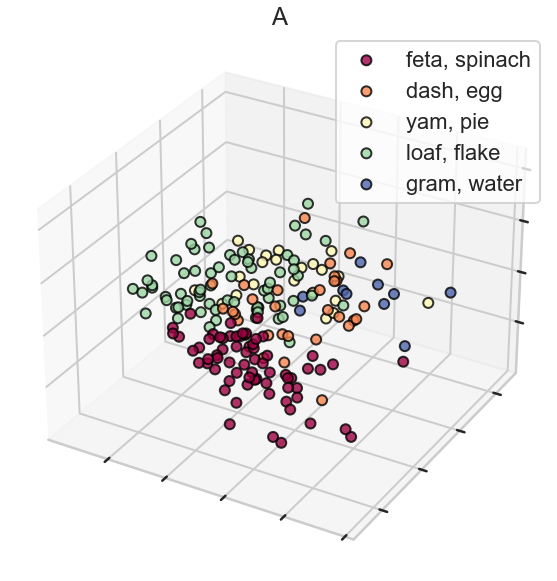

In [187]:
#plot in 3 dimension
plot_sample = np.random.choice(len(X2_A), replace=False, size=200)
plot_vectors(X2_A[plot_sample], title="A",labels=true_name_A[plot_sample])

### M 

### General topic M

In [188]:
tfidf_vectorizer_M = TfidfVectorizer(ngram_range=(1,2), # unigram and biagram
                                   analyzer='word', 
                                   min_df=0.001, 
                                   max_df=0.7, 
                                   sublinear_tf=True, 
                                   use_idf=True)

X_M = tfidf_vectorizer_M.fit_transform(M_topic)# only for M

In [189]:
# set number of latent components
k = 6

svd_M = TruncatedSVD(n_components = k) #k latent concepts
U_M = svd_M.fit_transform(X_M) #lower dimension
S_M = svd_M.singular_values_ #k*k digonal matrix
V_M = svd_M.components_ #latent concepts

In [190]:
nmf_M = NMF(n_components = k, init='nndsvd', random_state=0)
# nndsvd = non negative double singular value decomposition  

W_M = nmf_M.fit_transform(X_M)
H_M = nmf_M.components_

In [191]:
terms_M = tfidf_vectorizer_M.get_feature_names()
show_topics(V_M, terms_M)
#Laten Topic for A_type with SVD

['pepper, salt, onion, oil, ground',
 'cream, cheese, soup, milk, chicken',
 'sugar, egg, flour, milk, butter',
 'chicken, breast, chicken breast, lemon, sugar',
 'sauce, soy, soy sauce, sugar, water',
 'ground, powder, chili powder, chili, pepper']

In [192]:
show_topics(H_M, terms_M)
#Latent topic for A_type with NMF

['oil, pepper, clove, salt, lemon',
 'soup, cream, mushroom, mushroom soup, cream mushroom',
 'flour, sugar, egg, milk, butter',
 'chicken, breast, chicken breast, skinless, skinless chicken',
 'sauce, soy, soy sauce, ginger, sesame',
 'cheese, ground, beef, tomato, ground beef']

We choose 6 latent topics to show in order to be compact 

### Cluster and topic together M 

In [193]:
tfidf_vectorizer_M = TfidfVectorizer(ngram_range=(1,1), #only unigram  
                                   analyzer='word', 
                                   min_df=0.001, 
                                   max_df=0.7, 
                                   sublinear_tf=True, 
                                   use_idf=True)

X_M = tfidf_vectorizer_M.fit_transform(M_topic) #only for M

In [194]:
from sklearn.cluster import KMeans, AgglomerativeClustering

k = 5 #reasonable number of cluster

# reduce the dimensionality of the input, to speed up clustering
X2_M = TruncatedSVD(n_components=300).fit_transform(X_M)

agg = AgglomerativeClustering(n_clusters = k)

In [195]:
sample = np.random.choice(len(X2_M), replace=False, size=600)
agg_sample_ids = agg.fit_predict(X2_M[sample]) #prediction

In [196]:
"""
Centroids are based on the mean of the value given we know the cluster
And help to fit the Kmeans function.
"""
centroids_M = np.array([X2_M[sample][agg_sample_ids == c].mean(axis=0) for c in range(k)])
print(centroids_M.shape)

(5, 300)


In [197]:
km_M = KMeans(n_clusters=k, 
            n_jobs=-1, 
            init=centroids_M)
km_M.fit(X2_M) #fit 

<ipython-input-197-852fe20370d2>:4: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  km_M.fit(X2_M) #fit


KMeans(algorithm='auto', copy_x=True,
       init=array([[ 0.2624104 , -0.07994565,  0.01555791, ..., -0.00052572,
         0.00041868,  0.00066109],
       [ 0.25819475, -0.0444607 , -0.01774197, ..., -0.00062667,
         0.00080306, -0.00079343],
       [ 0.19273698,  0.17146385,  0.29353779, ..., -0.0046378 ,
        -0.00651709,  0.00795863],
       [ 0.22749131,  0.09028881,  0.02555163, ...,  0.00305991,
         0.00291375, -0.00486954],
       [ 0.24962442,  0.22708184, -0.17284478, ..., -0.00083882,
         0.00230055, -0.00657632]]),
       max_iter=300, n_clusters=5, n_init=10, n_jobs=-1,
       precompute_distances='auto', random_state=None, tol=0.0001, verbose=0)

In [198]:
label_M = km_M.labels_.reshape(len(X2_M),1)
final_M = pd.DataFrame(np.hstack((X_M.toarray(),label_M)))
final_M.columns = tfidf_vectorizer_M.get_feature_names()+["Cluster"]
final_M.Cluster = final_M.Cluster.astype("int")

#### Creation of clusters and assignment of names

We now want to group based on the assigned cluster by Kmeans __(0,1,2,3,4)__.



In [199]:
clusters_M = {}
for clus in range(k):
    clust = final_M[final_M["Cluster"]==clus].iloc[:,:-1]
    clusters_M[clus] = np.array(clust)

We now assign at each Cluster the relative topic.

In [200]:
name_clust_M = {} 
for i in range(k):
    a = clusters_M[i]
    name = show_topics(a, tfidf_vectorizer_M.get_feature_names() ,topn=2)
    name_clust_M[i]= name[0]

In [201]:
lab_M = km_M.labels_

In [202]:
"""
Funtion to replace the number of label with the relative topic  
"""
def topic_clust(label_array,name_clust):
    my_list=[]
    for key in label_array:
        my_list.append(name_clust[key])
    
    return np.array(my_list)


In [203]:
true_name_M = topic_clust(lab_M,name_clust_M)# True name of label

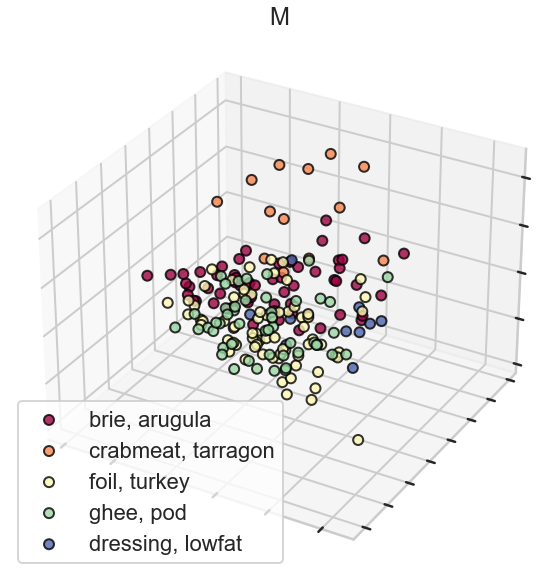

In [204]:
#plot in 3 dimension
plot_sample = np.random.choice(len(X2_M), replace=False, size=200)
plot_vectors(X2_M[plot_sample], title="M",labels=true_name_M[plot_sample])

### General Topic D

In [205]:
tfidf_vectorizer_D = TfidfVectorizer(ngram_range=(1,2), # unigram and biagram
                                   analyzer='word', 
                                   min_df=0.001, 
                                   max_df=0.7, 
                                   sublinear_tf=True, 
                                   use_idf=True)

X_D = tfidf_vectorizer_D.fit_transform(D_topic)#only for D

In [206]:
# set number of latent components
k = 6

svd_D = TruncatedSVD(n_components = k) #k latent concepts
U_D = svd_D.fit_transform(X_D) #lower dimension
S_D = svd_D.singular_values_ #k*k digonal matrix
V_D = svd_D.components_ #latent concepts

In [207]:
nmf_D = NMF(n_components = k, init='nndsvd', random_state=0)
# nndsvd = non negative double singular value decomposition  

W_D = nmf_D.fit_transform(X_D)
H_D = nmf_D.components_

In [208]:
terms_D = tfidf_vectorizer_D.get_feature_names()
show_topics(V_D, terms_D)
#Laten Topic for A_type with SVD

['sugar, egg, flour, butter, vanilla',
 'purpose, purpose flour, flour, powder, soda',
 'chocolate, chip, chocolate chip, vanilla, milk',
 'chip, chocolate, chocolate chip, milk, pepper',
 'milk, egg, mix, cake mix, cake',
 'cinnamon, butter, apple, juice, ground']

In [209]:
show_topics(H_D, terms_D)
#Latent topic for A_type with NMF

['flour, purpose, purpose flour, egg, sugar',
 'cream, cheese, cream cheese, vanilla, mix',
 'pepper, onion, oil, salt pepper, salt',
 'chocolate, chip, chocolate chip, butter, peanut',
 'milk, egg, powder, milk egg, egg milk',
 'juice, lemon, cinnamon, lemon juice, orange']

### Clustering and topic together D

In [210]:
tfidf_vectorizer_D = TfidfVectorizer(ngram_range=(1,1), #unigram
                                   analyzer='word', 
                                   min_df=0.001, 
                                   max_df=0.7, 
                                   sublinear_tf=True, 
                                   use_idf=True)

X_D = tfidf_vectorizer_D.fit_transform(D_topic) #only for D

In [211]:
from sklearn.cluster import KMeans, AgglomerativeClustering

k = 5 #reasonable number of cluster

# reduce the dimensionality of the input, to speed up clustering
X2_D = TruncatedSVD(n_components=300).fit_transform(X_D)

agg = AgglomerativeClustering(n_clusters = k)

In [212]:
sample = np.random.choice(len(X2_D), replace=False, size=600) #choose 600 of random choices
agg_sample_ids = agg.fit_predict(X2_D[sample]) #prediction

In [213]:
"""
Centroids are based on the mean of the value given we know the cluster
And help to fit the Kmeans function.
"""
centroids_D = np.array([X2_D[sample][agg_sample_ids == c].mean(axis=0) for c in range(k)])
print(centroids_D.shape)

(5, 300)


In [214]:
km_D = KMeans(n_clusters=k, 
            n_jobs=-1, 
            init=centroids_D)
km_D.fit(X2_D)#fit

<ipython-input-214-5f9049c02350>:4: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  km_D.fit(X2_D)#fit


KMeans(algorithm='auto', copy_x=True,
       init=array([[ 1.85934147e-01,  1.20552788e-01, -3.35675304e-02, ...,
         1.14103244e-03,  8.26082352e-04,  3.39819960e-04],
       [ 4.10606873e-01, -3.34389033e-02,  8.94083173e-02, ...,
         1.86123663e-03, -4.78000810e-06, -1.60262756e-03],
       [ 1.22369915e-01,  3.95924635e-02, -2.22363727e-01, ...,
        -9.92361457e-03,  4.26203281e-05,  3.99344093e-03],
       [ 2.14131860e-01,  5.43730620e-02, -1.55602264e-03, ...,
        -6.56348035e-04, -3.70507316e-03, -5.02880193e-04],
       [ 3.38664408e-01, -7.63616142e-02, -7.71308363e-02, ...,
        -2.06630903e-03,  3.19104524e-03, -4.07836720e-04]]),
       max_iter=300, n_clusters=5, n_init=10, n_jobs=-1,
       precompute_distances='auto', random_state=None, tol=0.0001, verbose=0)

In [215]:
label_D = km_D.labels_.reshape(len(X2_D),1) #label
final_D = pd.DataFrame(np.hstack((X_D.toarray(),label_D))) #entire Df
final_D.columns = tfidf_vectorizer_D.get_feature_names()+["Cluster"] #put the columns
final_D.Cluster = final_D.Cluster.astype("int")

#### Creation of clusters and assignment of names

We now want to group based on the assigned cluster by Kmeans __(0,1,2,3,4)__.



In [216]:
clusters_D = {}
for clus in range(k):
    clust = final_D[final_D["Cluster"]==clus].iloc[:,:-1]
    clusters_D[clus] = np.array(clust)

We now assign at each Cluster the relative topic.

In [217]:
name_clust_D = {} 
for i in range(k):
    a = clusters_D[i]
    name = show_topics(a, tfidf_vectorizer_D.get_feature_names() ,topn=2)
    name_clust_D[i]= name[0]


In [218]:
name_clust_D

{0: 'brickle, peach',
 1: 'use, lavender',
 2: 'kernel, cornmeal',
 3: 'gram, bread',
 4: 'loaf, maple'}

In [219]:
lab_D = km_D.labels_

In [220]:
"""
Funtion to replace the number of label with the relative topic  
"""
def topic_clust(label_array,name_clust):
    my_list=[]
    for key in label_array:
        my_list.append(name_clust[key])
    
    return np.array(my_list)


In [221]:
true_name_D = topic_clust(lab_D,name_clust_D)

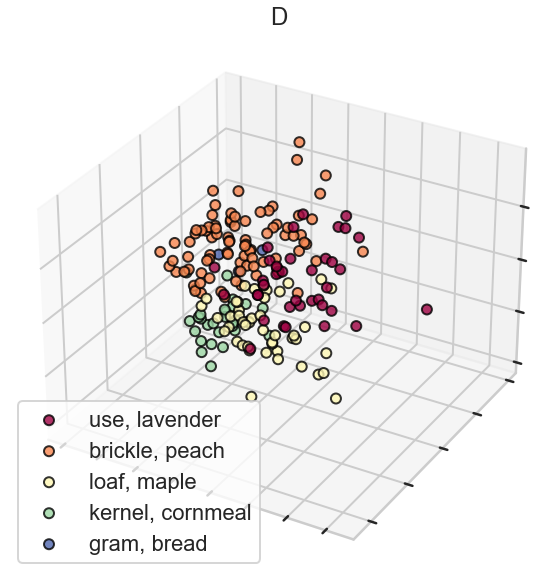

In [222]:
plot_sample = np.random.choice(len(X2_D), replace=False, size=200)
plot_vectors(X2_D[plot_sample], title="D",labels=true_name_D[plot_sample])

In [223]:
flat_dir_list = [item.split() for sublist in df.flattened_process for item in sublist]
flat_dir_list = [item for sublist in flat_dir_list for item in sublist]

punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*~''' # define punctuation to be removed
clean_flat_dir_list = []
for item in flat_dir_list:
    no_punct = ""
    for char in item:
        if char not in punctuations:
            no_punct = no_punct + char
    clean_flat_dir_list.append(no_punct)

In [224]:
directions = [i for i in clean_flat_dir_list if 'VERB' in i]
counts_dir = Counter(directions).most_common(15)
df_counts_dir = pd.DataFrame(counts_dir, columns = ['Word', 'Count'])

/Users/louislacombe/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Most Common Directions'}, xlabel='Word', ylabel='Count'>

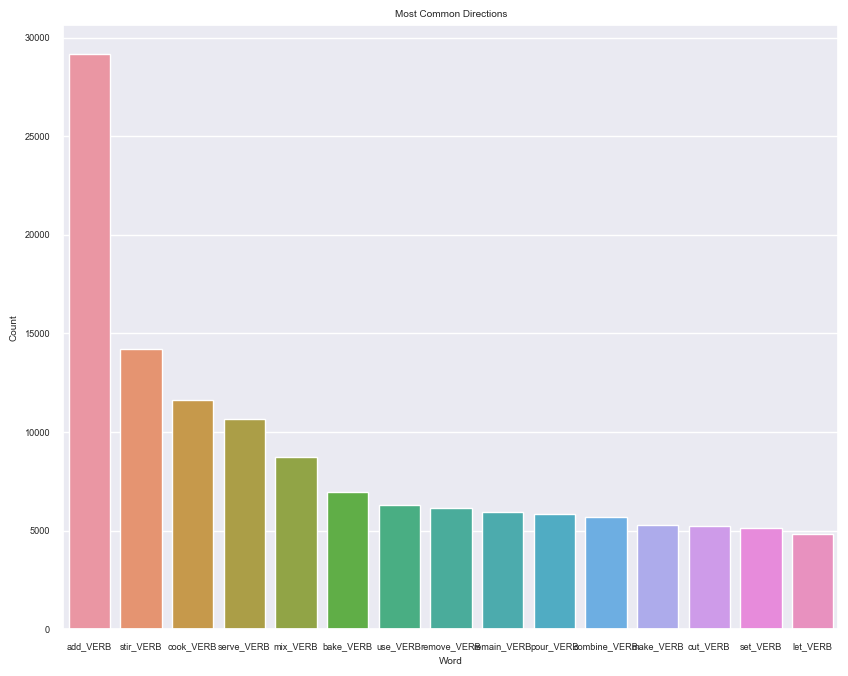

In [225]:
sns.set(font_scale = 0.6)

plt.figure(figsize=(10,8), dpi=100, facecolor='w', edgecolor='r')
plt.title("Most Common Directions")
sns.barplot(df_counts_dir['Word'],df_counts_dir['Count'])

In [226]:
# most common ingredients

ing_list = []
for ing in df.ingredients_fully_cleaned_collocations:
    ing_list.append(ing)

flat_ing_list = [item for sublist in ing_list for item in sublist]
flat_ing_list = [item.replace(',', '') for item in flat_ing_list]
flat_ing_list = [item.split() for item in flat_ing_list]
flat_ing_list = [item for sublist in flat_ing_list for item in sublist]

counts = Counter(flat_ing_list).most_common(20)
df_counts_ing = pd.DataFrame(counts, columns = ['Word', 'Count'])

/Users/louislacombe/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Most Common Ingredients'}, xlabel='Word', ylabel='Count'>

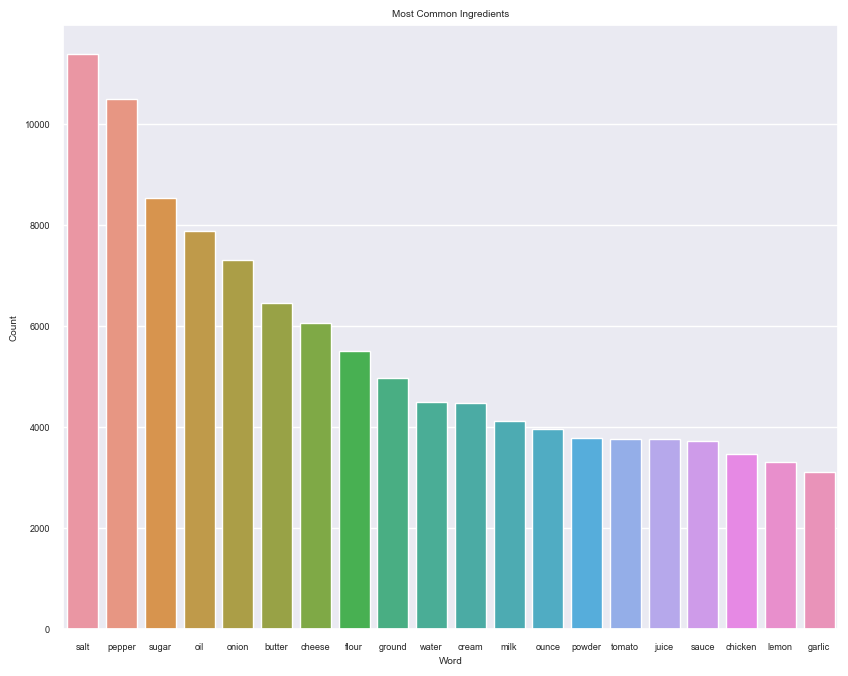

In [227]:
plt.figure(figsize=(10,8), dpi=100, facecolor='w', edgecolor='r')
plt.title("Most Common Ingredients")
sns.barplot(df_counts_ing['Word'],df_counts_ing['Count'])

## 3. Prediction (17 pts) & Visualizations (5 pts)

<a id='classification'></a>

### 3.1 Classification (9 pts)
[back to table of content](#home)

Build a predictive model of the target label and use appropriate performance metrics. Your predictive analysis needs to involve **all** of the following, summarized in a table:

1. a most-frequent-label baseline (1 pt)
2. a `LogisticRegression()` baseline with default parameters and 2-6 gram character TFIDF features (1 pt)
3. **at least** two more predictive models, including description/justification of the optmization steps taken (6 pts).
4. bootstrap sampling significance tests of the performance difference between your best model and each of the two baselines (1 pts)

NB: Do make sure that the optimization steps are done on the development split and do *not* include the test split! Training on the test set will be graded 0!

In the following we are running different classification algorithms that classify recipe's ingredients in either of our categories: Appetizer (A), Main Dish (M), or Desert (D). Each of the algorithm's hyper parameters is fine-tuned via grid-searches and its performance evaluated. In the end of the section a Bootstrap comparison is made and the accuracy on the test set of all algorithms is evaluated.

## Preprocessing of the data for the algorithms

In [228]:
df = get_data()

In [229]:
#Selecting just the labelled rows in the dataset
df_labelled = df[~df['label'].isna()]

In [230]:
# binarizing the target column (labels)
Y = label_binarize(df_labelled['label'], classes=['A', 'M', 'D']) 

### Create train, dev, test split using the <u> directions </u> column as input

In [231]:
#Splitting the dataset into TRAIN, DEVELOPMENT, TEST sets (.5,.25,.25) proportion

X_train, X_other, y_train, y_other  = train_test_split(
    df_labelled['directions_processed'], 
    Y, 
    test_size=0.5, 
    random_state=0)

X_dev, X_test, y_dev, y_test = train_test_split(
    X_other,
    y_other,
    test_size=0.5, 
    random_state=0)

print(X_train.shape, y_train.shape, X_dev.shape, y_dev.shape, X_test.shape, y_test.shape)

(3016,) (3016, 3) (1508,) (1508, 3) (1509,) (1509, 3)


In [232]:
#Vectorizing the data, we're going to be using this as input to future models

vectorizer = TfidfVectorizer(ngram_range=(1,2), 
                             min_df=0.001, 
                             max_df=0.7, 
                             analyzer='word',
                             sublinear_tf=True
                            )
X_train = vectorizer.fit_transform(X_train)
print(X_train.shape)

X_dev = vectorizer.transform(X_dev)
X_test = vectorizer.transform(X_test)
print(X_dev.shape, X_test.shape)

(3016, 7549)
(1508, 7549) (1509, 7549)


### Create train, dev, test split using the  <u> ingredients </u> column as input

In [233]:
#Splitting the dataset into TRAIN, DEVELOPMENT, TEST sets (0.5, 0.25, 0.25) proportion

X_train1, X_other1, y_train1, y_other1  = train_test_split(
    df_labelled['ingredients_fully_cleaned_collocations'].apply(lambda x : ' '.join(x)),
    Y, 
    test_size=0.5, 
    random_state=0)

X_dev1, X_test1, y_dev1, y_test1 = train_test_split(
    X_other1,
    y_other1,
    test_size=0.5, 
    random_state=0)

print(X_train1.shape, y_train1.shape, X_dev1.shape, y_dev1.shape, X_test1.shape, y_test1.shape)

(3016,) (3016, 3) (1508,) (1508, 3) (1509,) (1509, 3)


In [234]:
#Vectorizing the data, we're going to be using this as input to future models

vectorizer = TfidfVectorizer(ngram_range=(1,2), 
                             min_df=0.001, 
                             max_df=0.7, 
                             analyzer='word',
                             sublinear_tf=True
                            )
X_train1 = vectorizer.fit_transform(X_train1)
print(X_train1.shape)

X_dev1 = vectorizer.transform(X_dev1)
X_test1 = vectorizer.transform(X_test1)
print(X_dev1.shape, X_test1.shape)

(3016, 2475)
(1508, 2475) (1509, 2475)


In [235]:
#plotting function used for all classifcation algorithms

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

## (a) Logistic Regression

In [236]:
# Baseline logistic regression with no parameter tuning on DIRECTIONS column

logreg_clf = OneVsRestClassifier(LogisticRegression(random_state=0))
logreg_clf = logreg_clf.fit(X_train, y_train)
predictions_sel_logreg = logreg_clf.predict(X_dev)

print(classification_report(y_dev, predictions_sel_logreg))

              precision    recall  f1-score   support

           0       0.72      0.24      0.36       428
           1       0.77      0.73      0.75       624
           2       0.90      0.81      0.85       456

   micro avg       0.81      0.61      0.70      1508
   macro avg       0.80      0.59      0.65      1508
weighted avg       0.80      0.61      0.67      1508
 samples avg       0.61      0.61      0.61      1508



/Users/louislacombe/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [237]:
# Baseline logistic regression with no parameter tuning on INGREDIENTS column

logreg_clf_ing = OneVsRestClassifier(LogisticRegression(random_state=0))
logreg_clf_ing = logreg_clf_ing.fit(X_train1, y_train1)
predictions_sel_ing = logreg_clf_ing.predict(X_dev1)

print(classification_report(y_dev1, predictions_sel_ing))

              precision    recall  f1-score   support

           0       0.53      0.18      0.27       428
           1       0.69      0.62      0.65       624
           2       0.78      0.71      0.74       456

   micro avg       0.70      0.52      0.60      1508
   macro avg       0.67      0.51      0.56      1508
weighted avg       0.67      0.52      0.57      1508
 samples avg       0.52      0.52      0.52      1508



/Users/louislacombe/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>#### Initial Comparison
>
>It is clearly visible that the untuned logistic regression performs much better with the directions as input compared to the ingredients column as input. The accuracy of classifying a recipe as Appetizer, Main Dish, or Desert with the directions as input is at 70% whereas with using the ingredients it is only at 60%. What is also clearly visible that the precision is highes on Deserts with 90% accuracy, whereas Appetizers with only 72% accuracy seem to be much harder to classify. This might be due to appetizers and main dishes being quite similar in terms of ingredients and methods used whereas deserts are rather different. Therefore, we are finetuning the hyperparameters with the directions as input.

In [238]:
### Parameter tuning with a pipeline in order to gridsearch the best hyperparamters ### 

# set up the sequence of steps
pipe = Pipeline([
    ('selector', 'passthrough'), # feature selection
    ('classifier', OneVsRestClassifier(LogisticRegression(n_jobs=-1))) # the classifier
])

# specify selection range
param_grid = [
    {
        'selector': [SelectKBest(chi2)],
        'selector__k': [1400, 800, 500, 300],
        'classifier__estimator__penalty': ['l1', 'l2', 'elasticnet'],
        'classifier__estimator__C': np.arange(0, 2, 0.25),
        'classifier__estimator__class_weight': ['balanced', None]
    }
]

# fit the model to different feature sets
grid_lr = GridSearchCV(pipe, 
                    param_grid=param_grid, 
                    cv=5, 
                    scoring='f1_micro',
                    n_jobs=-1,
                   )
grid_lr.fit(X_train, y_train)
print(grid_lr.best_params_['selector'])

# save the best selector
selector_lr = grid_lr.best_params_['selector'].fit(X_train, y_train)
X_train_sel = selector_lr.transform(X_train)
X_dev_sel = selector_lr.transform(X_dev)
X_test_sel = selector_lr.transform(X_test)

grid_lr.fit(X_train_sel, y_train)
predictions_sel = grid_lr.predict(X_dev_sel)
print(classification_report(y_dev, predictions_sel))

SelectKBest(k=1400, score_func=<function chi2 at 0x7feaaf139310>)
              precision    recall  f1-score   support

           0       0.52      0.70      0.60       428
           1       0.74      0.80      0.77       624
           2       0.83      0.91      0.87       456

   micro avg       0.69      0.81      0.75      1508
   macro avg       0.70      0.81      0.75      1508
weighted avg       0.70      0.81      0.75      1508
 samples avg       0.72      0.81      0.75      1508



/Users/louislacombe/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [239]:
print('best estimator parameters:', '\n', '\n',
      grid_lr.best_estimator_, '\n', '\n', 
      'best accuracy score:','\n', '\n',
      grid_lr.best_score_)

best estimator parameters: 
 
 Pipeline(memory=None,
         steps=[('selector',
                 SelectKBest(k=1400,
                             score_func=<function chi2 at 0x7feaaf139310>)),
                ('classifier',
                 OneVsRestClassifier(estimator=LogisticRegression(C=1.75,
                                                                  class_weight='balanced',
                                                                  dual=False,
                                                                  fit_intercept=True,
                                                                  intercept_scaling=1,
                                                                  l1_ratio=None,
                                                                  max_iter=100,
                                                                  multi_class='auto',
                                                                  n_jobs=-1,
                                 

<module 'matplotlib.pyplot' from '/Users/louislacombe/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

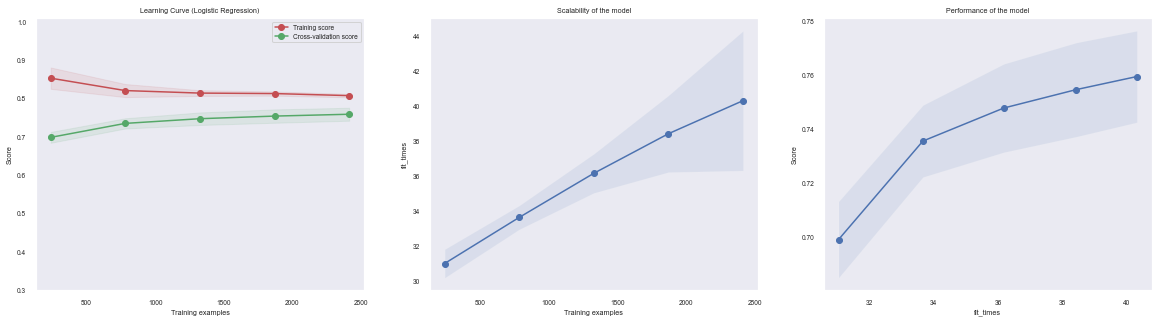

In [242]:
plot_learning_curve(grid_lr, 'Learning Curve (Logistic Regression)', 
                    X_train_sel, 
                    y_train,
                    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0),
                    n_jobs=-1,
                    ylim=(0.3, 1.01))

## (b) Dummy Classifier

In [243]:
# The dummy classifier needs slightly different input thus we are creating new splits

#Splitting the DIRECTIONS dataset into TRAIN, DEVELOPMENT, TEST sets (.5,.25,.25) proportion

X_train_not_lin, X_other_not_lin, y_train_not_lin, y_other_not_lin  = train_test_split(
    df_labelled['directions_processed'], 
    df_labelled['label'], 
    test_size=0.5, 
    random_state=0)

X_dev_not_lin, X_test_not_lin, y_dev_not_lin, y_test_not_lin = train_test_split(
    X_other_not_lin,
    y_other_not_lin,
    test_size=0.5, 
    random_state=0)


#Splitting the INGREDIENTS dataset into TRAIN, DEVELOPMENT, TEST sets (.5,.25,.25) proportion

X_train1_not_lin, X_other1_not_lin, y_train1_not_lin, y_other1_not_lin  = train_test_split(
    df_labelled['ingredients_fully_cleaned_collocations'].apply(lambda x : ' '.join(x)),
    df_labelled['label'], 
    test_size=0.5, 
    random_state=0)

X_dev1_not_lin, X_test1_not_lin, y_dev1_not_lin, y_test1_not_lin = train_test_split(
    X_other1_not_lin,
    y_other1_not_lin,
    test_size=0.5, 
    random_state=0)

In [244]:
# Using dummy classifier as baseline on DIRECTIONS

# find the most frequent class in the training data
clf_dummy = DummyClassifier(strategy='most_frequent')
clf_dummy.fit(X_train_not_lin, y_train_not_lin)

# get the performance on the development set
dumb_predictions = clf_dummy.predict(X_dev_not_lin)

print(classification_report(y_dev_not_lin, dumb_predictions))

              precision    recall  f1-score   support

           A       0.00      0.00      0.00       428
           D       0.00      0.00      0.00       456
           M       0.41      1.00      0.59       624

    accuracy                           0.41      1508
   macro avg       0.14      0.33      0.20      1508
weighted avg       0.17      0.41      0.24      1508



/Users/louislacombe/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [245]:
# Using dummy classifier as baseline on INGREDIENTS

# find the most frequent class in the training data
clf_dummy_ing = DummyClassifier(strategy='most_frequent')
clf_dummy_ing.fit(X_train1_not_lin, y_train1_not_lin)

# get the performance on the development set
dumb_predictions_ing = clf_dummy_ing.predict(X_dev1_not_lin)

print(classification_report(y_dev1_not_lin, dumb_predictions_ing))

              precision    recall  f1-score   support

           A       0.00      0.00      0.00       428
           D       0.00      0.00      0.00       456
           M       0.41      1.00      0.59       624

    accuracy                           0.41      1508
   macro avg       0.14      0.33      0.20      1508
weighted avg       0.17      0.41      0.24      1508



>#### Comparison
>
>The dummy classifier with the 'most frequent' strategy performs significantly worse than >the logistic regression and achieves only 41 percent accuracy. Surprisingly it performs >simmilarly on directions and ingredients.

## (c) K-Nearest Neighbors

In [246]:
# K-Nearest Neighbors with no parameter tuning on DIRECTIONS column

clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train, y_train)
predictions_knn = clf_knn.predict(X_dev)
print(classification_report(y_dev, predictions_knn))

              precision    recall  f1-score   support

           0       0.54      0.35      0.42       428
           1       0.70      0.73      0.71       624
           2       0.83      0.80      0.81       456

   micro avg       0.71      0.64      0.67      1508
   macro avg       0.69      0.63      0.65      1508
weighted avg       0.69      0.64      0.66      1508
 samples avg       0.64      0.64      0.64      1508



/Users/louislacombe/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [247]:
# K-Nearest Neighbors with no parameter tuning on INGREDIENTS column

clf_knn_ing = KNeighborsClassifier()
clf_knn_ing.fit(X_train1, y_train1)
predictions_knn_ing = clf_knn_ing.predict(X_dev1)
print(classification_report(y_dev1, predictions_knn_ing))

              precision    recall  f1-score   support

           0       0.34      0.12      0.18       428
           1       0.37      0.10      0.15       624
           2       0.32      0.38      0.35       456

   micro avg       0.33      0.19      0.24      1508
   macro avg       0.35      0.20      0.23      1508
weighted avg       0.35      0.19      0.22      1508
 samples avg       0.19      0.19      0.19      1508



/Users/louislacombe/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [248]:
### Parameter tuning with a pipeline in order to gridsearch the best hyperparamters ### 


# set up the sequence of steps
pipe = Pipeline([
    ('selector', 'passthrough'), # feature selection
    ('classifier', KNeighborsClassifier()) # the classifier
])

# specify selection range
param_grid = [
    {
        'selector': [SelectKBest(chi2)],
        'selector__k': [1400, 800, 500, 300],
        'classifier__n_neighbors': [1,2,3,4,5,6,7],
        'classifier__weights':['uniform']
    }
]

# fit the model to different feature sets
grid_knn = GridSearchCV(pipe, 
                    param_grid=param_grid, 
                    cv=5, 
                    scoring='f1_micro',
                    n_jobs=-1,
                   )
grid_knn.fit(X_train, y_train)
print(grid_knn.best_params_['selector'])

# save the best selector
selector_knn = grid_knn.best_params_['selector'].fit(X_train, y_train)
X_train_sel = selector_knn.transform(X_train)
X_dev_sel = selector_knn.transform(X_dev)
X_test_sel = selector_knn.transform(X_test)

grid_knn.fit(X_train_sel, y_train)
predictions_sel_knn = grid_knn.predict(X_dev_sel)


print(classification_report(y_dev, predictions_sel_knn))

SelectKBest(k=300, score_func=<function chi2 at 0x7feaaf139310>)
              precision    recall  f1-score   support

           0       0.45      0.52      0.48       428
           1       0.74      0.62      0.68       624
           2       0.84      0.54      0.65       456

   micro avg       0.65      0.57      0.61      1508
   macro avg       0.68      0.56      0.60      1508
weighted avg       0.69      0.57      0.61      1508
 samples avg       0.57      0.57      0.57      1508



/Users/louislacombe/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [249]:
print('best estimator parameters:', '\n', '\n',
      grid_knn.best_estimator_, '\n', '\n', 
      'best accuracy score:','\n', '\n',
      grid_knn.best_score_)

best estimator parameters: 
 
 Pipeline(memory=None,
         steps=[('selector',
                 SelectKBest(k=300,
                             score_func=<function chi2 at 0x7feaaf139310>)),
                ('classifier',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=5, p=2,
                                      weights='uniform'))],
         verbose=False) 
 
 best accuracy score: 
 
 0.5973278297983944


/Users/louislacombe/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.2, 1.0)

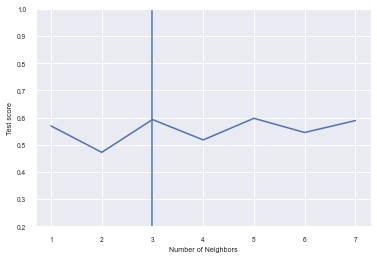

In [250]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
sns.lineplot(param_grid[0]['classifier__n_neighbors'], grid_knn.cv_results_['mean_test_score'][grid_knn.cv_results_['mean_test_score']>0],ax=ax)
ax.axvline(3, 0,2)
ax.set_xticks(param_grid[0]['classifier__n_neighbors'])
ax.set_ylabel("Test score")
ax.set_xlabel("Number of Neighbors")
ax.set_ylim((0.2, 1))

<module 'matplotlib.pyplot' from '/Users/louislacombe/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

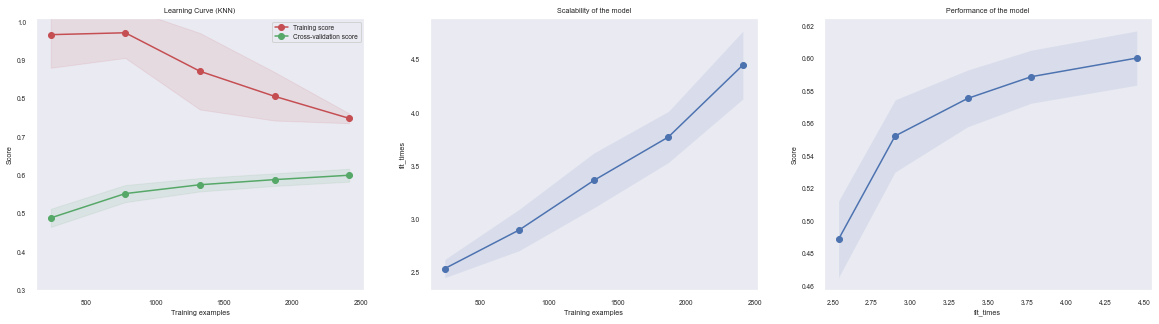

In [251]:
plot_learning_curve(grid_knn, 'Learning Curve (KNN)', 
                    X_train_sel, 
                    y_train,
                    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0),
                    n_jobs=-1,
                    ylim=(0.3, 1.01))

## (d) LDA

In [252]:
### Parameter tuning with a pipeline in order to gridsearch the best hyperparamters ### 

class DenseTransformer(FunctionTransformer):

    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, y=None, **fit_params):
        return X.todense()


pipe = Pipeline([
    ('selector', 'passthrough'), # feature selection
    ('to_dense', DenseTransformer()),
    ('classifier', OneVsRestClassifier(LinearDiscriminantAnalysis())) # the classifier
])

# specify selection range
param_grid = [
    {
        'selector': [SelectKBest(chi2)],
        'selector__k': [1400, 800, 500, 300],
        
    },
]

# fit the model to different feature sets
grid_lda = GridSearchCV(pipe, 
                    param_grid=param_grid, 
                    cv=5, 
                    scoring='f1_micro',
                    n_jobs=-1,
                   )
grid_lda.fit(X_train, y_train)
print(grid_lda.best_params_['selector'])

# save the best selector
selector_lda = grid_lda.best_params_['selector'].fit(X_train, y_train)
X_train_sel = selector_lda.transform(X_train)
X_dev_sel = selector_lda.transform(X_dev)
X_test_sel = selector_lda.transform(X_test)

SelectKBest(k=300, score_func=<function chi2 at 0x7feaaf139310>)


In [253]:
grid_lda.fit(X_train_sel, y_train)
predictions_sel = grid_lda.predict(X_dev_sel)
print(classification_report(y_dev, predictions_sel))

              precision    recall  f1-score   support

           0       0.60      0.44      0.51       428
           1       0.79      0.69      0.74       624
           2       0.88      0.80      0.84       456

   micro avg       0.77      0.65      0.71      1508
   macro avg       0.76      0.64      0.69      1508
weighted avg       0.76      0.65      0.70      1508
 samples avg       0.64      0.65      0.65      1508



/Users/louislacombe/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [254]:
print('best estimator parameters:', '\n', '\n',
      grid_lda.best_estimator_, '\n', '\n', 
      'best accuracy score:','\n', '\n',
      grid_lda.best_score_)

best estimator parameters: 
 
 Pipeline(memory=None,
         steps=[('selector',
                 SelectKBest(k=300,
                             score_func=<function chi2 at 0x7feaaf139310>)),
                ('to_dense',
                 DenseTransformer(accept_sparse=False, check_inverse=True,
                                  func=None, inv_kw_args=None,
                                  inverse_func=None, kw_args=None,
                                  validate=False)),
                ('classifier',
                 OneVsRestClassifier(estimator=LinearDiscriminantAnalysis(n_components=None,
                                                                          priors=None,
                                                                          shrinkage=None,
                                                                          solver='svd',
                                                                          store_covariance=False,
                                

In [256]:
y_score = grid_lda.predict_proba(X_dev_sel)

In [257]:
n_classes = Y.shape[1]
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_dev[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_dev[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(y_dev.ravel(),
    y_score.ravel())
average_precision["micro"] = average_precision_score(y_dev, y_score,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

Average precision score, micro-averaged over all classes: 0.80


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.80')

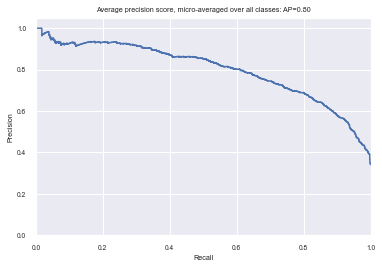

In [258]:
plt.figure()
plt.step(recall['micro'], precision['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))

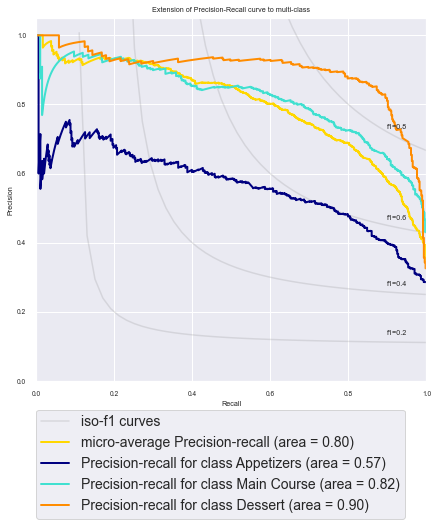

In [259]:
# setup plot details
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

plt.figure(figsize=(7, 8))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

lines.append(l)
labels.append('iso-f1 curves')
l, = plt.plot(recall["micro"], precision["micro"], color='gold', lw=2)
lines.append(l)
labels.append('micro-average Precision-recall (area = {0:0.2f})'
              ''.format(average_precision["micro"]))

classes_food = {
    0:'Appetizers',
    1:'Main Course',
    2:'Dessert'
}
for i, color in zip(range(n_classes), colors):
    l, = plt.plot(recall[i], precision[i], color=color, lw=2)
    lines.append(l)
    labels.append('Precision-recall for class {0} (area = {1:0.2f})'
                  ''.format(classes_food[i], average_precision[i]))

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Extension of Precision-Recall curve to multi-class')
plt.legend(lines, labels, loc=(0, -.38), prop=dict(size=14))


plt.show()

<module 'matplotlib.pyplot' from '/Users/louislacombe/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

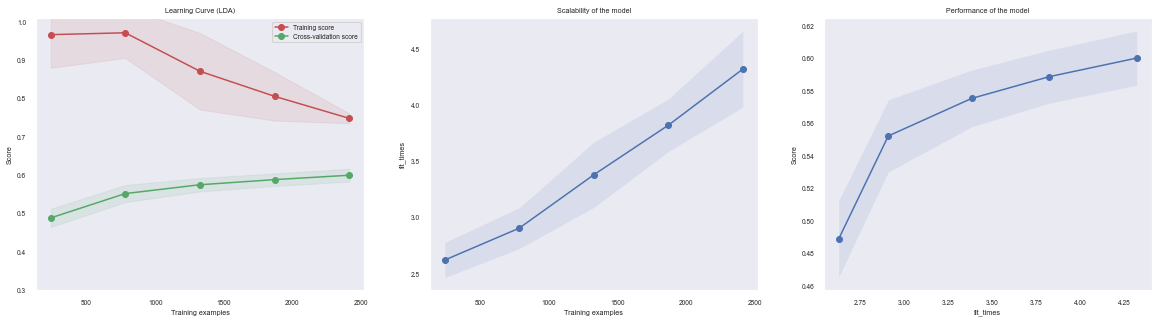

In [260]:
plot_learning_curve(grid_knn, 'Learning Curve (LDA)', 
                    X_train_sel, 
                    y_train,
                    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0),
                    n_jobs=-1,
                    ylim=(0.3, 1.01))

## (e) Naive Bayes

In [261]:
### Parameter tuning with a pipeline in order to gridsearch the best hyperparamters ### 

class DenseTransformer(FunctionTransformer):

    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, y=None, **fit_params):
        return X.todense()
    
# set up the sequence of steps
pipe = Pipeline([
    ('selector', 'passthrough'), # feature selection
    ('to_dense', DenseTransformer()),
    ('classifier', OneVsRestClassifier(GaussianNB())) # the classifier
])

# specify selection range
param_grid = [
    {
        'selector': [SelectKBest(chi2)],
        'selector__k': [1400, 800, 500, 300]
    },
]

# fit the model to different feature sets
grid_gnb = GridSearchCV(pipe, 
                    param_grid=param_grid, 
                    cv=5, 
                    scoring='f1_micro',
                    n_jobs=-1,
                   )
grid_gnb.fit(X_train, y_train)
print(grid_gnb.best_params_['selector'])

# save the best selector
selector = grid_gnb.best_params_['selector'].fit(X_train, y_train)
X_train_sel = selector.transform(X_train)
X_dev_sel = selector.transform(X_dev)
X_test_sel = selector.transform(X_test)

SelectKBest(k=1400, score_func=<function chi2 at 0x7feaaf139310>)


In [262]:
grid_gnb.fit(X_train_sel, y_train)
predictions_sel = grid_gnb.predict(X_dev_sel)
print(classification_report(y_dev, predictions_sel))

              precision    recall  f1-score   support

           0       0.39      0.77      0.52       428
           1       0.57      0.88      0.69       624
           2       0.77      0.91      0.83       456

   micro avg       0.55      0.86      0.67      1508
   macro avg       0.58      0.85      0.68      1508
weighted avg       0.58      0.86      0.69      1508
 samples avg       0.60      0.86      0.68      1508



/Users/louislacombe/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [263]:
print('best estimator parameters:', '\n', '\n',
      grid_gnb.best_estimator_, '\n', '\n', 
      'best accuracy score:','\n', '\n',
      grid_gnb.best_score_)

best estimator parameters: 
 
 Pipeline(memory=None,
         steps=[('selector',
                 SelectKBest(k=1400,
                             score_func=<function chi2 at 0x7feaaf139310>)),
                ('to_dense',
                 DenseTransformer(accept_sparse=False, check_inverse=True,
                                  func=None, inv_kw_args=None,
                                  inverse_func=None, kw_args=None,
                                  validate=False)),
                ('classifier',
                 OneVsRestClassifier(estimator=GaussianNB(priors=None,
                                                          var_smoothing=1e-09),
                                     n_jobs=None))],
         verbose=False) 
 
 best accuracy score: 
 
 0.7224590805072248


In [264]:
y_score = grid_gnb.predict_proba(X_dev_sel)

In [265]:
n_classes = Y.shape[1]
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_dev[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_dev[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(y_dev.ravel(),
    y_score.ravel())
average_precision["micro"] = average_precision_score(y_dev, y_score,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

Average precision score, micro-averaged over all classes: 0.52


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.52')

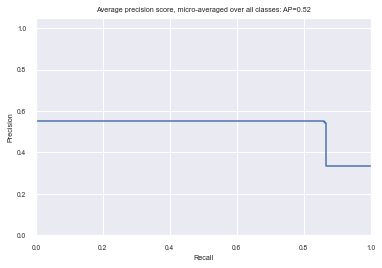

In [266]:
# plotting avearge precision score

plt.figure()
plt.step(recall['micro'], precision['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))

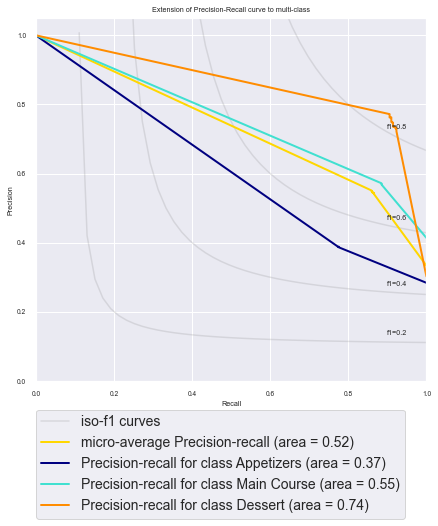

In [267]:
# setup plot details
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

plt.figure(figsize=(7, 8))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

lines.append(l)
labels.append('iso-f1 curves')
l, = plt.plot(recall["micro"], precision["micro"], color='gold', lw=2)
lines.append(l)
labels.append('micro-average Precision-recall (area = {0:0.2f})'
              ''.format(average_precision["micro"]))

classes_food = {
    0:'Appetizers',
    1:'Main Course',
    2:'Dessert'
}
for i, color in zip(range(n_classes), colors):
    l, = plt.plot(recall[i], precision[i], color=color, lw=2)
    lines.append(l)
    labels.append('Precision-recall for class {0} (area = {1:0.2f})'
                  ''.format(classes_food[i], average_precision[i]))

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Extension of Precision-Recall curve to multi-class')
plt.legend(lines, labels, loc=(0, -.38), prop=dict(size=14))

plt.show()

<module 'matplotlib.pyplot' from '/Users/louislacombe/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

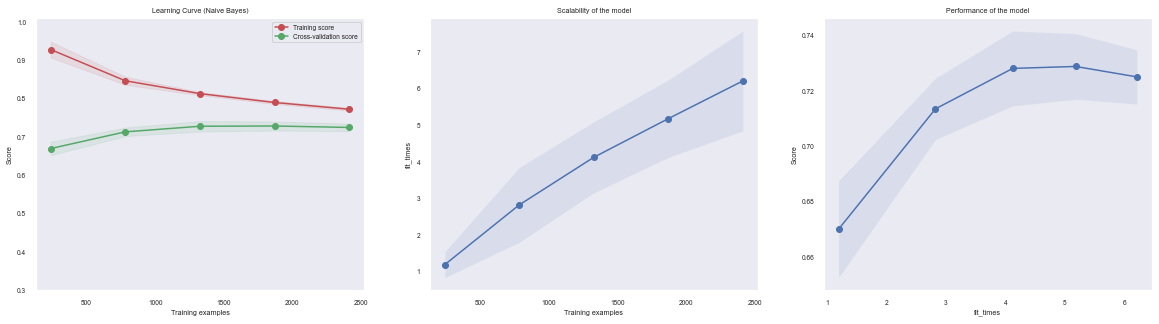

In [268]:
plot_learning_curve(grid_gnb, 'Learning Curve (Naive Bayes)', 
                    X_train_sel, 
                    y_train,
                    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0),
                    n_jobs=-1,
                    ylim=(0.3, 1.01))

## (f) Support Vector Classifier

In [310]:
# Support-Vector Classifier with no parameter tuning on DIRECTIONS column

clf_svc = OneVsRestClassifier(LinearSVC())
clf_svc.fit(X_train, y_train)
predictions_svc = clf_svc.predict(X_dev)
print(classification_report(y_dev, predictions_svc))

              precision    recall  f1-score   support

           0       0.59      0.44      0.50       428
           1       0.75      0.74      0.75       624
           2       0.87      0.83      0.85       456

   micro avg       0.75      0.68      0.72      1508
   macro avg       0.74      0.67      0.70      1508
weighted avg       0.74      0.68      0.71      1508
 samples avg       0.67      0.68      0.67      1508



/Users/louislacombe/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [311]:
# Support-Vector Classifier with no parameter tuning on INGREDIENTS column

clf_svc_ing = OneVsRestClassifier(LinearSVC())
clf_svc_ing.fit(X_train1, y_train1)
predictions_svc_ing = clf_svc_ing.predict(X_dev1)
print(classification_report(y_dev1, predictions_svc_ing))

              precision    recall  f1-score   support

           0       0.46      0.35      0.40       428
           1       0.65      0.59      0.62       624
           2       0.74      0.69      0.71       456

   micro avg       0.63      0.55      0.59      1508
   macro avg       0.62      0.54      0.58      1508
weighted avg       0.62      0.55      0.58      1508
 samples avg       0.53      0.55      0.54      1508



/Users/louislacombe/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [312]:
### Parameter tuning with a pipeline in order to gridsearch the best hyperparamters ### 

# set up the sequence of steps
pipe = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),#the Scaler
    ('selector', 'passthrough'), # feature selection
    ('classifier', OneVsRestClassifier(LinearSVC())) # the classifier 
])

# specify selection range
param_grid = [
    {
        'selector': [SelectKBest(chi2)],
        'selector__k': [1400, 800, 500, 300],
        'classifier__estimator__C': np.arange(0, .2, 0.01),
        'classifier__estimator__class_weight':['balanced']
        
    },
]

grid_svc = GridSearchCV(pipe, param_grid, cv=5, refit = True, scoring='f1_micro',verbose = 1,n_jobs=-1)

grid_svc.fit(X_train, y_train)
print(grid_svc.best_params_['selector'])

# save the best selector
selector_svc = grid_svc.best_params_['selector'].fit(X_train, y_train)
X_train_sel = selector_svc.transform(X_train)
X_dev_sel = selector_svc.transform(X_dev)
X_test_sel = selector_svc.transform(X_test)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   22.1s finished


SelectKBest(k=300, score_func=<function chi2 at 0x7feaaf139310>)


In [313]:
grid_svc.fit(X_train_sel, y_train)
grid_predictions = grid_svc.predict(X_dev_sel)
print(classification_report(y_dev, grid_predictions))

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.2s


              precision    recall  f1-score   support

           0       0.50      0.72      0.59       428
           1       0.72      0.75      0.74       624
           2       0.81      0.88      0.84       456

   micro avg       0.67      0.78      0.72      1508
   macro avg       0.68      0.78      0.72      1508
weighted avg       0.69      0.78      0.73      1508
 samples avg       0.69      0.78      0.72      1508



[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    7.6s finished
/Users/louislacombe/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [275]:
print('best estimator parameters:', '\n', '\n',
      grid_svc.best_estimator_, '\n', '\n', 
      'best accuracy score:','\n', '\n',
      grid_svc.best_score_)

best estimator parameters: 
 
 Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=False, with_std=True)),
                ('selector',
                 SelectKBest(k=300,
                             score_func=<function chi2 at 0x7feaaf139310>)),
                ('classifier',
                 OneVsRestClassifier(estimator=LinearSVC(C=0.01,
                                                         class_weight='balanced',
                                                         dual=True,
                                                         fit_intercept=True,
                                                         intercept_scaling=1,
                                                         loss='squared_hinge',
                                                         max_iter=1000,
                                                         multi_class='ovr',
                                                         penalty='l2',
  

<module 'matplotlib.pyplot' from '/Users/louislacombe/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

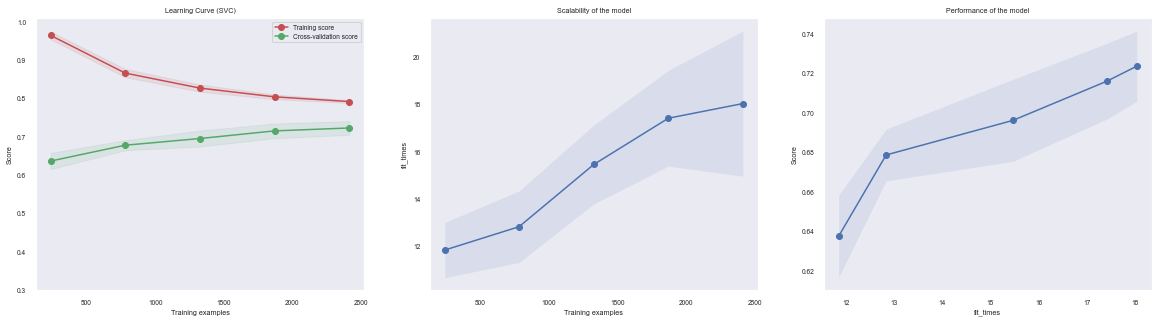

In [276]:
plot_learning_curve(grid_svc, 'Learning Curve (SVC)', 
                    X_train_sel, 
                    y_train,
                    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0),
                    n_jobs=-1,
                    ylim=(0.3, 1.01))

## (g) Random Forest

In [277]:
# Random Forest Classifier with no parameter tuning on DIRECTIONS column

clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)
predictions_rf = clf_rf.predict(X_dev)
print(classification_report(y_dev, predictions_rf))

              precision    recall  f1-score   support

           0       0.73      0.12      0.21       428
           1       0.73      0.77      0.75       624
           2       0.88      0.80      0.84       456

   micro avg       0.78      0.59      0.68      1508
   macro avg       0.78      0.56      0.60      1508
weighted avg       0.78      0.59      0.62      1508
 samples avg       0.59      0.59      0.59      1508



/Users/louislacombe/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [278]:
# Random Forest Classifier with no parameter tuning on INGREDIENTS column

clf_rf_ing = RandomForestClassifier()
clf_rf_ing.fit(X_train1, y_train1)
predictions_rf_ing = clf_rf_ing.predict(X_dev1)
print(classification_report(y_dev1, predictions_rf_ing))

              precision    recall  f1-score   support

           0       0.59      0.13      0.21       428
           1       0.65      0.69      0.67       624
           2       0.76      0.75      0.76       456

   micro avg       0.69      0.55      0.61      1508
   macro avg       0.67      0.52      0.55      1508
weighted avg       0.67      0.55      0.57      1508
 samples avg       0.55      0.55      0.55      1508



/Users/louislacombe/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [279]:
### Parameter tuning with a pipeline in order to gridsearch the best hyperparamters ### 

# set up the sequence of steps
pipe = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),#the Scaler
    ('selector', 'passthrough'), # feature selection
    ('classifier', OneVsRestClassifier(RandomForestClassifier())) # the classifier 
])

# specify selection range
param_grid = [
    {
        'selector': [SelectKBest(chi2)],
        'selector__k': [1400, 800, 500, 300],
        'classifier__estimator__bootstrap': [True, False],
        'classifier__estimator__max_depth':[80, 100],
        'classifier__estimator__min_samples_leaf':[1, 3],
        'classifier__estimator__min_samples_split': [10, 20],
        'classifier__estimator__n_estimators': [300, 600],
        
    }
]

grid_rf = GridSearchCV(pipe, param_grid, cv=5, refit = True, scoring='f1_micro',verbose = 1,n_jobs=-1)

grid_rf.fit(X_train, y_train)
print(grid_rf.best_params_['selector'])

# save the best selector
selector_rf = grid_rf.best_params_['selector'].fit(X_train, y_train)
X_train_sel = selector_rf.transform(X_train)
X_dev_sel = selector_rf.transform(X_dev)
X_test_sel = selector_rf.transform(X_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 128 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   27.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:  7.4min finished


SelectKBest(k=800, score_func=<function chi2 at 0x7feaaf139310>)


In [280]:
grid_rf.fit(X_train_sel, y_train)
predictions_sel = grid_rf.predict(X_dev_sel)
print(classification_report(y_dev, predictions_sel))

Fitting 5 folds for each of 128 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 450 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:  7.1min finished


              precision    recall  f1-score   support

           0       0.60      0.31      0.41       428
           1       0.74      0.80      0.77       624
           2       0.86      0.85      0.86       456

   micro avg       0.76      0.68      0.72      1508
   macro avg       0.74      0.65      0.68      1508
weighted avg       0.74      0.68      0.69      1508
 samples avg       0.66      0.68      0.66      1508



/Users/louislacombe/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [281]:
print('best estimator parameters:', '\n', '\n',
      grid_rf.best_estimator_, '\n', '\n', 
      'best accuracy score:','\n', '\n',
      grid_rf.best_score_)

best estimator parameters: 
 
 Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=False, with_std=True)),
                ('selector',
                 SelectKBest(k=800,
                             score_func=<function chi2 at 0x7feaaf139310>)),
                ('classifier',
                 OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=False,
                                                                      ccp_alpha=0.0,
                                                                      class_weight=None,
                                                                      criterion='gini',
                                                                      max_depth=100,
                                                                      max_features='auto',
                                                                      max_leaf_nodes=None,
                                                      

KeyboardInterrupt: 

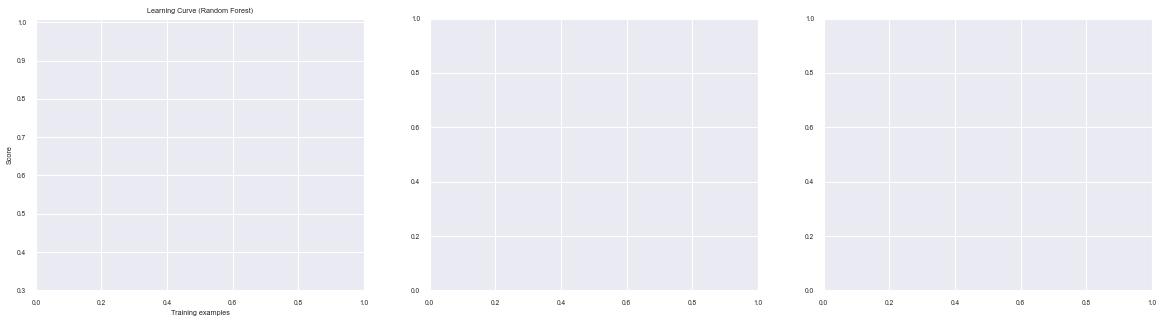

In [282]:
plot_learning_curve(grid_rf, 'Learning Curve (Random Forest)', 
                    X_train_sel, 
                    y_train,
                    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0),
                    n_jobs=-1,
                    ylim=(0.3, 1.01))

## (h) XG Boost

In [283]:
# XG Boost Classifier with no parameter tuning on DIRECTIONS column

clf_xgb = OneVsRestClassifier(XGBClassifier())
clf_xgb.fit(X_train, y_train)
predictions_xgb = clf_xgb.predict(X_dev)
print(classification_report(y_dev, predictions_xgb))

/Users/louislacombe/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:37:32] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:37:34] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:37:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.59      0.39      0.47       428
           1       0.76      0.72      0.74  

/Users/louislacombe/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [284]:
# XG Boost Classifier  Classifier with no parameter tuning on INGREDIENTS column

clf_xgb_ing = OneVsRestClassifier(XGBClassifier())
clf_xgb_ing.fit(X_train1, y_train1)
predictions_xgb_ing = clf_xgb_ing.predict(X_dev1)
print(classification_report(y_dev, predictions_xgb_ing))

/Users/louislacombe/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:37:37] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:37:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:37:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.50      0.29      0.37       428
           1       0.66      0.60      0.63  

/Users/louislacombe/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [285]:
### Parameter tuning with a pipeline in order to gridsearch the best hyperparamters ### 

# set up the sequence of steps
pipe = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),#the Scaler
    ('selector', 'passthrough'), # feature selection
    ('classifier', OneVsRestClassifier(XGBClassifier())) # the classifier 
])

# specify selection range
param_grid = [
    {
        'selector': [SelectKBest(chi2)],
        'selector__k': [1400, 800, 500, 300],
        'classifier__estimator__learning_rate': [0.1],
        'classifier__estimator__n_estimators': [1000],
        'classifier__estimator__max_depth': [2, 10],
        'classifier__estimator__min_child_weight': [1, 6],
        'classifier__estimator__gamma': [0, 5],
        'classifier__estimator__reg_alpha':[0.1, 1, 100]
        
    }
]

grid_xgb = GridSearchCV(pipe, param_grid, cv=5, refit = True, scoring='f1_micro',verbose = 1,n_jobs=-1)

grid_xgb.fit(X_train, y_train)
print(grid_xgb.best_params_['selector'])

# save the best selector
selector_xgb = grid_xgb.best_params_['selector'].fit(X_train, y_train)
X_train_sel = selector_xgb.transform(X_train)
X_dev_sel = selector_xgb.transform(X_dev)
X_test_sel = selector_xgb.transform(X_test)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed: 54.1min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 64.8min finished
/Users/louislacombe/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:42:27] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:42:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:42:30] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
SelectKBest(k=800, score_func=<function chi2 at 0x7feaaf139310>)


In [286]:
grid_xgb.fit(X_train_sel, y_train)
predictions_sel = grid_xgb.predict(X_dev_sel)
print(classification_report(y_dev, predictions_sel))

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done 450 tasks      | elapsed: 40.1min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 43.4min finished
/Users/louislacombe/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:25:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:25:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:26:01] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.62      0.42      0.50       428
           1       0.77      0.71      0.74  

/Users/louislacombe/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [287]:
print('best estimator parameters:', '\n', '\n',
      grid_xgb.best_estimator_, '\n', '\n', 
      'best accuracy score:','\n', '\n',
      grid_xgb.best_score_)

best estimator parameters: 
 
 Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=False, with_std=True)),
                ('selector',
                 SelectKBest(k=800,
                             score_func=<function chi2 at 0x7feaaf139310>)),
                ('classifier',
                 OneVsRestClassifier(estimator=XGBClassifier(base_score=None,
                                                             booster=None,
                                                             colsample_bylevel=None,
                                                             colsample_bynode=None,
                                                             colsample_bytree=None,
                                                             gamma=0,
                                                             gpu_id=None,
                                                             importa...
                                                

In [ ]:
plot_learning_curve(grid_xgb, 'Learning Curve (XGB)', 
                    X_train_sel, 
                    y_train,
                    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0),
                    n_jobs=-1,
                    ylim=(0.3, 1.01))

## (i) CNN

In [288]:
# CNN needs different inputs than the other algorithms, thus creating new splits below

target = 'label'
input_column = 'directions_processed'

data = pd.read_csv('preprocessed_final.csv', usecols=[input_column, target])
data = data[~data['label'].isna()].reset_index(drop=True)

train_data, _other = train_test_split(
    data, 
    test_size=0.5, 
    random_state=0)


dev_data, test_data = train_test_split(
    _other,
    test_size=0.5, 
    random_state=0)

In [289]:
# make train-dev-test splits
# train_data = data[:3000]
# dev_data = data[4000:5000]
# test_data = data[5000:]

train_instances = train_data[input_column].apply(str).apply(str.split)
train_labels = train_data[target]

# collect known word tokens and tags
wordset, labelset = set(), set()

# collect tags from all data, to prevent unseen labels
labelset.update(set(data[target]))

# get the vocabulary
for words in train_instances:
    wordset.update(set(words))

# map words and tags into ints
PAD = '-PAD-'
UNK = '-UNK-'
word2int = {word: i + 2 for i, word in enumerate(sorted(wordset))}
word2int[PAD] = 0  # special token for padding
word2int[UNK] = 1  # special token for unknown words
 
label2int = {label: i for i, label in enumerate(sorted(labelset))}
# inverted index to translate it back
int2label = {i:label for label, i in label2int.items()}


def convert2ints(instances):
    """
    function to apply the mapping to all words
    """
    result = []
    for words in instances:
        # replace words with int, 1 for unknown words
        word_ints = [word2int.get(word, 1) for word in words]
        result.append(word_ints)
    return result
                          
train_instances_int = convert2ints(train_instances)
train_labels_int = [label2int[label] for label in train_labels]

In [290]:
len(word2int) # number of words in vocabulary

3520

In [291]:
# convert test data 
test_instances = test_data[input_column].apply(str).apply(str.split)
test_labels = test_data[target]

test_instances_int = convert2ints(test_instances)
test_labels_int = [label2int[label] for label in test_labels]

# convert dev data
dev_instances = dev_data[input_column].apply(str).apply(str.split)
dev_labels = dev_data[target]

dev_instances_int = convert2ints(dev_instances)
dev_labels_int = [label2int[label] for label in dev_labels]

In [292]:
# converting labels from a single value to a 1-hot distribution over all possible values

train_labels_1hot = to_categorical(train_labels_int, len(label2int))
test_labels_1hot = to_categorical(test_labels_int, len(label2int))
dev_labels_1hot = to_categorical(dev_labels_int, len(label2int))

train_labels_1hot[0]

array([1., 0., 0.], dtype=float32)

In [293]:
# compute 95th percentile of training sentence lengths
L = sorted(map(len, train_instances))
MAX_LENGTH = L[int(len(L)*0.95)]
print(MAX_LENGTH)

# apply padding
train_instances_int = pad_sequences(train_instances_int, padding='post', maxlen=MAX_LENGTH)
test_instances_int = pad_sequences(test_instances_int, padding='post', maxlen=MAX_LENGTH)
dev_instances_int = pad_sequences(dev_instances_int, padding='post', maxlen=MAX_LENGTH)

122


In [294]:
# make it repeatable
np.random.seed(42)

# set parameters of matrices and convolution
embedding_dim = 64
nb_filter = 64
filter_length = 3
hidden_dims = 32
stride_length = 1

inputs = Input((MAX_LENGTH, ), 
               name='word_IDs')
embeddings = Embedding(len(word2int), 
                       embedding_dim, 
                       input_length=MAX_LENGTH)(inputs)
convolution = Conv1D(filters=nb_filter,  # Number of filters to use
                    kernel_size=filter_length, # n-gram range of each filter.
                    padding='same',  #valid: don't go off edge; same: use padding before applying filter
                    activation='relu',
                    strides=stride_length)(embeddings)
convolution2 = Activation(activation='tanh')(convolution)
pooling = GlobalMaxPooling1D()(convolution2)
dropout1 = Dropout(0.2)(pooling)
dense = Dense(hidden_dims, activation='relu')(dropout1)
dropout2 = Dropout(0.2)(dense)
output = Dense(len(label2int), activation='softmax')(dropout2)

model_cnn = Model(inputs=[inputs], outputs=[output])
model_cnn.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# get alist of all the layers and their size
model_cnn.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
word_IDs (InputLayer)        [(None, 122)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 122, 64)           225280    
_________________________________________________________________
conv1d (Conv1D)              (None, 122, 64)           12352     
_________________________________________________________________
activation (Activation)      (None, 122, 64)           0         
_________________________________________________________________
global_max_pooling1d (Global (None, 64)                0         
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 32)                2080  

In [390]:
# batch size can have a huge effect on performance!
batch_size = 64
epochs = 10

history = model_cnn.fit(train_instances_int, train_labels_1hot,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(dev_instances_int, dev_labels_1hot)
                   )

loss, accuracy = model_cnn.evaluate(test_instances_int, test_labels_1hot,
                                batch_size=batch_size,
                                verbose=False)

print("\nTesting Accuracy:  {:.4f}".format(accuracy))

Epoch 1/10
48/48 [==============================] - 1s 26ms/step - loss: 0.0106 - accuracy: 0.9980 - val_loss: 1.5602 - val_accuracy: 0.7195
Epoch 2/10
48/48 [==============================] - 1s 24ms/step - loss: 0.0125 - accuracy: 0.9973 - val_loss: 1.5768 - val_accuracy: 0.7202
Epoch 3/10
48/48 [==============================] - 1s 22ms/step - loss: 0.0142 - accuracy: 0.9970 - val_loss: 1.6197 - val_accuracy: 0.7095
Epoch 4/10
48/48 [==============================] - 1s 24ms/step - loss: 0.0198 - accuracy: 0.9960 - val_loss: 1.5907 - val_accuracy: 0.7168
Epoch 5/10
48/48 [==============================] - 1s 24ms/step - loss: 0.0209 - accuracy: 0.9947 - val_loss: 1.6198 - val_accuracy: 0.7115
Epoch 6/10
48/48 [==============================] - 1s 23ms/step - loss: 0.0181 - accuracy: 0.9954 - val_loss: 1.6543 - val_accuracy: 0.7062
Epoch 7/10
48/48 [==============================] - 1s 22ms/step - loss: 0.0223 - accuracy: 0.9957 - val_loss: 1.6985 - val_accuracy: 0.6963
Epoch 8/10
48

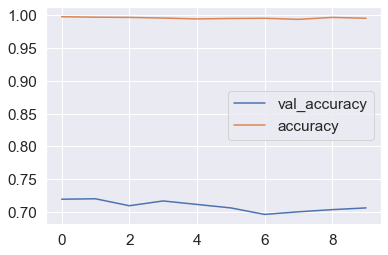

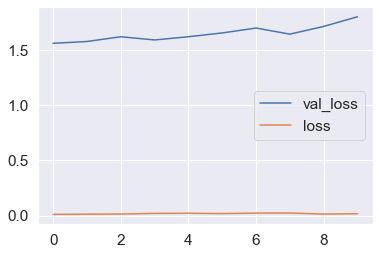

In [391]:
%matplotlib inline
df = pd.DataFrame(history.history)
df[['val_accuracy', 'accuracy']].plot.line();
df[['val_loss', 'loss']].plot.line();

### Bootstrap

In [392]:
# comparing best algorithm with baselines

In [393]:
from sklearn.metrics import f1_score, precision_score, recall_score
def bootstrap_sample(system1 , system2  , system3 ,gold, samples=1000, score=f1_score, average='micro'):
    sy1 = system1.copy()
    sy2 = system2.copy()
    sy3 = system3.copy()
    
    """
    compute the proportion of times the performance difference of the 
    two systems on a subsample is significantly different from the 
    performance on the entire sample
    """
    N = len(gold) # number of instances
    
    # make sure the two systems have the same number of samples
    assert len(system1) == N and len(system2) == N and len(system3) == N, 'samples have different lengths'

    # compute performance score on entire sample
    base_score1 = score(gold, system1, average=average) #Dummy Baseline
    base_score2 = score(gold, system2, average=average) #Logistic 
    base_score3 = score(gold, system3, average=average) #Other tuned
    print("Base difference respect to Dummy Baseline: {} vs. {}".format(base_score1, base_score3))
    print("Base difference respect to Logistic: {} vs. {}".format(base_score2, base_score3))
    b1 = base_score1.copy()
    b2 = base_score2.copy()
    b3 = base_score3.copy()
# switch systems if system2 is better
    if base_score1 > base_score3:
        system3, system1 = system1, system3
        base_score3, base_score1 = base_score1, base_score3
    
    basedelta_D = base_score3 - base_score1
    assert basedelta_D > 0, 'Wrong system first, system1 needs to be better!'
    print(f"The difference is {basedelta_D}")
    
    system1 = np.array(system1)
    system3 = np.array(system3)
    gold = np.array(gold)
    
    # compute the difference
    p_D = 0
    deltas_D = []
    for i in range(samples):
        # select a subsample, with replacement
        sample = np.random.choice(N, size=N, replace=True)

        # collect data corresponding to subsample
        sample1 = system1[sample]
        sample3 = system3[sample]
        gold_sample = gold[sample]

        # compute scores on subsample
        sample_score1 = score(gold_sample, sample1, average=average)
        sample_score3 = score(gold_sample, sample3, average=average)
        sample_delta_D = sample_score3 - sample_score1

        # check whether the observed sample difference is at least 
        # twice as large as the base difference
        if sample_delta_D > 2*basedelta_D:
            p_D += 1
        deltas_D.append(sample_delta_D)
        
    system1 = sy1
    system2 = sy2
    system3 = sy3
    base_score1 = b1
    base_score2 = b2
    base_score3 = b3
    if base_score2 > base_score3:
        system2, system3 = system3, system2
        base_score2, base_score3 = base_score3, base_score2
        
    p_L = 0 
    deltas_L = []
    basedelta_L = base_score3 - base_score2
    assert basedelta_L >= 0, 'Wrong system first, system3 needs to be better!'
    print(f"The difference is {basedelta_L}")
    
    for i in range(samples):
            # select a subsample, with replacement
            sample = np.random.choice(N, size=N, replace=True)

            # collect data corresponding to subsample
            sample2 = system2[sample]
            sample3 = system3[sample]
            gold_sample = gold[sample]

            # compute scores on subsample
            sample_score2 = score(gold_sample, sample2, average=average)
            sample_score3 = score(gold_sample, sample3, average=average)
            sample_delta_L = sample_score3 - sample_score2

            # check whether the observed sample difference is at least 
            # twice as large as the base difference
            if sample_delta_L > 2*basedelta_L:
                p_L += 1
            deltas_L.append(sample_delta_L)


    return p_D/samples, deltas_D, p_L/samples, deltas_L

In [394]:
cnn_pred = model_cnn.predict(dev_instances_int)
cnn_pred = np.zeros_like(cnn_pred)
cnn_pred[np.arange(len(cnn_pred)), cnn_pred.argmax(1)] = 1
cnn_pred = cnn_pred.astype(np.int32)

In [395]:
dumb_predictions_ing_binar = label_binarize(dumb_predictions_ing, classes=['A', 'M', 'D'])
dumb_predictions_ing_binar = dumb_predictions_ing_binar.astype(np.int32)

In [396]:
predictions_sel_logreg = predictions_sel_logreg.astype(np.int32)

In [397]:
p_value_D,delta_D ,p_value_L,delta_L = bootstrap_sample(system1 = dumb_predictions_ing_binar, system2 = predictions_sel_logreg , system3 = cnn_pred ,gold= y_dev, samples=1000, score=f1_score, average='micro')

Base difference respect to Dummy Baseline: 0.41379310344827586 vs. 0.2838196286472148
Base difference respect to Logistic: 0.6979206049149338 vs. 0.2838196286472148
The difference is 0.12997347480106103
The difference is 0.41410097626771897


0.0


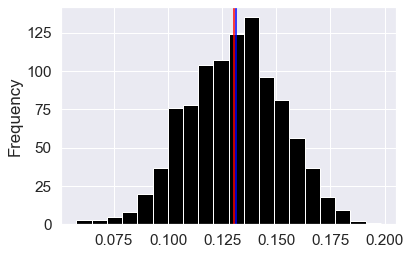

In [398]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
pd.Series(delta_D).plot.hist(bins=20, color= "black")
plt.axvline(pd.Series(delta_D).mean(),color="red")
plt.axvline(pd.Series(delta_D).median(),color="blue")
print(p_value_D)

0.0


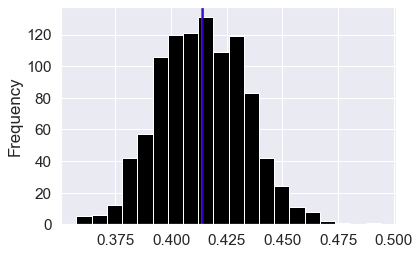

In [399]:
pd.Series(delta_L).plot.hist(bins=20, color= "black")
plt.axvline(pd.Series(delta_L).mean(),color="red")
plt.axvline(pd.Series(delta_L).median(),color="blue")
print(p_value_L)

In [400]:
def plot_boot(delta_d,delta_l):
    dD = pd.Series(delta_d)
    dL = pd.Series(delta_l)
    fig, ax = plt.subplots(1,2,figsize=(18,5))
    #fig.figsize((15,15))
    ax[0].set_title('Delta for Dummy Baseline')
    ax[0].hist(dD, color="black")
    ax[0].axvline(dD.mean(),color ="red", label = "mean")
    ax[0].axvline(dD.median(),color ="blue", label = "median")
    ax[0].set_xlabel("Delta")
    ax[0].set_ylabel("N")
    ax[0].legend()
    
    
    
    ax[1].set_title('Delta for Logistic')
    ax[1].hist(dL, color="black")
    ax[1].axvline(dL.mean(),color ="red", label = "mean")
    ax[1].axvline(dL.median(),color ="blue", label = "median")
    ax[1].set_xlabel("Delta")
    ax[1].set_ylabel("N")
    ax[1].legend()

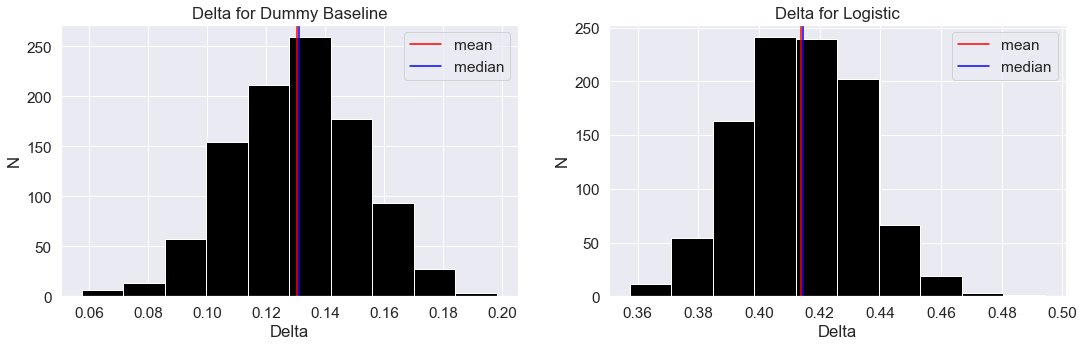

In [401]:
plot_boot(delta_D,delta_L)

Clearly here, we see that there is a significant difference and it is statistically different as can be observed by the p-value of 0.

Accuracy for LogisticRegression_tuned: 0.6375082836315441
F1-score for LogisticRegression_tuned: 0.7503059975520198


Accuracy for K-NearestNeighbors_tuned: 0.5666003976143141
F1-score for K-NearestNeighbors_tuned: 0.6065980844271018


Accuracy for SupportVectorClassifier_tuned: 0.6030483764082174
F1-score for SupportVectorClassifier_tuned: 0.7182286927509858


Accuracy for LinearDiscriminantAnalysis_tuned: 0.6507620941020543
F1-score for LinearDiscriminantAnalysis_tuned: 0.7229344729344731


Accuracy for LogisticRegression_not_tuned: 0.6056991385023194
F1-score for LogisticRegression_not_tuned: 0.7010231148162184


Accuracy for RandomForest_tuned: 0.6355202120609675
F1-score for RandomForest_tuned: 0.7148396193161791


Accuracy for DummyClassifier: 0.41086812458581845
F1-score for DummyClassifier: 0.41086812458581845


Accuracy for ConvolutionalNeuralNetwork: 0.7495029821073559
F1-score for ConvolutionalNeuralNetwork: 0.7495029821073559


Accuracy for XG-Boost_tuned: 0.631544068919814

<AxesSubplot:xlabel='f1_score', ylabel='accuracy'>

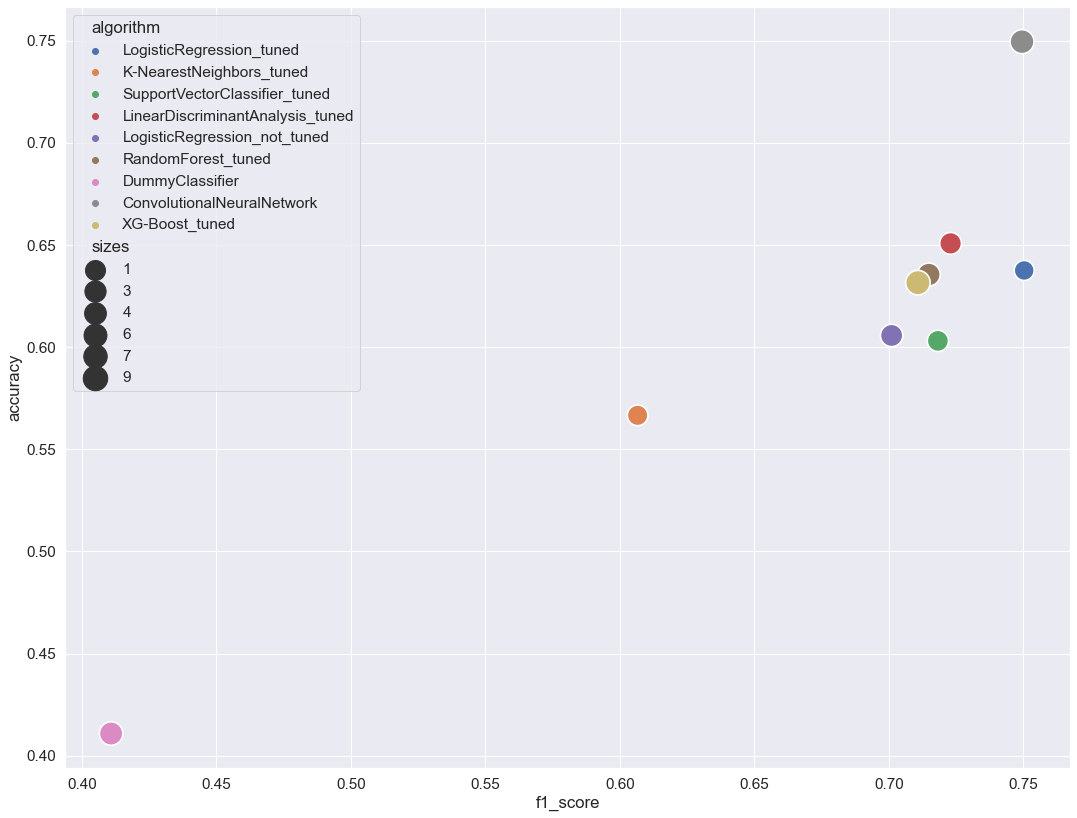

In [321]:
#Creating a dictionary containing the name of the model, its selector and its prediction model
from sklearn import metrics
models = {
    'LogisticRegression_tuned': {
            'selector': selector_lr,
            'model': grid_lr
        },
    'K-NearestNeighbors_tuned': {
            'selector': selector_knn,
            'model': grid_knn
        },
    'SupportVectorClassifier_tuned': {
            'selector': selector_svc,
            'model': grid_svc
        },
    'LinearDiscriminantAnalysis_tuned': {
            'selector': selector_lda,
            'model': grid_lda
        },
    'LogisticRegression_not_tuned': {
            'model': logreg_clf
        },
    'RandomForest_tuned': {
            'selector': selector_rf,
            'model': grid_rf
        },
    'DummyClassifier' : {
        'model': clf_dummy
    },
    'ConvolutionalNeuralNetwork': {
        'model' : model_cnn
    }, 
    'XG-Boost_tuned':{
        'selector': selector_xgb,
        'model' : grid_xgb
    }
    
    }

#Defining an empty list of scores to be filled with touples
scores = []

#For each model compute the f1-score and the accuracy
for m in list(models.keys()):
    X_test_sel = X_test
    
    if m == 'ConvolutionalNeuralNetwork':
        model = models[m]['model']
        
        a = model.predict(test_instances_int)
        b = np.zeros_like(a)
        b[np.arange(len(a)), a.argmax(1)] = 1
        
        accuracy = metrics.accuracy_score(test_labels_1hot, b)
        print(f"Accuracy for {m}:", accuracy)
    
        f1_score = metrics.f1_score(test_labels_1hot, b, average='micro')
        print(f"F1-score for {m}:",f1_score)
    
        scores.append((m,f1_score,accuracy))
    
        print('\n')
        
        continue
    
    if m == 'DummyClassifier':
        model = models[m]['model']
        y_pred = model.predict(X_test)
        y_pred_binar = label_binarize(y_pred, classes=['A', 'M', 'D'])
    
        accuracy = metrics.accuracy_score(y_test, y_pred_binar)
        print(f"Accuracy for {m}:", accuracy)
    
        f1_score = metrics.f1_score(y_test, y_pred_binar, average='micro')
        print(f"F1-score for {m}:",f1_score)
    
        scores.append((m,f1_score,accuracy))
    
        print('\n')
        continue
    
    #take the model to transform the data (not always)
    if m not in ['ConvolutionalNeuralNetwork','LogisticRegression_not_tuned']:
        selector = models[m]['selector']
        X_test_sel = selector.transform(X_test)
    
    #predict the test data
    model = models[m]['model']
    y_pred = model.predict(X_test_sel)
    
    accuracy =metrics.accuracy_score(y_test, y_pred)
    print(f"Accuracy for {m}:", accuracy)
    
    f1_score = metrics.f1_score(y_test, y_pred,average='micro')
    print(f"F1-score for {m}:",f1_score)
    
    scores.append((m,f1_score,accuracy))
    
    print('\n')
    
#Creating the dataframe with the results for plotting
results = pd.DataFrame(scores).rename(columns={0:'algorithm', 1:'f1_score', 2:'accuracy'})

#change the below to get sizes according to a criteria
results['sizes'] = [i for i in range(1,len(scores)+1)]

#Plotting the data in the dataframe
sns.set(font_scale = 1.4)
fig, ax = plt.subplots(figsize=(18,14))
sns.scatterplot(data=results, y='accuracy',x='f1_score',size='sizes', sizes=(400,600),hue='algorithm')

In the test set, the neural network is much better, yet we can see that the logistic model still performs relatively well.

In [ ]:
# Here we reset such that the file runs faster...

In [ ]:
%reset

<a id='structured_predictions'></a>

### 3.2 Structured Prediction (8pts)
[back to table of content](#home)


Adapt the Structured Perceptron to your sequence prediction task, and note the performance as baseline (3 pt).
Implement a suitable neural net architecture (in `keras`) on the data (4 pts). Compare the best performance of the  models (1 pt).

In [1]:
import re
import numpy as np
import random
import timeit
import keras
import pydot
import spacy
import time 
import random
import multiprocessing
import math
import json
import os
import sys
import pickle
import random
import nltk
import pandas as pd
import tensorflow as tf
from collections import defaultdict, Counter
from keras.models import Model, Sequential
from keras.utils import to_categorical, np_utils
from keras.layers import Input, Embedding, Bidirectional, LSTM, Dropout, Dense, Activation, GlobalMaxPooling1D, Dropout, InputLayer
from keras.layers.convolutional import Conv1D
from keras.layers.core import Dense, Activation
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers.experimental import preprocessing

nlp = spacy.load('en_core_web_sm')
np.set_printoptions(precision=2)

users = re.compile('@[^ ]+')
numbers = re.compile('[0-9]')
urls = re.compile("(https?:\/\/)?(?:www\.|(?!www))?[^\s\.]+\.[^\s]{2,}|(www)?\.[^\s]+\.[^\s]{2,}")
np.random.seed(42)

# Perceptron class

This is the class we used in class. It was slightly adapted to take into account the way we processed the data.

In [69]:
class StructuredPerceptron(object):
    """
    implements a structured perceptron as described in Collins 2002,
    with updates from https://explosion.ai/blog/part-of-speech-pos-tagger-in-python
    """

    def __init__(self):
        """
        initialize model parameters
        """
        self.tags = set()
        self.feature_weights = defaultdict(lambda: defaultdict(float)) #feature_name -> tags -> weight
        self.weight_totals = defaultdict(lambda: defaultdict(float)) #feature_name -> tags -> weight
        self.timestamps = defaultdict(lambda: defaultdict(float)) #feature_name -> tags -> weight

        self.tag_dict = defaultdict(set) #word -> {tags}

        self.START = "__START__"
        self.END = "__END__"
        
        
    def normalize(self, word):
        """
        lowercase word, and replace numbers, user names, and URLs
        """
        return re.sub(urls, 'URL', re.sub(users, '@USER', re.sub(numbers, '0', word.strip().lower())))

    
    def evaluate(self, data_instances, method='greedy'):
        correct = 0
        total = 0
        for (words, tags) in data_instances:
            preds = self.predict(words, method=method)
            matches = sum(map(lambda x: int(x[0]==x[1]), zip(preds, tags)))
            correct += matches
            total += len(tags)
        return correct/total
        
    #changed the function to train and test such that we can directly use the databases
    def fit(self, train, test, iterations=10, learning_rate=0.25, inference='greedy', verbose=False):
        """
        read in a CoNLL-format file, extract features to train weight vector
        """        
        # initialize tag dictionary for each word and get tag set
        instances = [(words, tags) for (words, tags) in train]
        for (words, tags) in instances:
            self.tags.update(set(tags))

            for word, tag in zip(words, tags):
                self.tag_dict[self.normalize(word)].add(tag)
        

        dev_instances = [(words, tags) for (words, tags) in test]
            
        # iterate over data
        for iteration in range(1, iterations+1):
            correct = 0
            total = 0
            if verbose:
                print('Iteration {}'.format(iteration+1), file=sys.stderr, flush=True)
                print("*" * 15, file=sys.stderr, flush=True)

            random.shuffle(instances)
            for i, (words, tags) in enumerate(instances):
                if i > 0:
                    if i%1000==0:
                        print('%s'%i, file=sys.stderr, flush=True)
                    elif i%20==0:
                        print('.', file=sys.stderr, flush=True, end='')

                # get prediction
                prediction = self.predict(words, method=inference)

                # derive global features
                global_gold_features, global_prediction_features = self.get_global_features(words, prediction, tags)
                                    
                # update weight vector:
                # 1. move closer to true tag
                for tag, fids in global_gold_features.items():
                    for fid, count in fids.items():
                        nr_iters_at_this_weight = iteration - self.timestamps[fid][tag]
                        self.weight_totals[fid][tag] += nr_iters_at_this_weight * self.feature_weights[fid][tag]
                        self.timestamps[fid][tag] = iteration
                        self.feature_weights[fid][tag] += learning_rate * count

                # 2. move further from wrong tag
                for tag, fids in global_prediction_features.items():
                    for fid, count in fids.items():
                        nr_iters_at_this_weight = iteration - self.timestamps[fid][tag]
                        self.weight_totals[fid][tag] += nr_iters_at_this_weight * self.feature_weights[fid][tag]
                        self.timestamps[fid][tag] = iteration
                        self.feature_weights[fid][tag] -= learning_rate * count
                        
                # compute training accuracy for this iteration
                correct += sum([int(predicted_tag == true_tag) for predicted_tag, true_tag in zip(prediction, tags)])
                total += len(tags)

                # output examples
                if verbose and i%1000==0:
                    print("current word accuracy:{:.2f}".format(correct/total))
                    print(list(zip(words, 
                                   [self.normalize(word) for word in words], 
                                   tags, 
                                   prediction)), file=sys.stderr, flush=True)
            
            print('\t{} features'.format(len(self.feature_weights)), file=sys.stderr, flush=True)
            print('\tTraining accuracy: {:.2f}\n'.format(correct/total), file=sys.stderr, flush=True)
            print('\tDevelopment accuracy: {:.2f}\n'.format(self.evaluate(dev_instances, method=inference)), file=sys.stderr, flush=True)
         
        # average weights
        for feature, tags in self.feature_weights.items():
            for tag in tags:
                total = self.weight_totals[feature][tag]
                total += (iterations - self.timestamps[feature][tag]) * self.feature_weights[feature][tag]
                averaged = round(total / float(iterations), 3)
                self.feature_weights[feature][tag] = averaged


    def get_features(self, word, previous_tag2, previous_tag, words, i):
        """
        get all features that can be derived from the word and previous tags
        """
        prefix = word[:3]
        suffix = word[-3:]

        features = {
                    'PREFIX={}'.format(prefix),
                    'SUFFIX={}'.format(suffix),
                    'LEN<=3={}'.format(len(word)<=3),
                    'FIRST_LETTER={}'.format(word[0]),
                    'WORD={}'.format(word),
                    'NORM_WORD={}'.format(words[i]),
                    'PREV_WORD={}'.format(words[i-1]),
                    'PREV_WORD_PREFIX={}'.format(words[i-1][:3]),
                    'PREV_WORD_SUFFIX={}'.format(words[i-1][-3:]),
                    'PREV_WORD+WORD={}+{}'.format(words[i-1], words[i]),
                    'NEXT_WORD={}'.format(words[i+1]),
                    'NEXT_WORD_PREFIX={}'.format(words[i+1][:3]),
                    'NEXT_WORD_SUFFIX={}'.format(words[i+1][-3:]),
                    'WORD+NEXT_WORD={}'.format(word, words[i+1]),
                    'NEXT_2WORDS={}+{}'.format(words[i+1], words[i+2]),
                    'PREV_TAG={}'.format(previous_tag),                 # previous tag
                    'PREV_TAG2={}'.format(previous_tag2),                 # two-previous tag
                    'PREV_TAG_BIGRAM={}+{}'.format(previous_tag2, previous_tag),  # tag bigram
                    'PREV_TAG+WORD={}+{}'.format(previous_tag, word),            # word-tag combination
                    'PREV_TAG+PREFIX={}_{}'.format(previous_tag, prefix),        # prefix and tag
                    'PREV_TAG+SUFFIX={}_{}'.format(previous_tag, suffix),        # suffix and tag
                    'WORD+TAG_BIGRAM={}+{}+{}'.format(word, previous_tag2, previous_tag),
                    'SUFFIX+2TAGS={}+{}+{}'.format(suffix, previous_tag2, previous_tag),
                    'PREFIX+2TAGS={}+{}+{}'.format(prefix, previous_tag2, previous_tag),
                    'BIAS'
            }
        return features
    
    
    def get_global_features(self, words, predicted_tags, true_tags):
        '''
        sum up local features
        '''
        context = [self.START] + [self.normalize(word) for word in words] + [self.END, self.END]

        global_gold_features = defaultdict(lambda: Counter())
        global_prediction_features = defaultdict(lambda: Counter())

        prev_predicted_tag = self.START
        prev_predicted_tag2 = self.START
        
        for j, (word, predicted_tag, true_tag) in enumerate(zip(words, predicted_tags, true_tags)):
            # get the predicted features. NB: use j+1, since context is longer than words
            prediction_features = self.get_features(word, prev_predicted_tag2, prev_predicted_tag, context, j+1)

            # update feature correlation with true and predicted tag
            global_prediction_features[predicted_tag].update(prediction_features)
            global_gold_features[true_tag].update(prediction_features)

            prev_predicted_tag2 = prev_predicted_tag
            prev_predicted_tag = predicted_tag

        return global_gold_features, global_prediction_features
            
    
    def get_scores(self, features):
        """
        predict scores for each tag given features
        """
        scores = defaultdict(float)
        
        # add up the scores for each tag
        for feature in features:
            if feature not in self.feature_weights:
                continue
            weights = self.feature_weights[feature]
            for tag, weight in weights.items():
                scores[tag] += weight

        # return tag scores
        if not scores:
            # if there are no scores (e.g., first iteration),
            # simply return the first tag with score 1
            scores[list(self.tags)[0]] = 1
        
        return scores


    def predict(self, words, method='greedy'):
        '''
        predict tags using one of two methods
        '''
        if method == 'greedy':
            return self.predict_greedy(words)
        elif method == 'viterbi':
            return self.predict_viterbi(words)


    def predict_viterbi(self, words):
        '''
        predict using Viterbi decoding
        '''
        context = [self.START] + [self.normalize(word) for word in words] + [self.END, self.END]

        N = len(words)
        M = len(self.tags) #number of tags
        tags = sorted(self.tags)

        # create trellis of size M (number of tags) x N (sentence length)
        Q = np.ones((M, N)) * float('-Inf')
        backpointers = np.ones((M, N), dtype=np.int16) * -1 #backpointers

        # initialize probs for tags j at position 1 (first word)
        features = self.get_features(words[0], self.START, self.START, context, 1)
        scores = self.get_scores(features)
        allowed_initial_tags = self.tag_dict[context[1]]

        for j in range(M):
            if not allowed_initial_tags or tags[j] in allowed_initial_tags:
                Q[j,0] = scores[tags[j]]

        # filling the lattice, for every position and every tag find viterbi score Q
        for i in range(1, N):
            allowed_tags = self.tag_dict[context[i+1]]

            # for every previous tag
            for j in range(M):
                best_score = 0.0#float('-Inf')
                prev_tag = tags[j]

                # skip impossible tags
                allowed_previous_tags = self.tag_dict[context[i]]
                if allowed_previous_tags and prev_tag not in allowed_previous_tags:
                    continue

                best_before = Q[j,i-1] # score of previous tag

                # for every possible pre-previous tag
                for k in range(M):
                    if i == 1:
                        prev2_tag = self.START
                    else:
                        prev2_tag = tags[k]
                        # skip impossible tags
                        allowed_previous2_tags = self.tag_dict[context[i-1]]
                        if allowed_previous2_tags and prev2_tag not in allowed_previous2_tags:
                            continue

                    # get features of word i with the two previous tags
                    features = self.get_features(words[i], prev2_tag, prev_tag, context, i+1)
                    scores = self.get_scores(features)

                    # update best score
                    for t in range(M):
                        tag = tags[t]
                        # if word is unknown, use all tags, otherwise allowed ones
                        if not allowed_tags or tag in allowed_tags:
                            tag_score = best_before + scores[tag]

                            if tag_score > best_score:
                                Q[t,i] = tag_score
                                best_score = tag_score
                                backpointers[t,i] = j

        # final best
        best_id = Q[:,-1].argmax()

        # print best tags in reverse order
        predtags = [tags[best_id]]

        for i in range(N-1,0,-1):
            idx = backpointers[best_id, i]
            predtags.append(tags[idx])
            best_id = idx

        #return reversed predtags
        return predtags[::-1]         

    
    def predict_greedy(self, words):
        '''
        greedy prediction
        '''
        context = [self.START] + [self.normalize(word) for word in words] + [self.END, self.END]
                
        prev_predicted_tag = self.START
        prev_predicted_tag2 = self.START

        out = []

        for j, word in enumerate(words):
            # for unambiguous words, just look up the tag
            predicted_tag = list(self.tag_dict[context[j+1]])[0] if len(self.tag_dict[context[j+1]]) == 1 else None

            if not predicted_tag:
                # get the predicted features. NB: use j+1, since context is longer than words
                prediction_features = self.get_features(word, prev_predicted_tag2, prev_predicted_tag, context, j+1)
                scores = self.get_scores(prediction_features)
                
                # predict the current tag
                predicted_tag = max(scores, key=scores.get)

            prev_predicted_tag2 = prev_predicted_tag
            prev_predicted_tag = predicted_tag

            out.append(predicted_tag)

        return out 

    def save(self, file_name):
        """
        save model as pickle file
        """
        print("saving model...", end=' ', file=sys.stderr)
        with open(file_name, "wb") as model:
            # pickle cannot save default_dictionaries
            # => make copy and turn into regular dictionaries
            save_feature_weights = defaultdict(lambda: defaultdict(float))
            save_feature_weights.update(self.feature_weights)
            save_tag_dict = defaultdict(set)
            save_tag_dict.update(self.tag_dict)

            save_feature_weights.default_factory = None
            save_tag_dict.default_factory = None
            pickle.dump((save_feature_weights, save_tag_dict, self.tags),
                     model, -1)
        print("done", file=sys.stderr)


    def load(self, file_name):
        """
        load model from pickle file
        """
        print("loading model...", end=' ', file=sys.stderr)
        with open(file_name, 'rb') as model:
            try:
                parameters = pickle.load(model)
            except IOError:
                msg = ("No such model file.")
                raise MissingCorpusError(msg)

            feature_weights, tag_dict, tags = parameters
            self.tags = tags

            # pickle cannot store defaultdicts, so we need a 2-step process
            # 1. initialize
            self.feature_weights = defaultdict(lambda: defaultdict(float))
            self.tag_dict = defaultdict(set)
            
            # 2. update
            self.feature_weights.update(feature_weights)
            self.tag_dict.update(tag_dict)
        print("done", file=sys.stderr)
        return None
    
# This is the way we generate sentences for the perceptron
def sentence_gen(model, met, text):
    string = text
    a = str(model.predict(text.split(), method=met)[0])
    string = string + " " + a
    count = 0
    while (count<50):
        a = str(model.predict(a.split(), method=met)[0])
        string = string + " " + a
        count+=1
    return string

# Keras Neural Networks

This method is the way to run different models with the different datasets.

In [3]:
def running_kera_NN(name_model, values_train, values_test, batch_size = 8, epochs = 2):
    print("We are running the model for: " + str(name_model) + " with batch size: " + str(batch_size) + " and epoch: " + str(epochs))
    # collect known word tokens and tags
    wordset, tagset = set(), set()
    train_instances = [(words, tags) for (words, tags) in values_train]
    for (words, tags) in train_instances:
        tagset.update(set(tags))
        wordset.update(set(words))
    
    # we also collect the words that are in the test instances
    test_instances = [(words, tags) for (words, tags) in values_test]
    for (words, tags) in test_instances:
        tagset.update(set(tags))
        wordset.update(set(words))

    # map words and tags into ints
    PAD = '-PAD-'
    UNK = '-UNK-'
    word2int = {word: i + 2 for i, word in enumerate(sorted(wordset))}
    word2int[PAD] = 0  # special token for padding
    word2int[UNK] = 1  # special token for unknown words

    tag2int = {tag: i + 1 for i, tag in enumerate(sorted(tagset))}
    tag2int[PAD] = 0
    # to translate it back
    int2tag = {i:tag for tag, i in tag2int.items()}

    # we need to make all the words into the integers, unique ones such that we can find links between them!
    def convert2ints(instances):
        result = []
        for (words, tags) in instances:
            # replace words with int, 1 for unknown words
            word_ints = [word2int.get(word, 1) for word in words]
            # replace tags with int
            tag_ints = [tag2int[tag] for tag in tags]
            result.append((word_ints, tag_ints))
        return result        
    
    # apply integer mapping
    train_instances_int = convert2ints(train_instances)
    test_instances_int = convert2ints(test_instances)

    # separate the words from the tags
    train_sentences, train_tags = zip(*train_instances_int) 
    test_sentences, test_tags = zip(*test_instances_int) 
    
    # get longest training sentence and add 5
    MAX_LENGTH = len(max(train_sentences, key=len)) + 5
    print("This is the max length: " + str(MAX_LENGTH))
    
    # add special padding at the end of every instance, up to MAX_LENGTH
    train_sentences = pad_sequences(train_sentences, maxlen=MAX_LENGTH, padding='post')
    test_sentences = pad_sequences(test_sentences, maxlen=MAX_LENGTH, padding='post')
    train_tags = pad_sequences(train_tags, maxlen=MAX_LENGTH, padding='post')
    test_tags = pad_sequences(test_tags, maxlen=MAX_LENGTH, padding='post')
    
    train_tags_1hot = to_categorical(train_tags, len(tag2int))
    test_tags_1hot = to_categorical(test_tags, len(tag2int))
    
    
    def evaluation_model(model, history):
        # a simple plot of the validation accurancy and loss
        %matplotlib inline
        df = pd.DataFrame(history.history)
        df[['val_accuracy', 'accuracy']].plot.line();
        df[['val_loss', 'loss']].plot.line();

        # we check the the model loss and accuracy on the test
        loss, accuracy = model.evaluate(test_sentences, test_tags_1hot,
                           batch_size=batch_size, verbose=1)
        print('Test loss:', loss)
        print('Test accuracy:', accuracy)
        
        # we use the predictions we made and put them back into the words 
        def inverse_transform(sentences, predictions):
            output = []
            for sentence, prediction in zip(sentences, predictions):
                # find the index of the highest-scoring tag and translate it back
                token_sequence = [int2tag[np.argmax(prediction[i])] for i in range(len(sentence))]
                output.append(token_sequence)
            return output

        # we generate a sentence that starts with Bake
        string = "Bake"
        for i in range(30):
            if i%10==0:
                print(string)
            strange_sentences = [string.split()]
            strange_sentences_int = [[word2int.get(word, 1) for word in sentence] for sentence in strange_sentences]
            strange_sentences_int = pad_sequences(strange_sentences_int, maxlen=MAX_LENGTH, padding='post')
            predictions = model.predict(strange_sentences_int)
            a = list(zip(strange_sentences, inverse_transform(strange_sentences, predictions)))
            string = string + " " + a[0][1][-1]
            
        print()
        print()
            
        # we generate a sentence that starts with Mix
        string = "Mix"
        for i in range(30):
            if i%10==0:
                print(string)
            strange_sentences = [string.split()]
            strange_sentences_int = [[word2int.get(word, 1) for word in sentence] for sentence in strange_sentences]
            strange_sentences_int = pad_sequences(strange_sentences_int, maxlen=MAX_LENGTH, padding='post')
            predictions = model.predict(strange_sentences_int)
            a = list(zip(strange_sentences, inverse_transform(strange_sentences, predictions)))
            string = string + " " + a[0][1][-1]
    
    # we will train all the models using these sepcific parameters
    def train_model(model):
        # compile the model we have defined above
        model.compile(loss='categorical_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy']
                         )

            # run training and capture ouput log
        history = model.fit(train_sentences, train_tags_1hot,
                                batch_size=batch_size,
                                epochs=epochs,
                                verbose=1,
                                validation_split=0.2)
        return model, history
        
    def show_model(model):
        return keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)
        
    if name_model=="LSTM":
        # Set a random seed for reproducibility
        np.random.seed(42)
        inputs = Input((MAX_LENGTH, ), name='word_IDs')
        embeddings = Embedding(input_dim=len(word2int), output_dim=128, mask_zero=True, name='embeddings')(inputs)
        lstm = LSTM(units=256, return_sequences=True,name="LSTM")(embeddings)
        # dropout is used to prevent overfitting, it randomly sets units to 0
        dropout = Dropout(0.3, name='dropout')(lstm)
        lstm_out = Dense(len(tag2int), name='output')(dropout)
        output = Activation('softmax', name='softmax')(lstm_out)
        model_lstm = Model(inputs=[inputs], outputs=[output], name=name_model)
        model_lstm.summary()
        
        # this shows what our algorithm looks like in a "neural network" structure
#         show_model(model_lstm)
            
        model_lstm, history_lstm = train_model(model_lstm)
        evaluation_model(model_lstm, history_lstm)
        return model_lstm, history_lstm
            
    if name_model=="Bi-LSTM":
        # Set a random seed for reproducibility
        np.random.seed(42)

        inputs = Input((MAX_LENGTH, ), 
                           name='word_IDs')
        embeddings = Embedding(input_dim=len(word2int), output_dim=128, mask_zero=True, name='embeddings')(inputs)
        #wrap the LSTM in a Bidirectional wrapper
        bilstm = Bidirectional(LSTM(units=256, return_sequences=True), name="Bi-LSTM")(embeddings)
        dropout = Dropout(0.3, name='dropout')(bilstm)
        bilstm_out = Dense(len(tag2int), name='output')(dropout)
        output = Activation('softmax', name='softmax')(bilstm_out)
        model_bilstm = Model(inputs=[inputs], outputs=[output], name=name_model)
        model_bilstm.summary()
        
#         show_model(model_bilstm)
        
        model_bilstm, history_bilstm = train_model(model_bilstm)
        evaluation_model(model_bilstm, history_bilstm)
        return model_bilstm, history_bilstm
    
    if name_model=="Sequential":
        np.random.seed(42)
        model_seq = Sequential(name=name_model)
        model_seq.add(InputLayer(input_shape=(MAX_LENGTH, ), name="word_IDs"))
        model_seq.add(Embedding(len(word2int), 128, mask_zero=True, name='embeddings'))
        model_seq.add(Bidirectional(LSTM(256, return_sequences=True), name='bi-LSTM'))
        model_seq.add(Dropout(0.3, name='dropout'))
        model_seq.add(Dense(len(tag2int), name='output'))
        model_seq.add(Activation('softmax', name='softmax'))
        model_seq.summary()
        
#         show_model(model_seq)
        
        model_seq, history_seq = train_model(model_seq)
        evaluation_model(model_seq, history_seq)
        return model_seq, history_seq
    
def show_model(model):
    return keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

#specific method for the positions...
def running_kera_NN_pos(name_model, values_train, values_test, sentence1, sentence2, batch_size = 8, epochs = 2):
    print("We are running the model for: " + str(name_model) + " with batch size: " + str(batch_size) + " and epoch: " + str(epochs))
    # collect known word tokens and tags
    wordset, tagset = set(), set()
    train_instances = [(words, tags) for (words, tags) in values_train]
    for (words, tags) in train_instances:
        tagset.update(set(tags))
        wordset.update(set(words))
    
    # we also collect the words that are in the test instances
    test_instances = [(words, tags) for (words, tags) in values_test]
    for (words, tags) in test_instances:
        tagset.update(set(tags))
        wordset.update(set(words))

    # map words and tags into ints
    PAD = '-PAD-'
    UNK = '-UNK-'
    word2int = {word: i + 2 for i, word in enumerate(sorted(wordset))}
    word2int[PAD] = 0  # special token for padding
    word2int[UNK] = 1  # special token for unknown words

    tag2int = {tag: i + 1 for i, tag in enumerate(sorted(tagset))}
    tag2int[PAD] = 0
    # to translate it back
    int2tag = {i:tag for tag, i in tag2int.items()}

    # we need to make all the words into the integers, unique ones such that we can find links between them!
    def convert2ints(instances):
        result = []
        for (words, tags) in instances:
            # replace words with int, 1 for unknown words
            word_ints = [word2int.get(word, 1) for word in words]
            # replace tags with int
            tag_ints = [tag2int[tag] for tag in tags]
            result.append((word_ints, tag_ints))
        return result        
    
    # apply integer mapping
    train_instances_int = convert2ints(train_instances)
    test_instances_int = convert2ints(test_instances)

    # separate the words from the tags
    train_sentences, train_tags = zip(*train_instances_int) 
    test_sentences, test_tags = zip(*test_instances_int) 
    
    # get longest training sentence and add 5
    MAX_LENGTH = len(max(train_sentences, key=len)) + 5
    print("This is the max length: " + str(MAX_LENGTH))
    
    # add special padding at the end of every instance, up to MAX_LENGTH
    train_sentences = pad_sequences(train_sentences, maxlen=MAX_LENGTH, padding='post')
    test_sentences = pad_sequences(test_sentences, maxlen=MAX_LENGTH, padding='post')
    train_tags = pad_sequences(train_tags, maxlen=MAX_LENGTH, padding='post')
    test_tags = pad_sequences(test_tags, maxlen=MAX_LENGTH, padding='post')
    
    train_tags_1hot = to_categorical(train_tags, len(tag2int))
    test_tags_1hot = to_categorical(test_tags, len(tag2int))
    
    
    def evaluation_model(model, history):
        # a simple plot of the validation accurancy and loss
        %matplotlib inline
        df = pd.DataFrame(history.history)
        df[['val_accuracy', 'accuracy']].plot.line();
        df[['val_loss', 'loss']].plot.line();

        # we check the the model loss and accuracy on the test
        loss, accuracy = model.evaluate(test_sentences, test_tags_1hot,
                           batch_size=batch_size, verbose=1)
        print('Test loss:', loss)
        print('Test accuracy:', accuracy)
        
        # we use the predictions we made and put them back into the words 
        def inverse_transform(sentences, predictions):
            output = []
            for sentence, prediction in zip(sentences, predictions):
                # find the index of the highest-scoring tag and translate it back
                token_sequence = [int2tag[np.argmax(prediction[i])] for i in range(len(sentence))]
                output.append(token_sequence)
            return output
            
        print()
        print()
            
        strange_sentences = [sentence1.split(), 
                             sentence2.split()]
        # convert to integers
        strange_sentences_int = [[word2int.get(word, 1) for word in sentence] for sentence in strange_sentences]
        # add padding
        strange_sentences_int = pad_sequences(strange_sentences_int, maxlen=MAX_LENGTH, padding='post')

        predictions = model.predict(strange_sentences_int)
        print(str(list(zip(strange_sentences, inverse_transform(strange_sentences, predictions)))))
    
    # we will train all the models using these sepcific parameters
    def train_model(model):
        # compile the model we have defined above
        model.compile(loss='categorical_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy']
                         )

            # run training and capture ouput log
        history = model.fit(train_sentences, train_tags_1hot,
                                batch_size=batch_size,
                                epochs=epochs,
                                verbose=1,
                                validation_split=0.2)
        return model, history
        
    def show_model(model):
        return keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)
        
    if name_model=="LSTM":
        # Set a random seed for reproducibility
        np.random.seed(42)
        inputs = Input((MAX_LENGTH, ), name='word_IDs')
        embeddings = Embedding(input_dim=len(word2int), output_dim=128, mask_zero=True, name='embeddings')(inputs)
        lstm = LSTM(units=256, return_sequences=True,name="LSTM")(embeddings)
        # dropout is used to prevent overfitting, it randomly sets units to 0
        dropout = Dropout(0.3, name='dropout')(lstm)
        lstm_out = Dense(len(tag2int), name='output')(dropout)
        output = Activation('softmax', name='softmax')(lstm_out)
        model_lstm = Model(inputs=[inputs], outputs=[output], name=name_model)
        model_lstm.summary()
        
        # this shows what our algorithm looks like in a "neural network" structure
#         show_model(model_lstm)
            
        model_lstm, history_lstm = train_model(model_lstm)
        evaluation_model(model_lstm, history_lstm)
        return model_lstm, history_lstm
            
    if name_model=="Bi-LSTM":
        # Set a random seed for reproducibility
        np.random.seed(42)

        inputs = Input((MAX_LENGTH, ), 
                           name='word_IDs')
        embeddings = Embedding(input_dim=len(word2int), output_dim=128, mask_zero=True, name='embeddings')(inputs)
        #wrap the LSTM in a Bidirectional wrapper
        bilstm = Bidirectional(LSTM(units=256, return_sequences=True), name="Bi-LSTM")(embeddings)
        dropout = Dropout(0.3, name='dropout')(bilstm)
        bilstm_out = Dense(len(tag2int), name='output')(dropout)
        output = Activation('softmax', name='softmax')(bilstm_out)
        model_bilstm = Model(inputs=[inputs], outputs=[output], name=name_model)
        model_bilstm.summary()
        
#         show_model(model_bilstm)
        
        model_bilstm, history_bilstm = train_model(model_bilstm)
        evaluation_model(model_bilstm, history_bilstm)
        return model_bilstm, history_bilstm
    
    if name_model=="Sequential":
        np.random.seed(42)
        model_seq = Sequential(name=name_model)
        model_seq.add(InputLayer(input_shape=(MAX_LENGTH, ), name="word_IDs"))
        model_seq.add(Embedding(len(word2int), 128, mask_zero=True, name='embeddings'))
        model_seq.add(Bidirectional(LSTM(256, return_sequences=True), name='bi-LSTM'))
        model_seq.add(Dropout(0.3, name='dropout'))
        model_seq.add(Dense(len(tag2int), name='output'))
        model_seq.add(Activation('softmax', name='softmax'))
        model_seq.summary()
        
#         show_model(model_seq)
        
        model_seq, history_seq = train_model(model_seq)
        evaluation_model(model_seq, history_seq)
        return model_seq, history_seq
    
def show_model(model):
    return keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

# Data preparation

Method to be able to get data all the time

In [4]:
def get_data():
    df = pd.read_csv('preprocessed_final.csv', index_col=0)

    def clean_l(s):
        res=[]
        if isinstance(s, str):
            for t in s.split():
                t = re.sub(re.compile('\,'),'',t)
                t = t.strip()
                if len(t)>2:
                    res.append(t)
        else:
            res.append(str(s))
        return res

    cols_l = ['ingredients_cleaned_weights','ingredients_cleaned_noweights', 'ingredients_fully_cleaned_stopwords','ingredients_fully_cleaned_collocations']

    for col in cols_l:
        df[col] = df[col].apply(clean_l)


    cols_n = ['ingredients','directions']
    clean_list = re.compile('\[\"|\"\]|\"|\,')

    def clean_n(s):
        res=[]
        if isinstance(s, str):
            for t in s.split('",'):
                t = re.sub(clean_list, '', t)
                res.append(t.strip())

        else:
            res.append(str(s))
        return res

    for col in cols_n:
        df[col] = df[col].apply(clean_n)


    clean_listt = re.compile('\[\'|\'\]|\'')

    def clean_v(s):
        res=[]
        if isinstance(s, str):
            for t in s.split(','):
                t = re.sub(clean_listt, '', t)
                res.append(t.strip())

        else:
            res.append(str(s))
        return res

    df['flattened_process'] = df['flattened_process'].apply(clean_v)

    clean_listtt = re.compile('\[\'|\'\]')
    clean_listttt = re.compile('\,|\'|')

    def clean_h(s):
        res=[]
        if isinstance(s, str):
            t = re.sub(clean_listtt, '£', s)
            for i in t.split('£'):
                if len(i)>5:
                    substring = re.sub(clean_listttt,'',i)
                    res.append(substring.split(' '))
        else:
            res.append(str(s))
        return res
    df['directions_processed_list'] = df['directions_processed_list'].apply(clean_h)

    remove_dots = re.compile('\.|\'|\"')
    space_commas = re.compile('\,|\;')
    def clean_directions(list_of_directions):
        out = []
        for direct in list_of_directions:
            d = direct.lower()
            d = re.sub(remove_dots, '', d)
            d = re.sub(space_commas, ' ,', d)
            out.append(d)
        return out
    df['directions_struct_pred'] = df['directions'].apply(clean_directions)
    return df

## Reducing size of dataset...

We do this as in general, it takes a very long time to run neural network, specially when there are as many ouputs as you would expect for text generation. Hence, we will specify it only for the desserts as this also allows to have a more specific topic specific within the words. Additionally, we saw that desserts were the most easily classifiable, so we would expect to find more similar types of words.

In [5]:
df = get_data()

In [6]:
df1 = df[df['label']=="D"].copy()
df1 = df1.sample(500)
df1 = df1.reset_index(drop=True)

In [7]:
# this function helps us convert any numbers to "X.X", hence, will not be affected when removing backslashes. 
fractions_finder = re.compile('\d+\/\d+')
def frac_converter(text):
    a = re.findall(fractions_finder, text)
    for i in range(len(a)):
        a = re.findall(fractions_finder, text)
        b = re.findall(numbers, str(a))
        if int(b[1])==0:
            value = 0
        else:
            value = round(int(b[0])/int(b[1]), 2)
        text = re.sub(fractions_finder, str(value), text, 1) 
    return text

# changes that we want the string to take for the prediction to be most accurate and clean
def changes_for_string(s):
    s = str(s)
    s = frac_converter(s)
    s = re.sub('(\.\d+|\d+\.\d+|\d+|\d+\,\d+)', r' \1 ', s)
    s = re.sub('\s{2,}', ' ', s)
    s = re.sub('([.,!-();?-]+)', r' \1 ', s)
    s = re.sub('\s{2,}', ' ', s)
    return s


def gen_data_both(data, number, method):
    # this is how we get the current word and next word
    def get1(splitter, word, tag):
        for i in range(len(splitter)-1):
            word.append(str(splitter[i]))
            tag.append(str(splitter[i+1]))
        return word, tag
    
    # this is how we get the current word with the next two words attached as one ID
    def get2(splitter, word, tag):
        for i in range(len(splitter)-2):
            word.append(str(splitter[i] + " " +splitter[i+1]))
            tag.append(str(splitter[i+2]))
        return word, tag

    # if we split by sentence, then we optimize the algorithm to generate a sentence
    if method=="sentence":
        all_recipe_text = []
        for item in data:
            for item1 in item:
                all_recipe_text.append(item1)
         
    # if we split by recipe, then we optimize the algorithm to generate a recipe
    if method=="whole recipe":        
        all_recipe_text = []
        for item in data:
            text = ""
            for item1 in item:
                text = text + str(item1)
        #     text = text + str("$")
            all_recipe_text.append(text)
    
    # this applies that we want only one word
    if number==1:
        words = []
        tags = []
        for s in all_recipe_text:
            word = []
            tag = []
            s = changes_for_string(s)
            splitter = s.split() 
            word, tag = get1(splitter, word, tag)
            words.append(word)
            tags.append(tag)
    
    # this applies that we want both the one word and two word
    if number==2:
        words = []
        tags = []
        for s in all_recipe_text:
            word = []
            tag = []
            s = changes_for_string(s)
            splitter = s.split() 
            word, tag = get1(splitter, word, tag)
            word, tag = get2(splitter, word, tag)
            words.append(word)
            tags.append(tag)
        
    print("This is the total number of observations we have " + str(len(words)))
    num_trained = math.floor(len(words)*0.7)

    # we split into different samples
    word_train = words[:num_trained]
    word_test = words[num_trained:]

    tag_train = tags[:num_trained]
    tag_test = tags[num_trained:]
    
    values_train = list(zip(word_train, tag_train))
    values_test = list(zip(word_test, tag_test))
        
    return values_train, values_test

# Predicting pos

In [8]:
all_text_text = [] 
for item in df1['directions']:
    for item1 in item:
        all_text_text.append(item1)

# get all the words in the same way...
words = [
    [token for token in nlp(sentence)] 
    for sentence in all_text_text
]    

# get all the positions
pos = [
    [token.pos_ for token in nlp(sentence)] 
    for sentence in all_text_text
]

In [9]:
num_trained = math.floor(len(words)*0.7)

# we split into different samples
word_train = words[:num_trained]
word_test = words[num_trained:]

pos_train = pos[:num_trained]
pos_test = pos[num_trained:]
    
values_train = list(zip(word_train, pos_train))
values_test = list(zip(word_test, pos_test))

In [10]:
print("Choose two numbers between 0 and " + str(len(words)-1) + " and put them in the function below...:")

Choose two numbers between 0 and 3418 and put them in the function below...:


In [11]:
number1 = 20
number2 = 50

In [12]:
print(words[number1])
print(pos[number1])

sentence1 = ""
for i in words[number1]:
    sentence1 = sentence1 + " " + str(i)
sentence1 = sentence1.lstrip()

[Boil, first, 3, ingredients, for, 4, 1/2, to, 5, minutes, .]
['PROPN', 'ADV', 'NUM', 'NOUN', 'ADP', 'NUM', 'NUM', 'PART', 'NUM', 'NOUN', 'PUNCT']


In [13]:
print(words[number2])
print(pos[number2])

sentence2 = ""
for i in words[number2]:
    sentence2 = sentence2 + " " + str(i)
sentence2 = sentence2.lstrip()

[Stir, together, Cool, Whip, pudding, mix, pineapple, with, juice, .]
['VERB', 'ADV', 'PROPN', 'PROPN', 'NOUN', 'NOUN', 'NOUN', 'ADP', 'NOUN', 'PUNCT']


We are running the model for: LSTM with batch size: 16 and epoch: 5
This is the max length: 192
Model: "LSTM"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
word_IDs (InputLayer)        [(None, 192)]             0         
_________________________________________________________________
embeddings (Embedding)       (None, 192, 128)          7414656   
_________________________________________________________________
LSTM (LSTM)                  (None, 192, 256)          394240    
_________________________________________________________________
dropout (Dropout)            (None, 192, 256)          0         
_________________________________________________________________
output (Dense)               (None, 192, 19)           4883      
_________________________________________________________________
softmax (Activation)         (None, 192, 19)           0         
Total params: 7,813,779
Trainabl

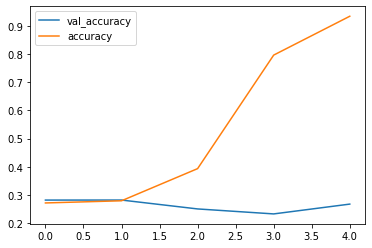

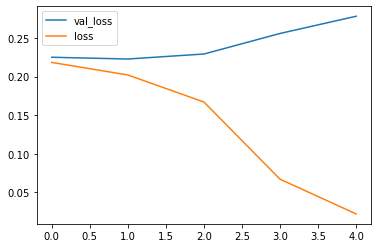

In [14]:
model_lstm, history_lstm = running_kera_NN_pos('LSTM', values_train, values_test, sentence1, sentence2, batch_size=16, epochs=5) 

We are running the model for: Bi-LSTM with batch size: 16 and epoch: 5
This is the max length: 192
Model: "Bi-LSTM"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
word_IDs (InputLayer)        [(None, 192)]             0         
_________________________________________________________________
embeddings (Embedding)       (None, 192, 128)          7414656   
_________________________________________________________________
Bi-LSTM (Bidirectional)      (None, 192, 512)          788480    
_________________________________________________________________
dropout (Dropout)            (None, 192, 512)          0         
_________________________________________________________________
output (Dense)               (None, 192, 19)           9747      
_________________________________________________________________
softmax (Activation)         (None, 192, 19)           0         
Total params: 8,212,883
Tr

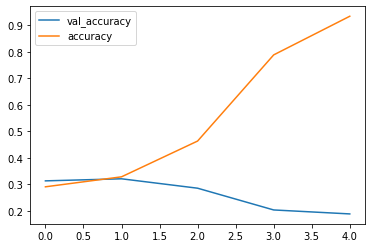

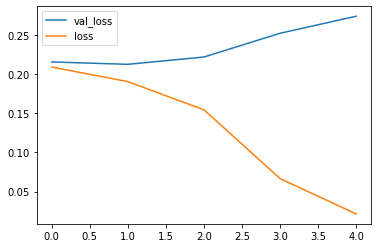

In [15]:
model_bilstm, history_bilstm = running_kera_NN_pos('Bi-LSTM', values_train, values_test, sentence1, sentence2, batch_size=16, epochs=5) 

We are running the model for: Sequential with batch size: 16 and epoch: 5
This is the max length: 192
Model: "Sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embeddings (Embedding)       (None, 192, 128)          7414656   
_________________________________________________________________
bi-LSTM (Bidirectional)      (None, 192, 512)          788480    
_________________________________________________________________
dropout (Dropout)            (None, 192, 512)          0         
_________________________________________________________________
output (Dense)               (None, 192, 19)           9747      
_________________________________________________________________
softmax (Activation)         (None, 192, 19)           0         
Total params: 8,212,883
Trainable params: 8,212,883
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5


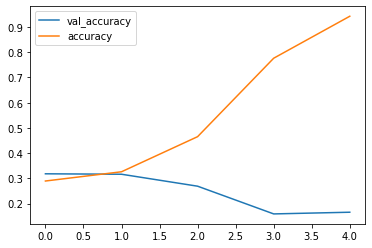

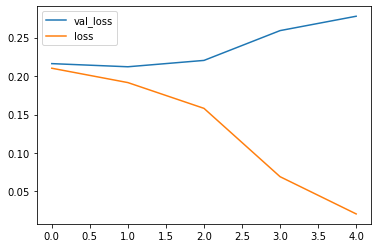

In [16]:
model_seq, history_seq = running_kera_NN_pos('Sequential', values_train, values_test, sentence1, sentence2, batch_size=16, epochs=5) 

In [ ]:
keras.utils.plot_model(model_lstm, show_shapes=True, show_layer_names=True)

In [ ]:
keras.utils.plot_model(model_bilstm, show_shapes=True, show_layer_names=True)

In [ ]:
keras.utils.plot_model(model_seq, show_shapes=True, show_layer_names=True)

When they were ran with batch size: 16 and epoch: 5 for the following sentences, this is the ouput that we got.

['Boil', 'first', '3', 'ingredients', 'for', '4', '1/2', 'to', '5', 'minutes', '.']

['PROPN', 'ADV', 'NUM', 'NOUN', 'ADP', 'NUM', 'NUM', 'PART', 'NUM', 'NOUN', 'PUNCT']  **REAL**

['VERB', 'ADP', 'DET', 'NOUN', 'NOUN', 'NOUN', 'NOUN', 'NOUN', 'NOUN', 'NOUN', 'NOUN']  **LSTM**

['DET', 'DET', 'NOUN', 'ADV', 'ADV', 'ADV', 'ADV', 'ADV', 'NOUN', 'PUNCT', 'PUNCT']  **Bi-LSTM**

['PROPN', 'ADV', 'ADV', 'ADV', 'ADV', 'ADV', 'ADV', 'NUM', 'NOUN', 'PUNCT', 'PUNCT']  **Sequential**


['Stir', 'together', 'Cool', 'Whip', 'pudding', 'mix', 'pineapple', 'with', 'juice', '.']

['VERB', 'ADV', 'PROPN', 'PROPN', 'NOUN', 'NOUN', 'NOUN', 'ADP', 'NOUN', 'PUNCT']  **REAL**

['VERB', 'ADP', 'DET', 'NOUN', 'NOUN', 'NOUN', 'NOUN', 'NOUN', 'NOUN', 'NOUN']  **LSTM**

['DET', 'DET', 'ADV', 'ADV', 'ADV', 'ADV', 'ADV', 'NOUN', 'PUNCT', 'PUNCT']  **Bi-LSTM**

['PROPN', 'ADV', 'ADV', 'ADV', 'ADV', 'ADV', 'NUM', 'NOUN', 'PUNCT', 'PUNCT']  **Sequential**


As we can see the accuracy isn't great as we could have observed from the validation set previously. Increasing the amount of data and epoch or batch size would also help to make the model better.

In [17]:
tf.keras.backend.clear_session()

# Whole recipe

When looking at the full recipe, we try to grasp if there is a bigger picture that can play a parameter here, as in more than just a sentence...

## Looking only at previous word

We believe this method will probably not perform great as we have a very large ouput size since we need to predict any word that could be next.

In [18]:
values_train, values_test = gen_data_both(df1['directions'], 1, "whole recipe")

This is the total number of observations we have 500


In [19]:
list_NN = ['LSTM', 'Bi-LSTM', 'Sequential']

We are running the model for: LSTM with batch size: 8 and epoch: 2
This is the max length: 1128
Model: "LSTM"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
word_IDs (InputLayer)        [(None, 1128)]            0         
_________________________________________________________________
embeddings (Embedding)       (None, 1128, 128)         440576    
_________________________________________________________________
LSTM (LSTM)                  (None, 1128, 256)         394240    
_________________________________________________________________
dropout (Dropout)            (None, 1128, 256)         0         
_________________________________________________________________
output (Dense)               (None, 1128, 3426)        880482    
_________________________________________________________________
softmax (Activation)         (None, 1128, 3426)        0         
Total params: 1,715,298
Trainabl

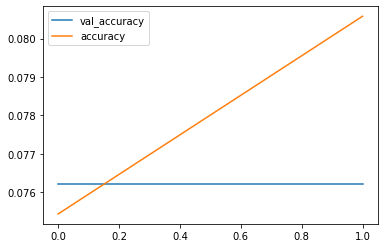

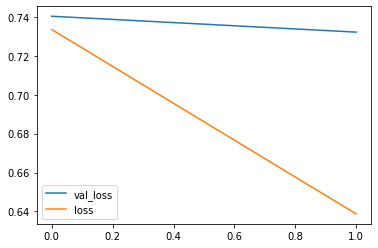

In [20]:
model_lstm, history_lstm = running_kera_NN('LSTM', values_train, values_test)

We are running the model for: Bi-LSTM with batch size: 8 and epoch: 2
This is the max length: 1128
Model: "Bi-LSTM"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
word_IDs (InputLayer)        [(None, 1128)]            0         
_________________________________________________________________
embeddings (Embedding)       (None, 1128, 128)         440576    
_________________________________________________________________
Bi-LSTM (Bidirectional)      (None, 1128, 512)         788480    
_________________________________________________________________
dropout (Dropout)            (None, 1128, 512)         0         
_________________________________________________________________
output (Dense)               (None, 1128, 3426)        1757538   
_________________________________________________________________
softmax (Activation)         (None, 1128, 3426)        0         
Total params: 2,986,594
Tr

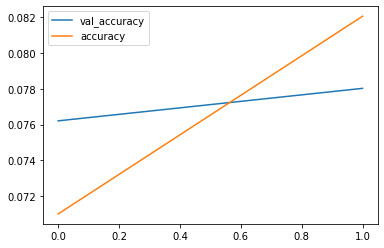

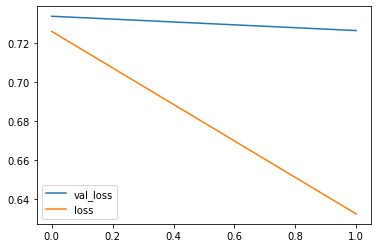

In [21]:
model_bilstm, history_bilstm = running_kera_NN('Bi-LSTM', values_train, values_test)

We are running the model for: Sequential with batch size: 8 and epoch: 2
This is the max length: 1128
Model: "Sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embeddings (Embedding)       (None, 1128, 128)         440576    
_________________________________________________________________
bi-LSTM (Bidirectional)      (None, 1128, 512)         788480    
_________________________________________________________________
dropout (Dropout)            (None, 1128, 512)         0         
_________________________________________________________________
output (Dense)               (None, 1128, 3426)        1757538   
_________________________________________________________________
softmax (Activation)         (None, 1128, 3426)        0         
Total params: 2,986,594
Trainable params: 2,986,594
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2


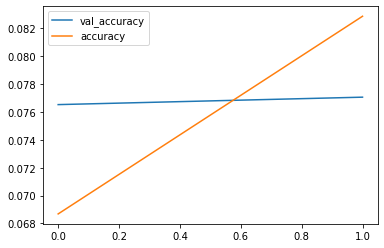

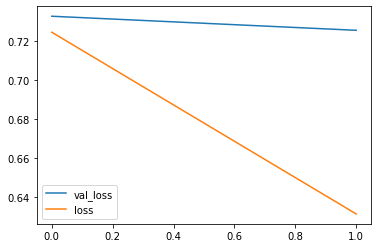

In [22]:
model_seq, history_seq = running_kera_NN('Sequential', values_train, values_test)

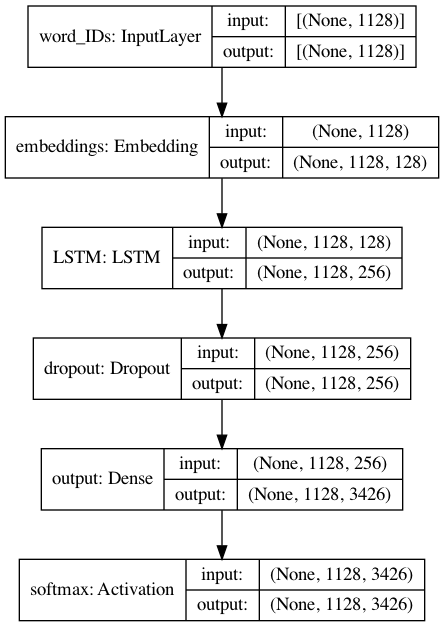

In [23]:
keras.utils.plot_model(model_lstm, show_shapes=True, show_layer_names=True)

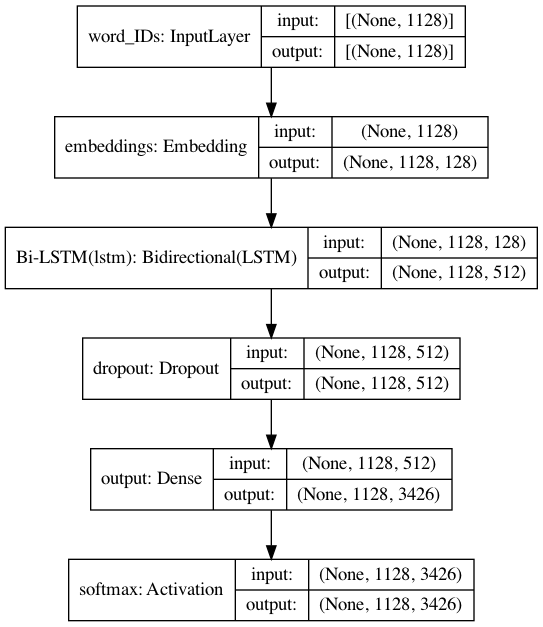

In [24]:
keras.utils.plot_model(model_bilstm, show_shapes=True, show_layer_names=True)

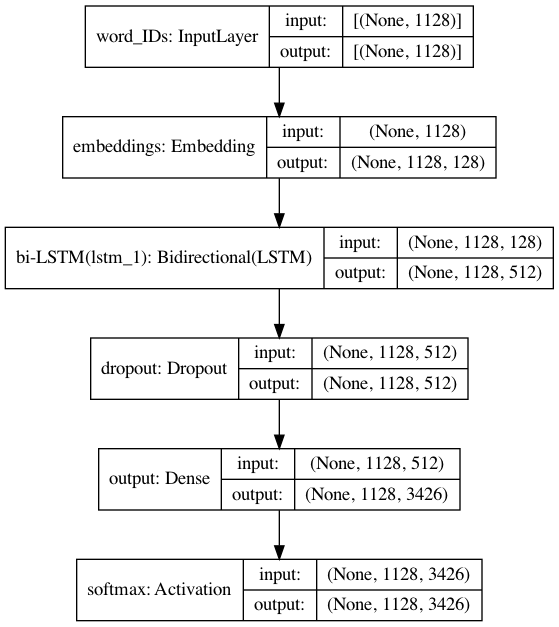

In [25]:
keras.utils.plot_model(model_seq, show_shapes=True, show_layer_names=True)

In [26]:
tf.keras.backend.clear_session()

## Looking only at one and two previous words as on ID

We hope that this will work slightly better as we could at times add two words together if they make more sense than a single word, this increases the input value that we have.

In [27]:
values_train, values_test = gen_data_both(df1['directions'], 2, "whole recipe")

This is the total number of observations we have 500


We are running the model for: LSTM with batch size: 8 and epoch: 2
This is the max length: 2250
Model: "LSTM"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
word_IDs (InputLayer)        [(None, 2250)]            0         
_________________________________________________________________
embeddings (Embedding)       (None, 2250, 128)         3054976   
_________________________________________________________________
LSTM (LSTM)                  (None, 2250, 256)         394240    
_________________________________________________________________
dropout (Dropout)            (None, 2250, 256)         0         
_________________________________________________________________
output (Dense)               (None, 2250, 3426)        880482    
_________________________________________________________________
softmax (Activation)         (None, 2250, 3426)        0         
Total params: 4,329,698
Trainabl

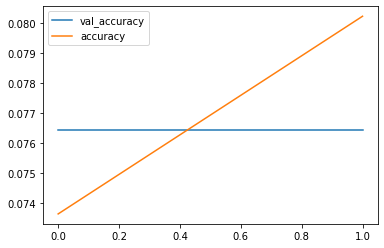

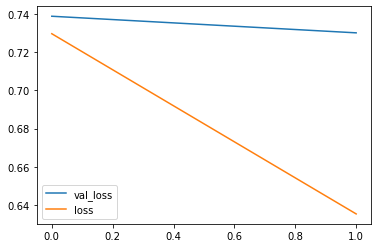

In [28]:
model_lstm, history_lstm = running_kera_NN('LSTM', values_train, values_test)

We are running the model for: Bi-LSTM with batch size: 8 and epoch: 2
This is the max length: 2250
Model: "Bi-LSTM"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
word_IDs (InputLayer)        [(None, 2250)]            0         
_________________________________________________________________
embeddings (Embedding)       (None, 2250, 128)         3054976   
_________________________________________________________________
Bi-LSTM (Bidirectional)      (None, 2250, 512)         788480    
_________________________________________________________________
dropout (Dropout)            (None, 2250, 512)         0         
_________________________________________________________________
output (Dense)               (None, 2250, 3426)        1757538   
_________________________________________________________________
softmax (Activation)         (None, 2250, 3426)        0         
Total params: 5,600,994
Tr

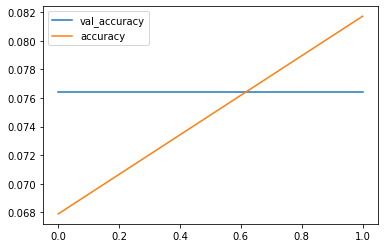

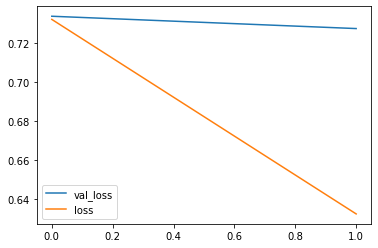

In [29]:
model_bilstm, history_bilstm = running_kera_NN('Bi-LSTM', values_train, values_test)

We are running the model for: Sequential with batch size: 8 and epoch: 2
This is the max length: 2250
Model: "Sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embeddings (Embedding)       (None, 2250, 128)         3054976   
_________________________________________________________________
bi-LSTM (Bidirectional)      (None, 2250, 512)         788480    
_________________________________________________________________
dropout (Dropout)            (None, 2250, 512)         0         
_________________________________________________________________
output (Dense)               (None, 2250, 3426)        1757538   
_________________________________________________________________
softmax (Activation)         (None, 2250, 3426)        0         
Total params: 5,600,994
Trainable params: 5,600,994
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2


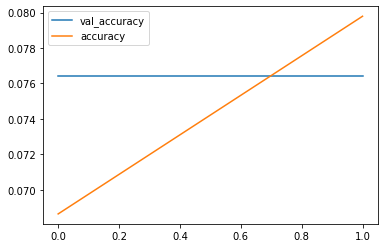

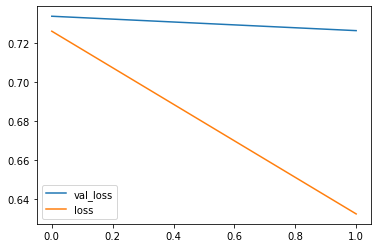

In [30]:
model_seq, history_seq = running_kera_NN('Sequential', values_train, values_test)

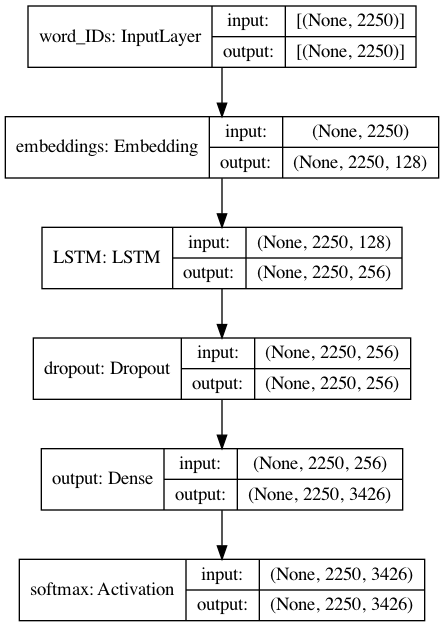

In [31]:
keras.utils.plot_model(model_lstm, show_shapes=True, show_layer_names=True)

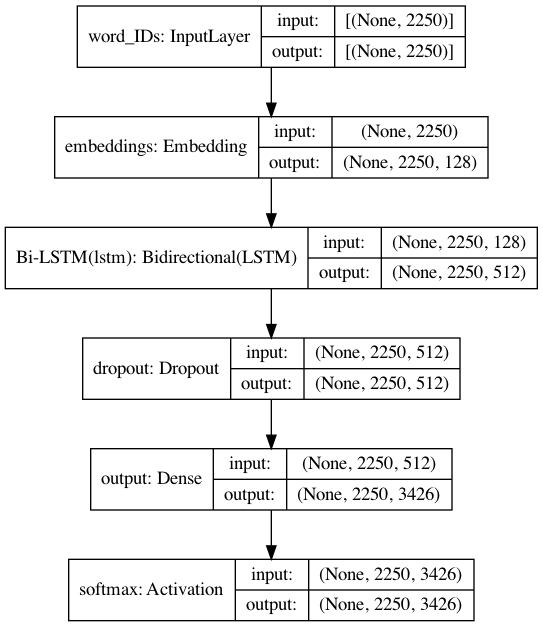

In [32]:
keras.utils.plot_model(model_bilstm, show_shapes=True, show_layer_names=True)

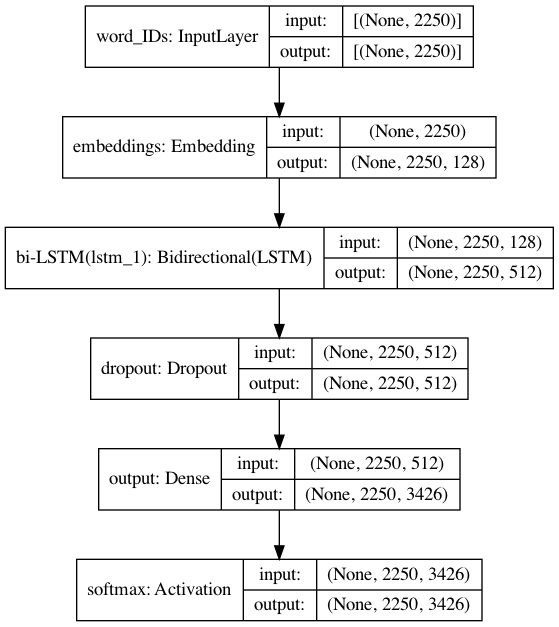

In [33]:
keras.utils.plot_model(model_seq, show_shapes=True, show_layer_names=True)

In [34]:
tf.keras.backend.clear_session()

# Sentence

When looking only at the sentence we hope to understand more of the different ways sentences can be built.

## Looking only at previous word

We believe this method will probably not perform great as we have a very large ouput size since we need to predict any word that could be next.

In [35]:
values_train, values_test = gen_data_both(df1['directions'], 1, "sentence")

This is the total number of observations we have 3419


We are running the model for: LSTM with batch size: 8 and epoch: 2
This is the max length: 197
Model: "LSTM"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
word_IDs (InputLayer)        [(None, 197)]             0         
_________________________________________________________________
embeddings (Embedding)       (None, 197, 128)          428928    
_________________________________________________________________
LSTM (LSTM)                  (None, 197, 256)          394240    
_________________________________________________________________
dropout (Dropout)            (None, 197, 256)          0         
_________________________________________________________________
output (Dense)               (None, 197, 3211)         825227    
_________________________________________________________________
softmax (Activation)         (None, 197, 3211)         0         
Total params: 1,648,395
Trainable

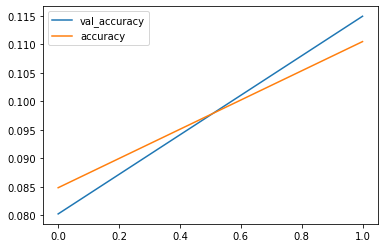

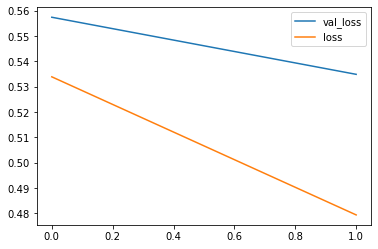

In [36]:
model_lstm, history_lstm = running_kera_NN('LSTM', values_train, values_test)

We are running the model for: Bi-LSTM with batch size: 8 and epoch: 2
This is the max length: 197
Model: "Bi-LSTM"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
word_IDs (InputLayer)        [(None, 197)]             0         
_________________________________________________________________
embeddings (Embedding)       (None, 197, 128)          428928    
_________________________________________________________________
Bi-LSTM (Bidirectional)      (None, 197, 512)          788480    
_________________________________________________________________
dropout (Dropout)            (None, 197, 512)          0         
_________________________________________________________________
output (Dense)               (None, 197, 3211)         1647243   
_________________________________________________________________
softmax (Activation)         (None, 197, 3211)         0         
Total params: 2,864,651
Tra

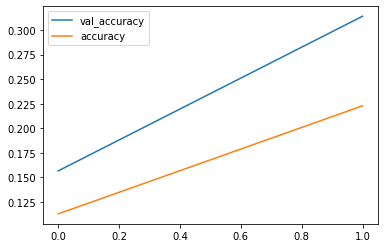

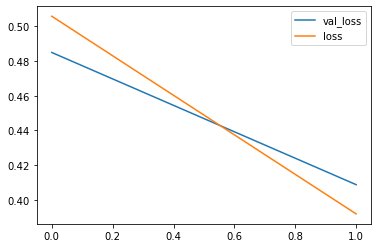

In [37]:
model_bilstm, history_bilstm = running_kera_NN('Bi-LSTM', values_train, values_test)

We are running the model for: Sequential with batch size: 8 and epoch: 2
This is the max length: 197
Model: "Sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embeddings (Embedding)       (None, 197, 128)          428928    
_________________________________________________________________
bi-LSTM (Bidirectional)      (None, 197, 512)          788480    
_________________________________________________________________
dropout (Dropout)            (None, 197, 512)          0         
_________________________________________________________________
output (Dense)               (None, 197, 3211)         1647243   
_________________________________________________________________
softmax (Activation)         (None, 197, 3211)         0         
Total params: 2,864,651
Trainable params: 2,864,651
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
2

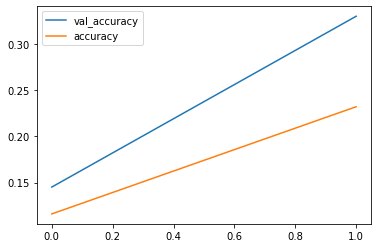

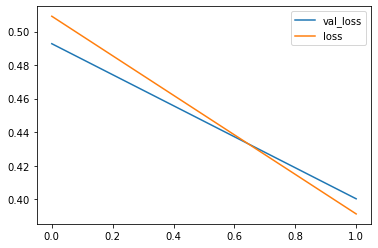

In [38]:
model_seq, history_seq = running_kera_NN('Sequential', values_train, values_test)

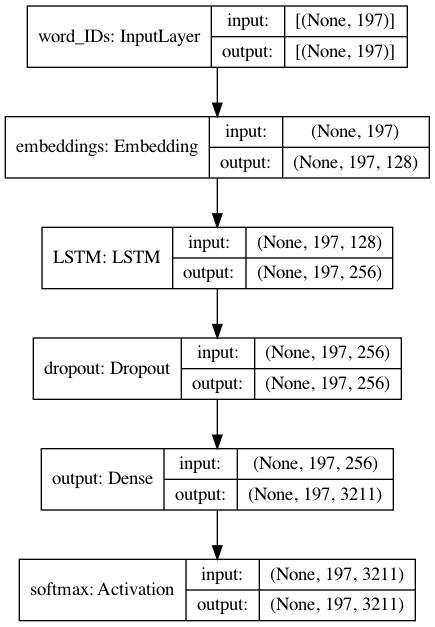

In [39]:
keras.utils.plot_model(model_lstm, show_shapes=True, show_layer_names=True)

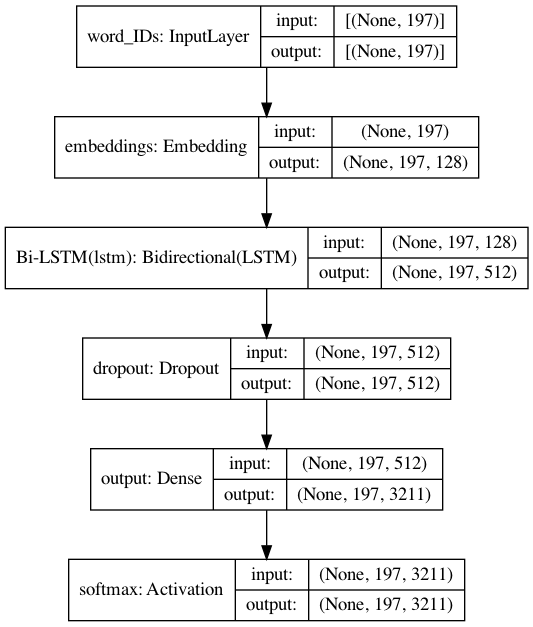

In [40]:
keras.utils.plot_model(model_bilstm, show_shapes=True, show_layer_names=True)

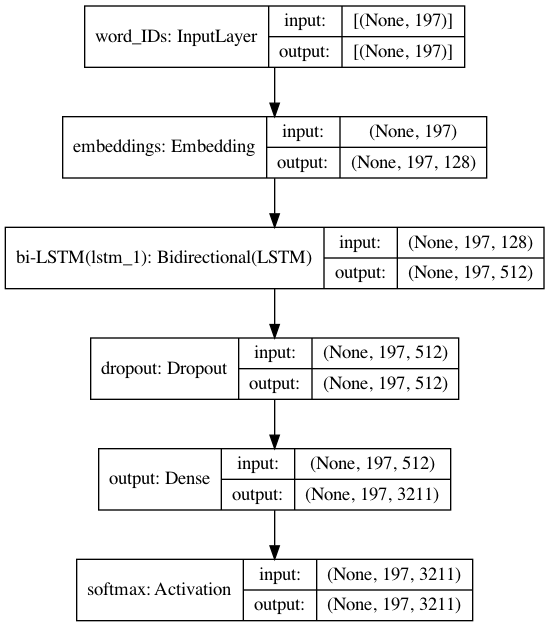

In [41]:
keras.utils.plot_model(model_seq, show_shapes=True, show_layer_names=True)

In [42]:
tf.keras.backend.clear_session()

## Looking only at one and two previous words as on ID

We hope that this will work slightly better as we could at times add two words together if they make more sense than a single word, this increases the input value that we have.

In [43]:
values_train, values_test = gen_data_both(df1['directions'], 2, "sentence")

This is the total number of observations we have 3419


We are running the model for: LSTM with batch size: 8 and epoch: 2
This is the max length: 388
Model: "LSTM"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
word_IDs (InputLayer)        [(None, 388)]             0         
_________________________________________________________________
embeddings (Embedding)       (None, 388, 128)          2930304   
_________________________________________________________________
LSTM (LSTM)                  (None, 388, 256)          394240    
_________________________________________________________________
dropout (Dropout)            (None, 388, 256)          0         
_________________________________________________________________
output (Dense)               (None, 388, 3211)         825227    
_________________________________________________________________
softmax (Activation)         (None, 388, 3211)         0         
Total params: 4,149,771
Trainable

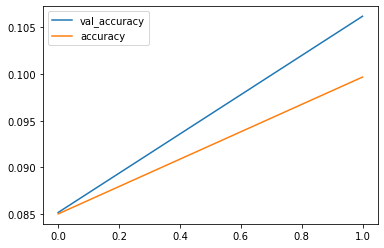

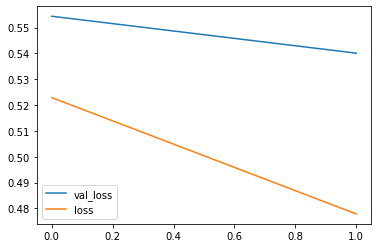

In [44]:
model_lstm, history_lstm = running_kera_NN('LSTM', values_train, values_test)

We are running the model for: Bi-LSTM with batch size: 8 and epoch: 2
This is the max length: 388
Model: "Bi-LSTM"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
word_IDs (InputLayer)        [(None, 388)]             0         
_________________________________________________________________
embeddings (Embedding)       (None, 388, 128)          2930304   
_________________________________________________________________
Bi-LSTM (Bidirectional)      (None, 388, 512)          788480    
_________________________________________________________________
dropout (Dropout)            (None, 388, 512)          0         
_________________________________________________________________
output (Dense)               (None, 388, 3211)         1647243   
_________________________________________________________________
softmax (Activation)         (None, 388, 3211)         0         
Total params: 5,366,027
Tra

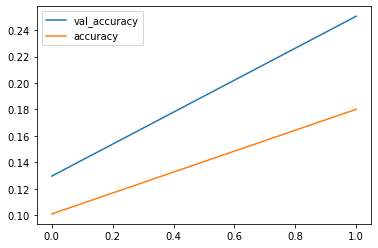

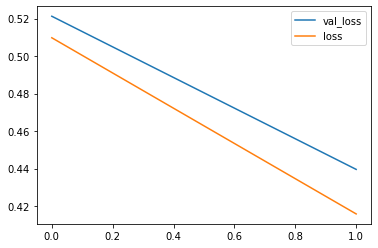

In [45]:
model_bilstm, history_bilstm = running_kera_NN('Bi-LSTM', values_train, values_test)

We are running the model for: Sequential with batch size: 8 and epoch: 2
This is the max length: 388
Model: "Sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embeddings (Embedding)       (None, 388, 128)          2930304   
_________________________________________________________________
bi-LSTM (Bidirectional)      (None, 388, 512)          788480    
_________________________________________________________________
dropout (Dropout)            (None, 388, 512)          0         
_________________________________________________________________
output (Dense)               (None, 388, 3211)         1647243   
_________________________________________________________________
softmax (Activation)         (None, 388, 3211)         0         
Total params: 5,366,027
Trainable params: 5,366,027
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
2

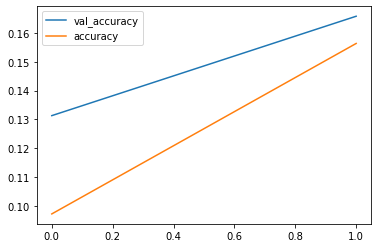

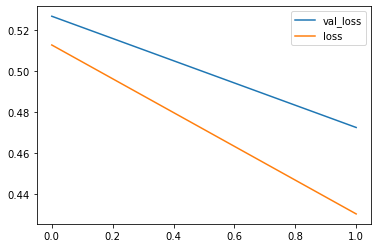

In [46]:
model_seq, history_seq = running_kera_NN('Sequential', values_train, values_test)

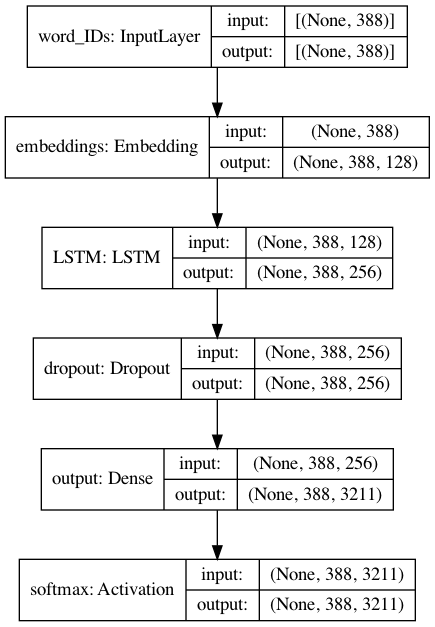

In [47]:
keras.utils.plot_model(model_lstm, show_shapes=True, show_layer_names=True)

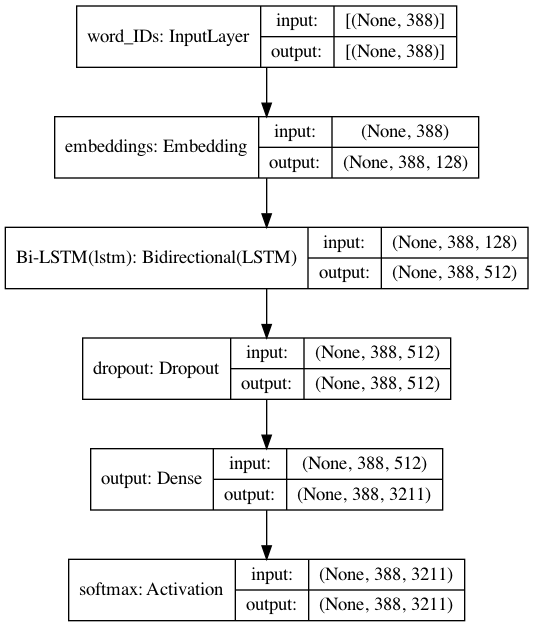

In [48]:
keras.utils.plot_model(model_bilstm, show_shapes=True, show_layer_names=True)

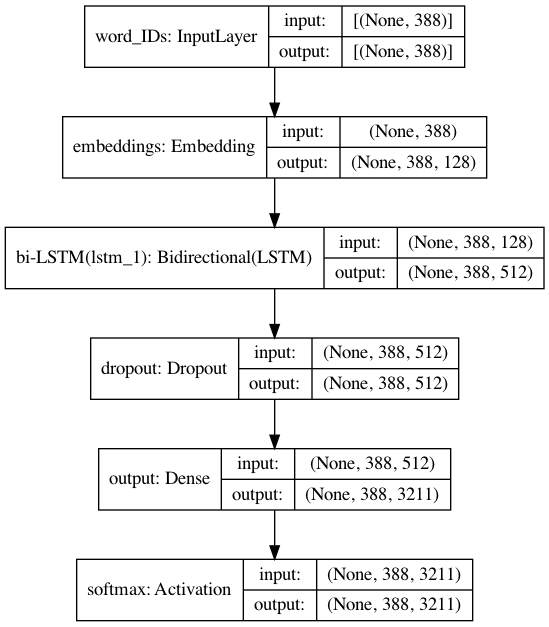

In [49]:
keras.utils.plot_model(model_seq, show_shapes=True, show_layer_names=True)

In [50]:
tf.keras.backend.clear_session()

# Perceptron

### Whole recipe

In [51]:
values_train, values_test = gen_data_both(df1['directions'], 1, "whole recipe")

This is the total number of observations we have 500


In [53]:
sp = StructuredPerceptron()
%time sp.fit(train=values_train, test=values_test, iterations=4, inference='greedy')
sp.save('model_greedy.pickle')

.................	170067 features
	Training accuracy: 0.73

	Development accuracy: 0.82

.................	221128 features
	Training accuracy: 0.91

	Development accuracy: 0.85

.................	240212 features
	Training accuracy: 0.95

	Development accuracy: 0.87

.................	248440 features
	Training accuracy: 0.96

	Development accuracy: 0.87



CPU times: user 5min 39s, sys: 1.08 s, total: 5min 40s
Wall time: 5min 41s


saving model... done


In [70]:
sentence_gen(sp, met='greedy', text="Bake")

'Bake . Recipe . Recipe . Recipe . Recipe . Recipe . Recipe . Recipe . Recipe . Recipe . Recipe . Recipe . Recipe . Recipe . Recipe . Recipe . Recipe . Recipe . Recipe . Recipe . Recipe . Recipe . Recipe . Recipe . Recipe . Recipe .'

In [71]:
values_train, values_test = gen_data_both(df1['directions'], 2, "whole recipe")

This is the total number of observations we have 500


In [72]:
sp = StructuredPerceptron()
%time sp.fit(train=values_train, test=values_test, iterations=4, inference='greedy')
sp.save('model_greedy.pickle')

.................	435335 features
	Training accuracy: 0.72

	Development accuracy: 0.74

.................	525944 features
	Training accuracy: 0.90

	Development accuracy: 0.78

.................	562097 features
	Training accuracy: 0.94

	Development accuracy: 0.80

.................	578534 features
	Training accuracy: 0.96

	Development accuracy: 0.80



CPU times: user 13min 31s, sys: 3.34 s, total: 13min 34s
Wall time: 13min 43s


saving model... done


In [73]:
sentence_gen(sp, met='greedy', text="Bake")

'Bake . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .'

In [74]:
tf.keras.backend.clear_session()

### Sentence

In [75]:
values_train, values_test = gen_data_both(df1['directions'], 1, "sentence")

This is the total number of observations we have 3419


In [76]:
sp = StructuredPerceptron()
%time sp.fit(train=values_train, test=values_test, iterations=4, inference='greedy')
sp.save('model_greedy.pickle')

.................................................1000
.................................................2000
...................	162643 features
	Training accuracy: 0.76

	Development accuracy: 0.83

.................................................1000
.................................................2000
...................	205664 features
	Training accuracy: 0.92

	Development accuracy: 0.85

.................................................1000
.................................................2000
...................	223033 features
	Training accuracy: 0.95

	Development accuracy: 0.87

.................................................1000
.................................................2000
...................	230942 features
	Training accuracy: 0.96

	Development accuracy: 0.87



CPU times: user 6min 18s, sys: 2.04 s, total: 6min 20s
Wall time: 6min 23s


saving model... done


In [77]:
sentence_gen(sp, met='greedy', text="Bake")

'Bake cake . While . While . While . While . While . While . While . While . While . While . While . While . While . While . While . While . While . While . While . While . While . While . While . While . While'

In [78]:
values_train, values_test = gen_data_both(df1['directions'], 2, "sentence")

This is the total number of observations we have 3419


In [79]:
sp = StructuredPerceptron()
%time sp.fit(train=values_train, test=values_test, iterations=4, inference='greedy')
sp.save('model_greedy.pickle')

.................................................1000
.................................................2000
...................	415370 features
	Training accuracy: 0.73

	Development accuracy: 0.74

.................................................1000
.................................................2000
...................	499465 features
	Training accuracy: 0.90

	Development accuracy: 0.77

.................................................1000
.................................................2000
...................	532683 features
	Training accuracy: 0.95

	Development accuracy: 0.79

.................................................1000
.................................................2000
...................	546260 features
	Training accuracy: 0.96

	Development accuracy: 0.79



CPU times: user 12min 21s, sys: 3.67 s, total: 12min 24s
Wall time: 12min 28s


saving model... done


In [80]:
sentence_gen(sp, met='greedy', text="Bake")

'Bake stacks of . While . While . While . While . While . While . While . While . While . While . While . While . While . While . While . While . While . While . While . While . While . While . While . While .'

In [81]:
tf.keras.backend.clear_session()

# More advanced models for text generation (would not recommand running, however, a saved model is available...)

Character wise

In [97]:
def changes_for_string(s):
    s = str(s)
    s = frac_converter(s)
    s = re.sub('(\.\d+|\d+\.\d+|\d+|\d+\,\d+)', r' \1 ', s)
    s = re.sub('\s{2,}', ' ', s)
    s = re.sub('([.,!?]+)', r'\1 ', s)
    s = re.sub('\s{2,}', ' ', s)
    return s

In [98]:
df1 = df[df['label']=="D"].copy()
df1 = df1.sample(500)
df1 = df1.reset_index(drop=True)
df1.shape

(500, 13)

In [99]:
text = ""
for item in df1['directions']:
    text = text + " \n "
    for item1 in item:
        text = text + changes_for_string(item1)

In [100]:
raw_text = text
# create mapping of unique chars to integers
chars = sorted(list(set(raw_text)))
char_to_int = dict((c, i) for i, c in enumerate(chars))
# summarize the loaded data
n_chars = len(raw_text)
n_vocab = len(chars)
print( "Total Characters: ", n_chars)
print( "Total Vocab: ", n_vocab)
# prepare the dataset of input to output pairs encoded as integers
seq_length = 100
dataX = []
dataY = []
for i in range(0, n_chars - seq_length, 1):
    seq_in = raw_text[i:i + seq_length]
    seq_out = raw_text[i + seq_length]
    dataX.append([char_to_int[char] for char in seq_in])
    dataY.append(char_to_int[seq_out])
n_patterns = len(dataX)
print( "Total Patterns: ", n_patterns)
# reshape X to be [samples, time steps, features]
X = np.reshape(dataX, (n_patterns, seq_length, 1))
# normalize
X = X / float(n_vocab)
# one hot encode the output variable
y = np_utils.to_categorical(dataY)
# define the LSTM model
model = Sequential()
model.add(LSTM(256, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

# export the model at every iteration not to lose the progress
filepath="weights-improvement-{epoch:02d}-{loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

# fit the model (maybe increase epochs and batch_size, but since it's taking too long to train leave like this for now)
model.fit(X, y, epochs=5, batch_size=64, callbacks=callbacks_list)

Total Characters:  276812
Total Vocab:  80
Total Patterns:  276712
Epoch 1/5
4324/4324 [==============================] - 730s 168ms/step - loss: 2.9914

Epoch 00001: loss improved from inf to 2.84104, saving model to weights-improvement-01-2.8410.hdf5
Epoch 2/5
4324/4324 [==============================] - 738s 171ms/step - loss: 2.6099

Epoch 00002: loss improved from 2.84104 to 2.57147, saving model to weights-improvement-02-2.5715.hdf5
Epoch 3/5
4324/4324 [==============================] - 724s 167ms/step - loss: 2.4534

Epoch 00003: loss improved from 2.57147 to 2.42353, saving model to weights-improvement-03-2.4235.hdf5
Epoch 4/5
4324/4324 [==============================] - 730s 169ms/step - loss: 2.3210

Epoch 00004: loss improved from 2.42353 to 2.29735, saving model to weights-improvement-04-2.2973.hdf5
Epoch 5/5
4324/4324 [==============================] - 704s 163ms/step - loss: 2.2115

Epoch 00005: loss improved from 2.29735 to 2.19059, saving model to weights-improvement-05

Generate sentences from saved model

In [102]:
#Setting the text to be the unprocessed text
raw_text = text

# map chars to int, and back
chars = sorted(list(set(raw_text)))
char_to_int = dict((c, i) for i, c in enumerate(chars))
int_to_char = dict((i, c) for i, c in enumerate(chars))

# some insights on the go
n_chars = len(raw_text)
n_vocab = len(chars)
print( "total # charachters: ", n_chars)
print( "total # of items in vocab: ", n_vocab)

# prepare the dataset of input to output pairs encoded as integers
seq_length = 100
dataX = []
dataY = []
for i in range(0, n_chars - seq_length, 1):
    seq_in = raw_text[i:i + seq_length]
    seq_out = raw_text[i + seq_length]
    dataX.append([char_to_int[char] for char in seq_in])
    dataY.append(char_to_int[seq_out])
n_patterns = len(dataX)
print( "# tot patterns: ", n_patterns)

# X -> [samples, time steps, features]
X = np.reshape(dataX, (n_patterns, seq_length, 1))

# normalizing
X = X / float(n_vocab)

# one hot encode the output variable
y = np_utils.to_categorical(dataY)

# initializing and shaping the LSTM model
model = Sequential()
model.add(LSTM(256, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))

# load the network
filename = "weights-improvement-05-2.1906.hdf5"
model.load_weights(filename)
model.compile(loss='categorical_crossentropy', optimizer='adam')

# pick a random seed 10 times and generate 50 chars from it
for i in range(10):
    start = np.random.randint(0, len(dataX)-1)
    pattern = dataX[start]
#     print( "Seed:")
    print( "\"", ''.join([int_to_char[value] for value in pattern]), "\"")
    # generate characters
    for i in range(50):
        x = np.reshape(pattern, (1, len(pattern), 1))
        x = x / float(n_vocab)
        prediction = model.predict(x, verbose=0)
        index = np.argmax(prediction)
        result = int_to_char[index]
        seq_in = [int_to_char[value] for value in pattern]
        sys.stdout.write(result)
        pattern.append(index)
        pattern = pattern[1:len(pattern)]
print( "\nDone.")

total # charachters:  276812
total # of items in vocab:  80
# tot patterns:  276712
" anise and mint leaves. Mix well fill the tomatoes and top with their \hats. \Preheat the oven to 375 "
 \u 00 b 0 F   1 0 Cu a ladgum bowl combine thg bu" -inch pan greased with diet margarine. Bake in a 325 \u 00 b 0 oven for 45 minutes. Serves 16 .  
 S "
i h large bowl combine the broter and sugar and sa" until smooth. Arrange lettuce in a large bowl. Using a slotted spoon place the orange mixture over l "
he cream cne ser and mo cool to cool oo toe poect " immer. Whisk together eggs egg yolks and next 4 ingredients in top of double boiler over simmering w "
ith a sirteng cake   
 Preheat oven to 350 \egrees" r filling in a mixing bowl combine eggs honey evaporated milk salt pumpkin pie spice and pumpkin. Be "
d the croted and sin tith a miotee bod mot tith a "  chocolate in a heatproof bowl and set the bowl to the side. Heat cream and milk in a saucepan over  "
tod toine anwl     Preheat oven to 3

In [103]:
tf.keras.backend.clear_session()

# Google RNN (would not recommand running, however, a saved model is available...)

The google algorithm does it character wise, this can be seen at times in the predictions, but overall it performs much better than the previous algorithms used.

In [104]:
def changes_for_string(s):
    s = str(s)
    s = frac_converter(s)
    s = re.sub('(\.\d+|\d+\.\d+|\d+|\d+\,\d+)', r' \1 ', s)
    s = re.sub('\s{2,}', ' ', s)
    s = re.sub('([.,!?]+)', r'\1 ', s)
    s = re.sub('\s{2,}', ' ', s)
    return s

def text_from_ids(ids):
    return tf.strings.reduce_join(chars_from_ids(ids), axis=-1)

def split_input_target(sequence):
    input_text = sequence[:-1]
    target_text = sequence[1:]
    return input_text, target_text


class MyModel(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, rnn_units):
        super().__init__(self)
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru = tf.keras.layers.GRU(rnn_units,
                                       return_sequences=True,
                                       return_state=True)
        self.dense = tf.keras.layers.Dense(vocab_size)

    def call(self, inputs, states=None, return_state=False, training=False):
        x = inputs
        x = self.embedding(x, training=training)
        if states is None:
            states = self.gru.get_initial_state(x)
        x, states = self.gru(x, initial_state=states, training=training)
        x = self.dense(x, training=training)

        if return_state:
            return x, states
        else:
            return x

In [105]:
df1 = df[df['label']=="D"].copy()
df1 = df1.sample(500)
df1 = df1.reset_index(drop=True)
df1.shape

(500, 13)

In [106]:
text = ""
for item in df1['directions']:
    text = text + " \n "
    for item1 in item:
        text = text + changes_for_string(item1)

In [107]:
print(text[:250])

 
 Stir together Eagle Brand and pineapple. Pour into ice cream freezer then add Orange Crush. Start freezer.  
 Preheat the oven to 350 degrees F ( 175 degrees C). Grease just the bottom of a 10 inch tube pan. In a large bowl cream together the butt


In [108]:
# The unique characters in the file
vocab = sorted(set(text))
print(f'{len(vocab)} unique characters')

ids_from_chars = preprocessing.StringLookup(
    vocabulary=list(vocab))

chars_from_ids = tf.keras.layers.experimental.preprocessing.StringLookup(
    vocabulary=ids_from_chars.get_vocabulary(), invert=True)

all_ids = ids_from_chars(tf.strings.unicode_split(text, 'UTF-8'))
ids_dataset = tf.data.Dataset.from_tensor_slices(all_ids)

seq_length = 100
examples_per_epoch = len(text)//(seq_length+1)

sequences = ids_dataset.batch(seq_length+1, drop_remainder=True)
dataset = sequences.map(split_input_target)

# Batch size
BATCH_SIZE = 64

# Buffer size to shuffle the dataset
# (TF data is designed to work with possibly infinite sequences,
# so it doesn't attempt to shuffle the entire sequence in memory. Instead,
# it maintains a buffer in which it shuffles elements).
BUFFER_SIZE = 10000

dataset = (
    dataset
    .shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE, drop_remainder=True)
    .prefetch(tf.data.experimental.AUTOTUNE))

# Length of the vocabulary in chars
vocab_size = len(vocab)

# The embedding dimension
embedding_dim = 256

# Number of RNN units
rnn_units = 1024

model = MyModel(
    # Be sure the vocabulary size matches the `StringLookup` layers.
    vocab_size=len(ids_from_chars.get_vocabulary()),
    embedding_dim=embedding_dim,
    rnn_units=rnn_units)

83 unique characters


In [109]:
for input_example_batch, target_example_batch in dataset.take(1):
    example_batch_predictions = model(input_example_batch)
    print(example_batch_predictions.shape, "# (batch_size, sequence_length, vocab_size)")

(64, 100, 85) # (batch_size, sequence_length, vocab_size)


In [110]:
model.summary()

Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        multiple                  21760     
_________________________________________________________________
gru (GRU)                    multiple                  3938304   
_________________________________________________________________
dense (Dense)                multiple                  87125     
Total params: 4,047,189
Trainable params: 4,047,189
Non-trainable params: 0
_________________________________________________________________


In [111]:
loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer='adam', loss=loss)

# Directory where the checkpoints will be saved
checkpoint_dir = './training_checkpoints'
# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)

In [112]:
EPOCHS = 30
history = model.fit(dataset, epochs=EPOCHS, callbacks=[checkpoint_callback])

Epoch 1/30
44/44 [==============================] - 57s 1s/step - loss: 3.9649
Epoch 2/30
44/44 [==============================] - 62s 1s/step - loss: 2.6683
Epoch 3/30
44/44 [==============================] - 63s 1s/step - loss: 2.2896
Epoch 4/30
44/44 [==============================] - 61s 1s/step - loss: 2.0750
Epoch 5/30
44/44 [==============================] - 61s 1s/step - loss: 1.8504
Epoch 6/30
44/44 [==============================] - 63s 1s/step - loss: 1.6405
Epoch 7/30
44/44 [==============================] - 60s 1s/step - loss: 1.4620
Epoch 8/30
44/44 [==============================] - 63s 1s/step - loss: 1.3389
Epoch 9/30
44/44 [==============================] - 65s 1s/step - loss: 1.2384
Epoch 10/30
44/44 [==============================] - 62s 1s/step - loss: 1.1522
Epoch 11/30
44/44 [==============================] - 66s 1s/step - loss: 1.0854
Epoch 12/30
44/44 [==============================] - 61s 1s/step - loss: 1.0295
Epoch 13/30
44/44 [==============================

## Generate Text

In [113]:
class OneStep(tf.keras.Model):
  def __init__(self, model, chars_from_ids, ids_from_chars, temperature=1.0):
    super().__init__()
    self.temperature = temperature
    self.model = model
    self.chars_from_ids = chars_from_ids
    self.ids_from_chars = ids_from_chars

    # Create a mask to prevent "" or "[UNK]" from being generated.
    skip_ids = self.ids_from_chars(['', '[UNK]'])[:, None]
    sparse_mask = tf.SparseTensor(
        # Put a -inf at each bad index.
        values=[-float('inf')]*len(skip_ids),
        indices=skip_ids,
        # Match the shape to the vocabulary
        dense_shape=[len(ids_from_chars.get_vocabulary())])
    self.prediction_mask = tf.sparse.to_dense(sparse_mask)

  @tf.function
  def generate_one_step(self, inputs, states=None):
    # Convert strings to token IDs.
    input_chars = tf.strings.unicode_split(inputs, 'UTF-8')
    input_ids = self.ids_from_chars(input_chars).to_tensor()

    # Run the model.
    # predicted_logits.shape is [batch, char, next_char_logits]
    predicted_logits, states = self.model(inputs=input_ids, states=states,
                                          return_state=True)
    # Only use the last prediction.
    predicted_logits = predicted_logits[:, -1, :]
    predicted_logits = predicted_logits/self.temperature
    # Apply the prediction mask: prevent "" or "[UNK]" from being generated.
    predicted_logits = predicted_logits + self.prediction_mask

    # Sample the output logits to generate token IDs.
    predicted_ids = tf.random.categorical(predicted_logits, num_samples=1)
    predicted_ids = tf.squeeze(predicted_ids, axis=-1)

    # Convert from token ids to characters
    predicted_chars = self.chars_from_ids(predicted_ids)

    # Return the characters and model state.
    return predicted_chars, states

In [114]:
one_step_model = OneStep(model, chars_from_ids, ids_from_chars)

In [115]:
start = time.time()
states = None
next_char = tf.constant(['Bake'])
result = [next_char]

for n in range(1000):
    next_char, states = one_step_model.generate_one_step(next_char, states=states)
    result.append(next_char)

result = tf.strings.join(result)
end = time.time()
print(result[0].numpy().decode('utf-8'), '\n\n' + '_'*80)
print('\nRun time:', end - start)

Bake in a serving plate. Spoon into an 8 x 8 inch pan. Let them with a rubber spatula until blended. Stir the eggs one at a time. Combine the finsly linetal heat tok tir other hand to spray. Melt bourbon very x mixed in a large mixing bowl stir melted butter in square bakl-with the top liquid and serve.  
 Preheat the oven to 350 degrees F. Pulse the gingerbread to a rack to cool for 1 menutable oil or skillet to medium. Heat while continuously so it will reach the properly remaining batter by spoonfuls into dish. Serves. Drop byor When turn over the applesauce oming the next layer. Fold in order and add to creamed mixture and mix well. Place in a medium bowl stir together 0. 75 cup water in a small bowl mix Cogfant. add 0. 25 outcake batter). For mix apples 1 Bake at eaca strainer with marshmallow mixture into egg mixture with bread cubes. Add cornflacter sugar whisk together the raisins on a cookie sheet and bake for 30 minutes monto a crust(Mix or to partle strewberry juice from lem

## Re-use generator

In [117]:
tf.saved_model.save(one_step_model, 'one_step')
one_step_reloaded = tf.saved_model.load('one_step')

INFO:tensorflow:Assets written to: one_step/assets


INFO:tensorflow:Assets written to: one_step/assets


Generate sentences from saved model.

In [121]:
states = None
next_char = tf.constant(['Bake'])
result = [next_char]

for n in range(500):
    next_char, states = one_step_reloaded.generate_one_step(next_char, states=states)
    result.append(next_char)

print(tf.strings.join(result)[0].numpy().decode("utf-8"))

Bake 50 to 60 minutes or until a cubes to make 2 layers. Discard the vanilla pod once the syrnigh about 30 seconds. Add the cream from Step 3 to the pot vurtarch mixture into flour mixture and brandy and cook over moderate melted chocess. This will melt the baked pie shell; it as first. Ore a nugbs- 2 . Bake the following bowl toss the bread large bowl mix cake dish rack 0. 75 c. . Pour over the servings or pastry blender or mango puree. Stir together add eggs (Ment the flour with the banana slices 


In [ ]:
tf.keras.backend.clear_session()

In general regarding the text prediction, we can see that it does not seem very good word based, or at least the implementation of it is not most efficient this way. The LSTM character based seems to work very well and provides a good generation of sentences. We can also say that we do observe some differences with regards to each neural network, however, there is no notable "winner" when comparing LSTM, Bi-LSTM or Sequential. They all fair similarily.